In [1]:
import pandas as pd
import itertools
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

import numpy as np

In [2]:
def summarize(df, objectness_threshold):
    view = df[df.objectness_threshold==objectness_threshold].copy()
    is_vessel_threshold = LabelEncoder()
    is_fishing_threshold = LabelEncoder()
    view["is_vessel_threshold"] = is_vessel_threshold.fit_transform(view["is_vessel_threshold"])
    view["is_fishing_threshold"] = is_fishing_threshold.fit_transform(view["is_fishing_threshold"])
    matrix = np.zeros((
        len(is_vessel_threshold.classes_),
        len(is_fishing_threshold.classes_)
    ))

    for i, row in view.iterrows():
        value = row["aggregate"]
        matrix[int(row["is_vessel_threshold"]), int(row["is_fishing_threshold"])] = value

    return matrix, is_vessel_threshold.classes_, is_fishing_threshold.classes_

def plot_visualizations(dfs):
    for obj in sorted(dfs[0].objectness_threshold.unique()):

        for i, df in enumerate(dfs):
            if i == 0:
                matrix, vessel_thresholds, fishing_thresholds = summarize(df, obj)
            else:
                matrix += summarize(df, obj)[0]

        matrix /= len(dfs)

        plt.figure(figsize=(18,18))
        plt.matshow(matrix)
        plt.xticks(range(len(vessel_thresholds)), ["{0:.2f}".format(float(x)) for x in vessel_thresholds], rotation=45)
        plt.xlabel("vessel_thresholds")
        plt.yticks(range(len(fishing_thresholds)),  ["{0:.2f}".format(float(x)) for x in fishing_thresholds])
        plt.xlabel("fishing_thresholds")

        ymax, xmax = np.unravel_index(np.argmax(matrix), matrix.shape)
        text= "vessel={:.3f}, fishing={:.3f} aggregate={:.3f}".format(vessel_thresholds[ymax], fishing_thresholds[xmax], matrix.max())

        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        plt.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

        plt.colorbar()
        plt.title(f"Objectness threshold {obj}")
        plt.tight_layout()
        plt.show()


plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

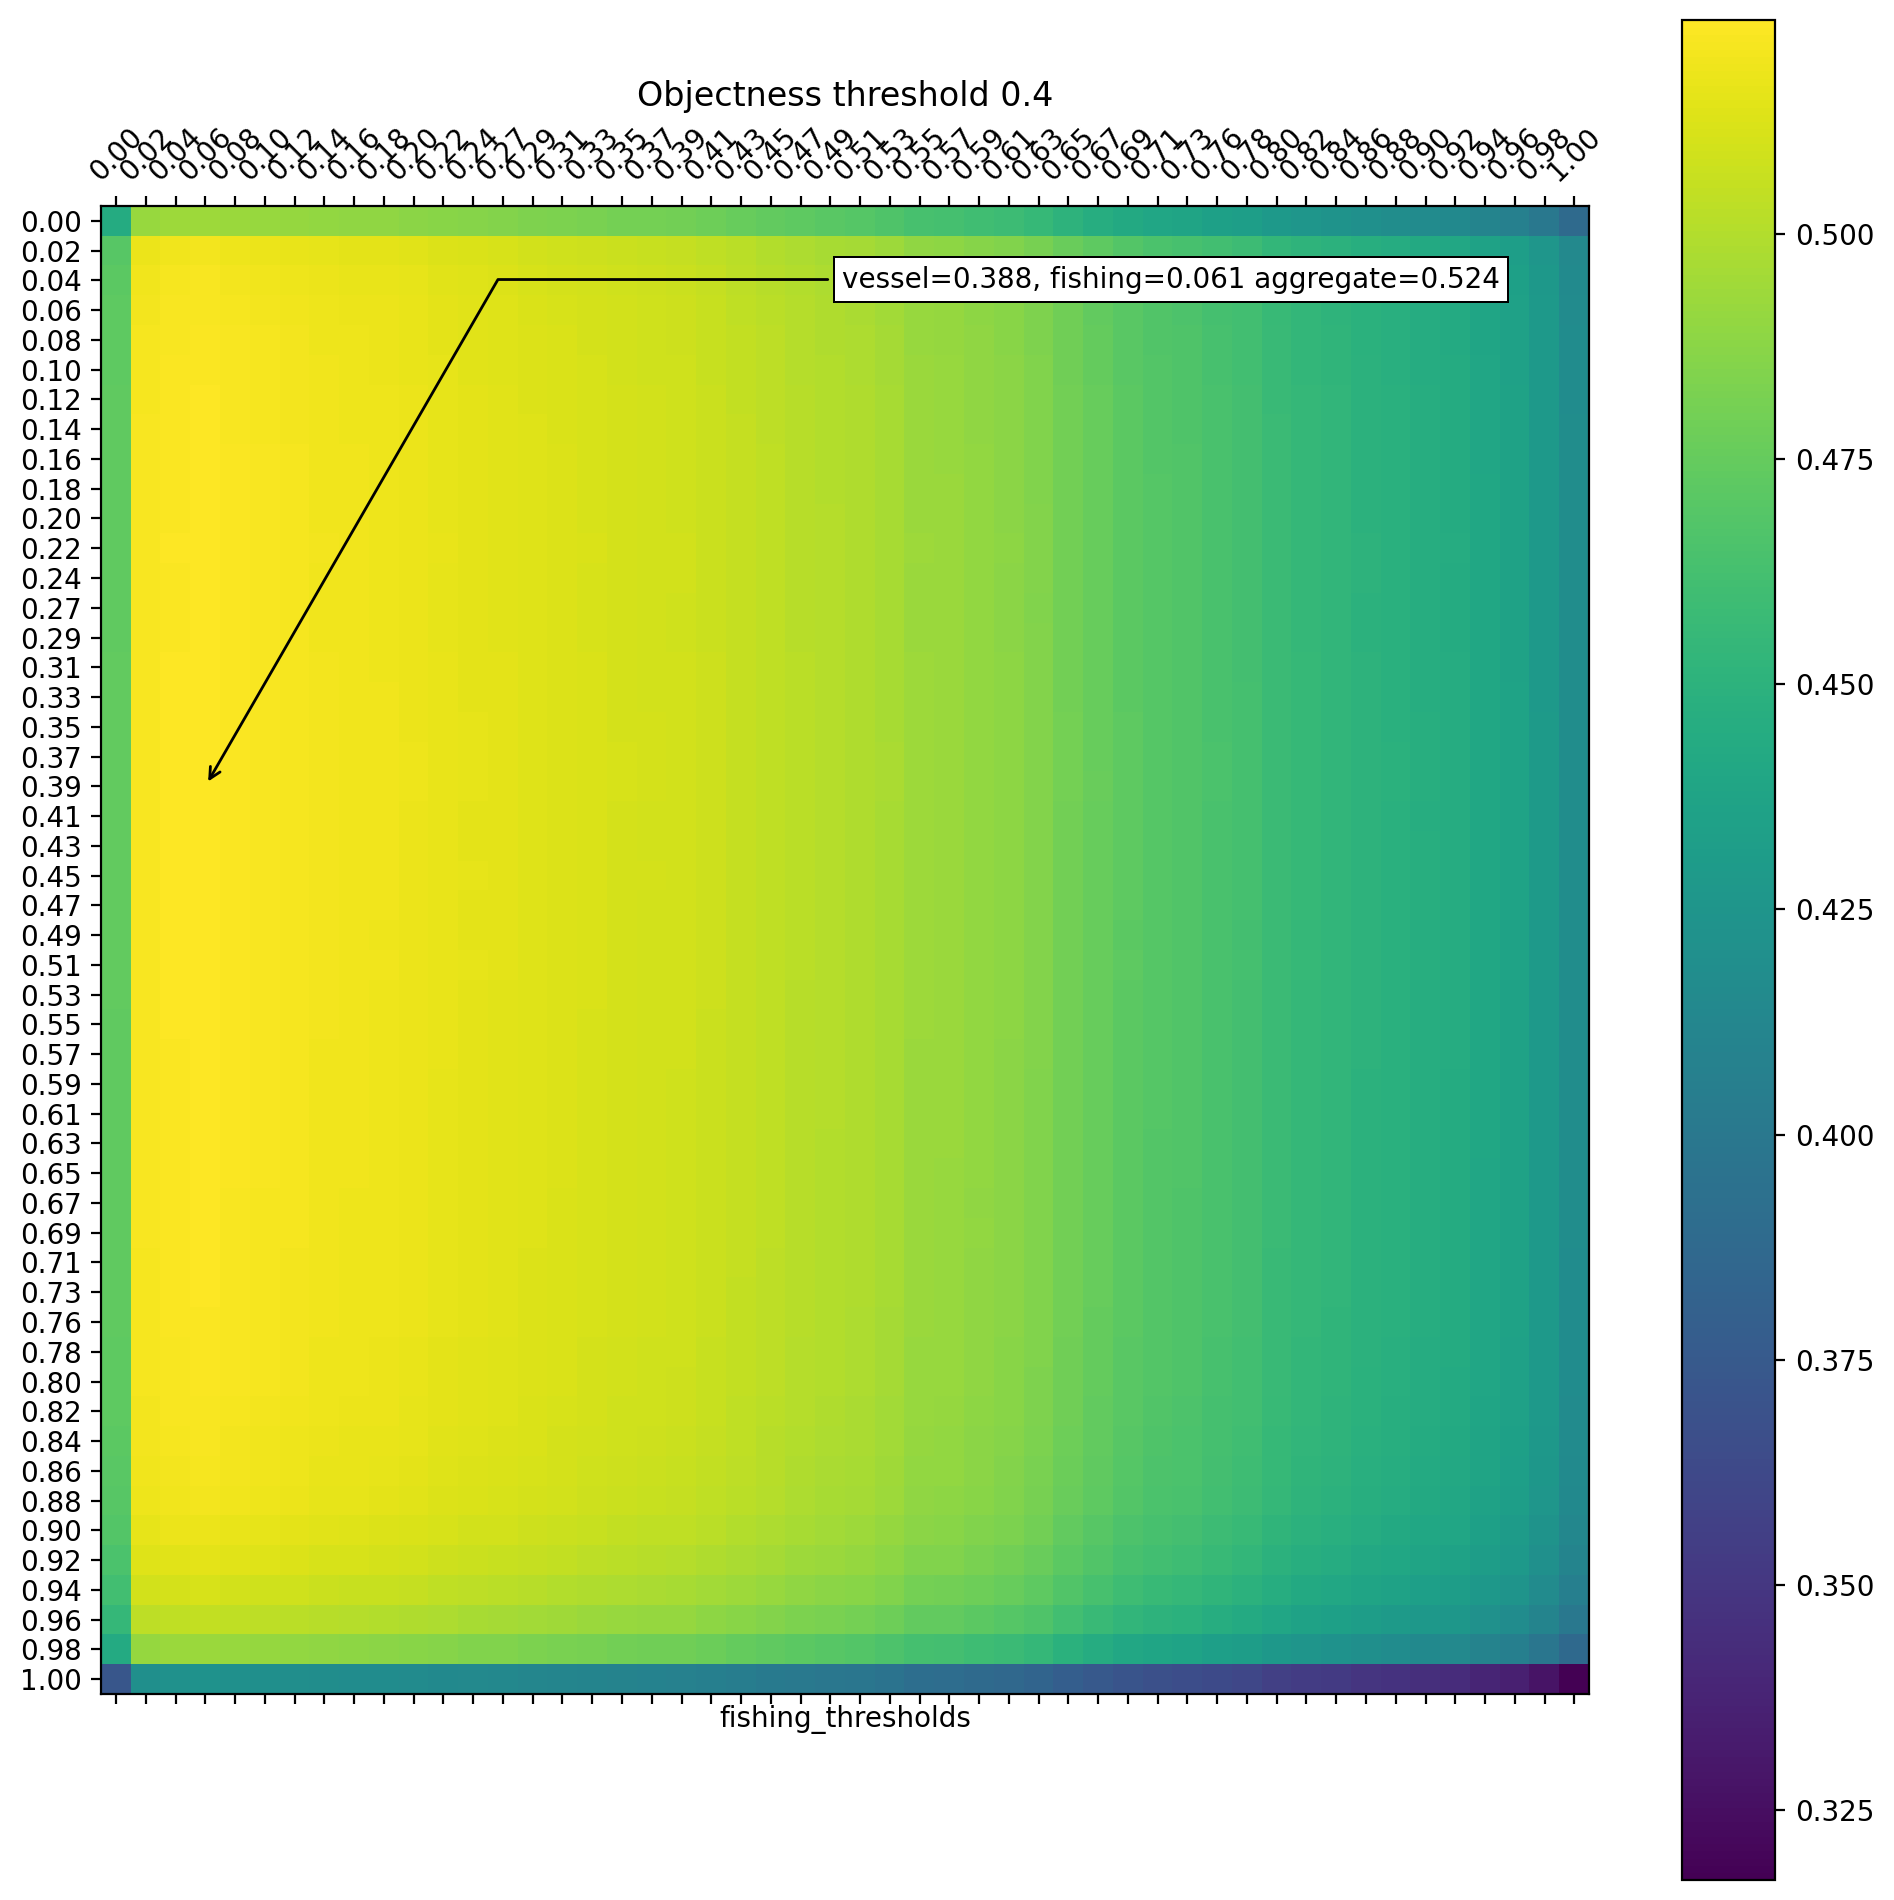

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

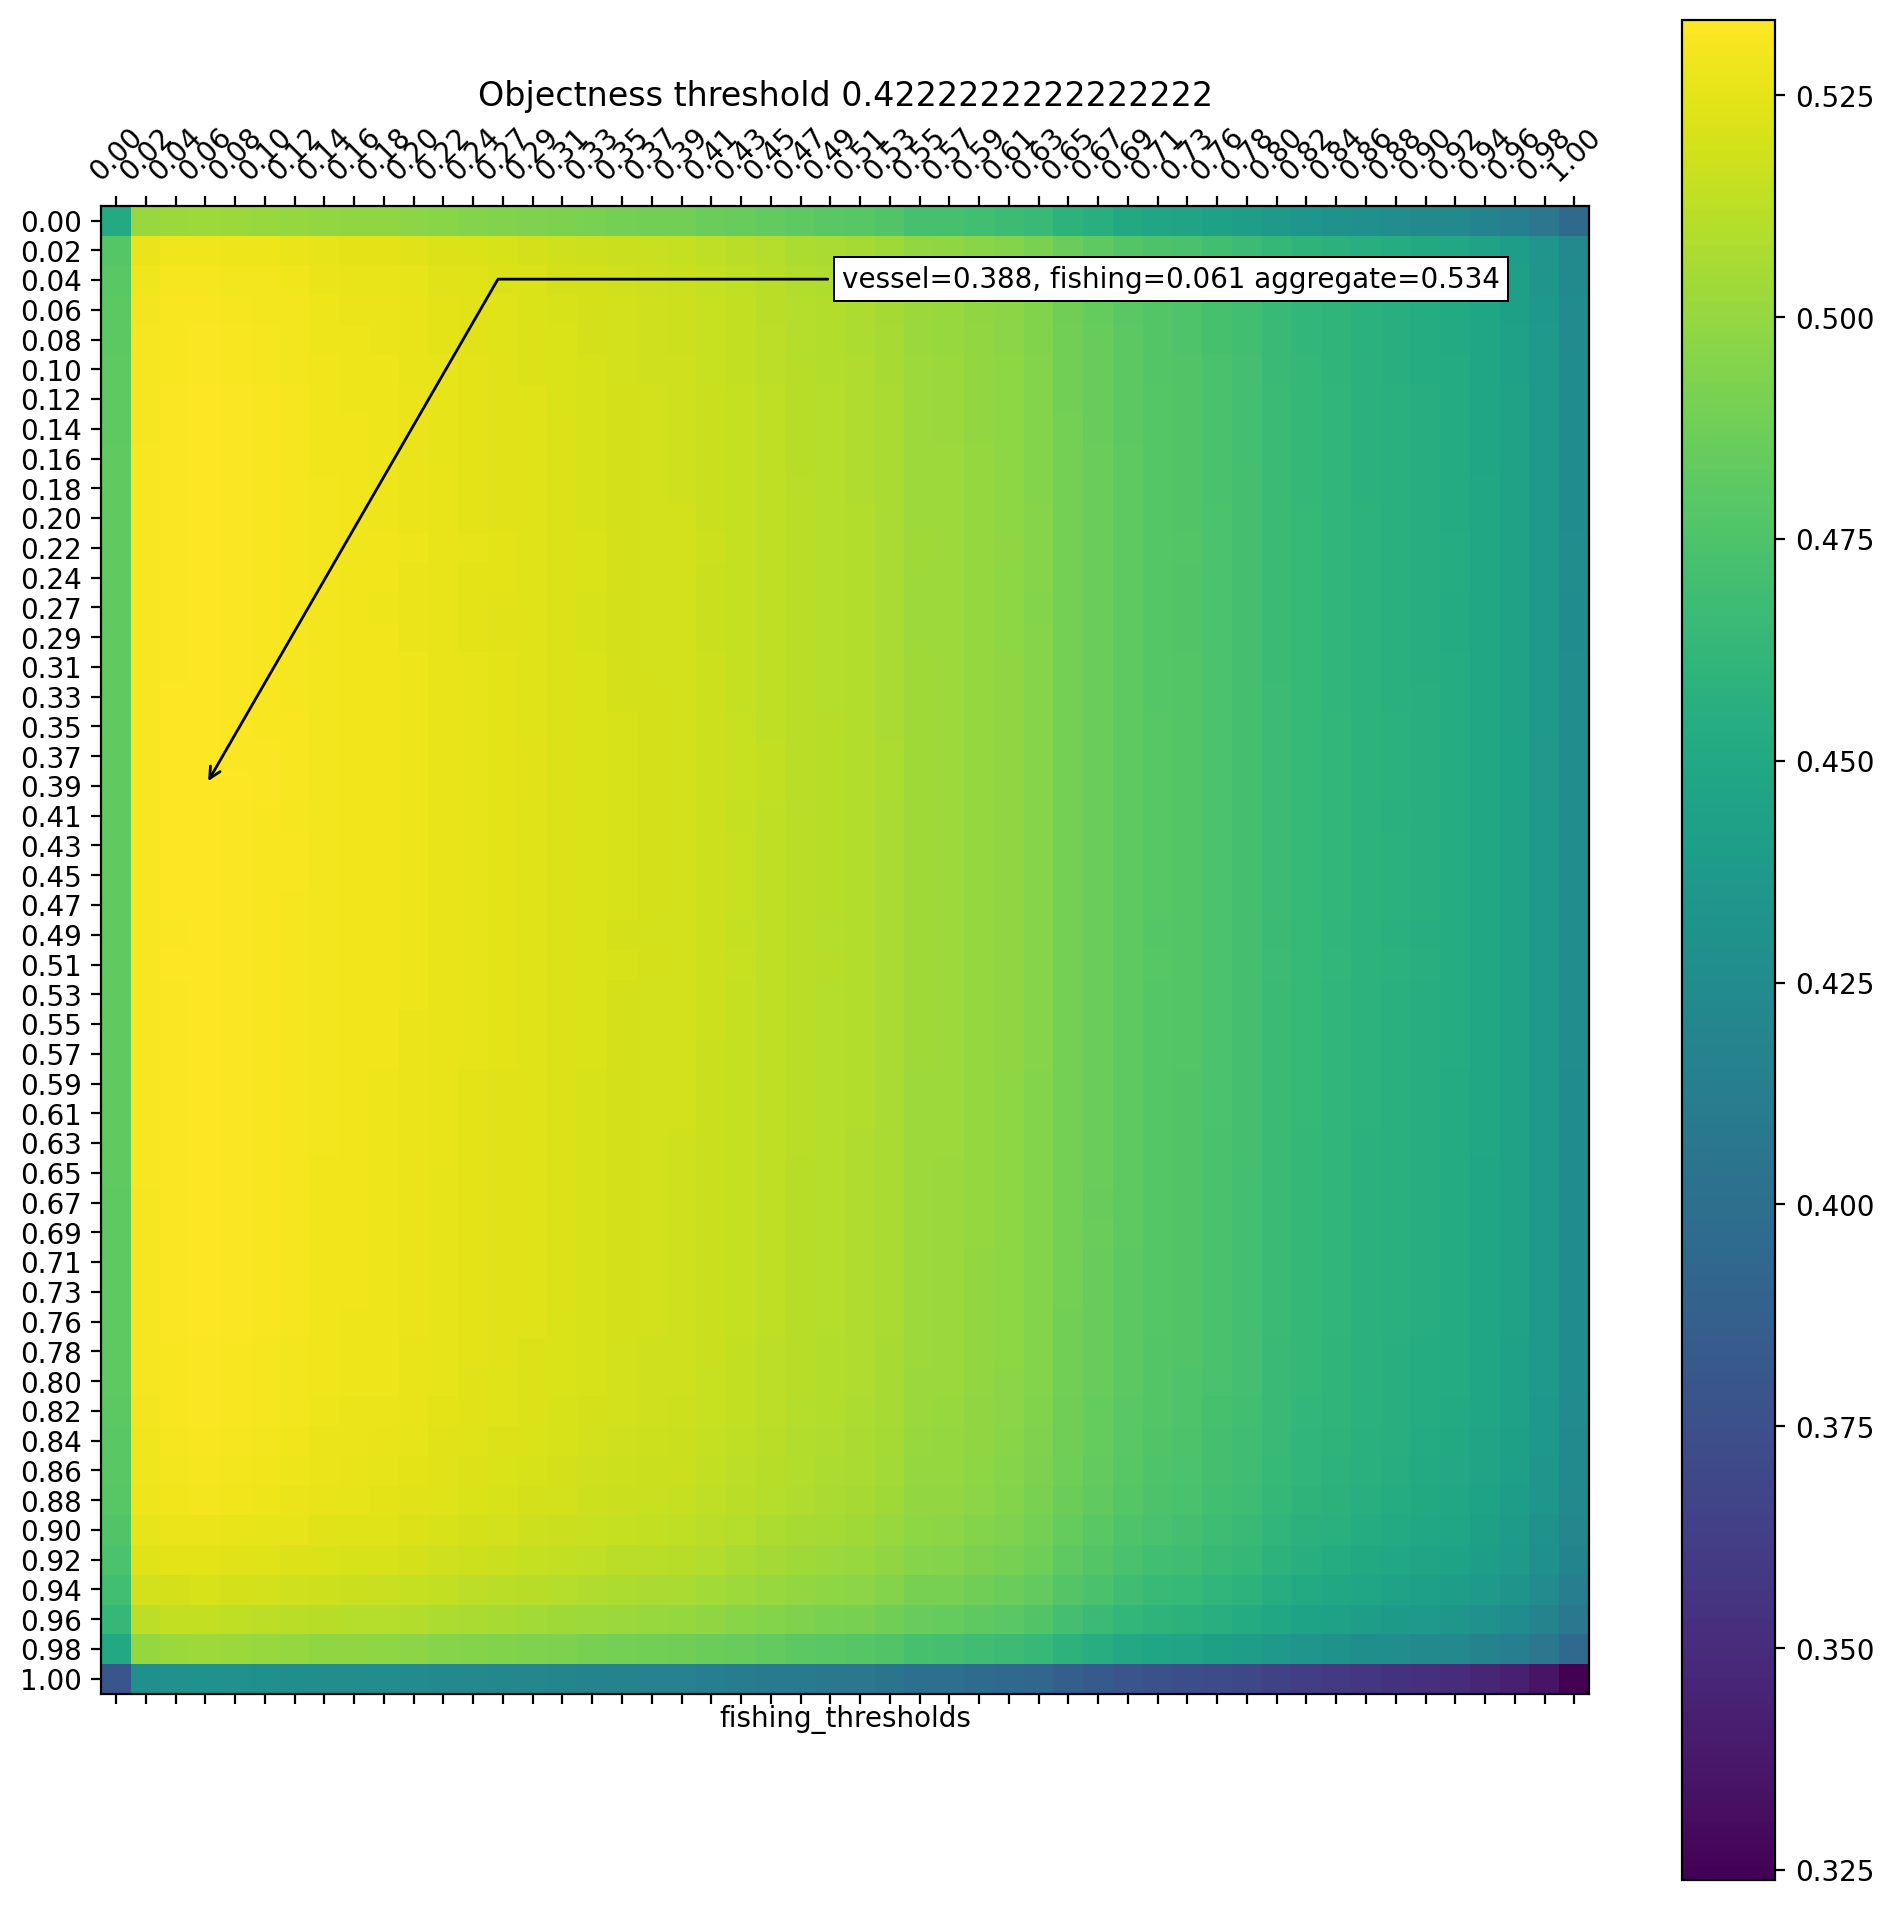

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

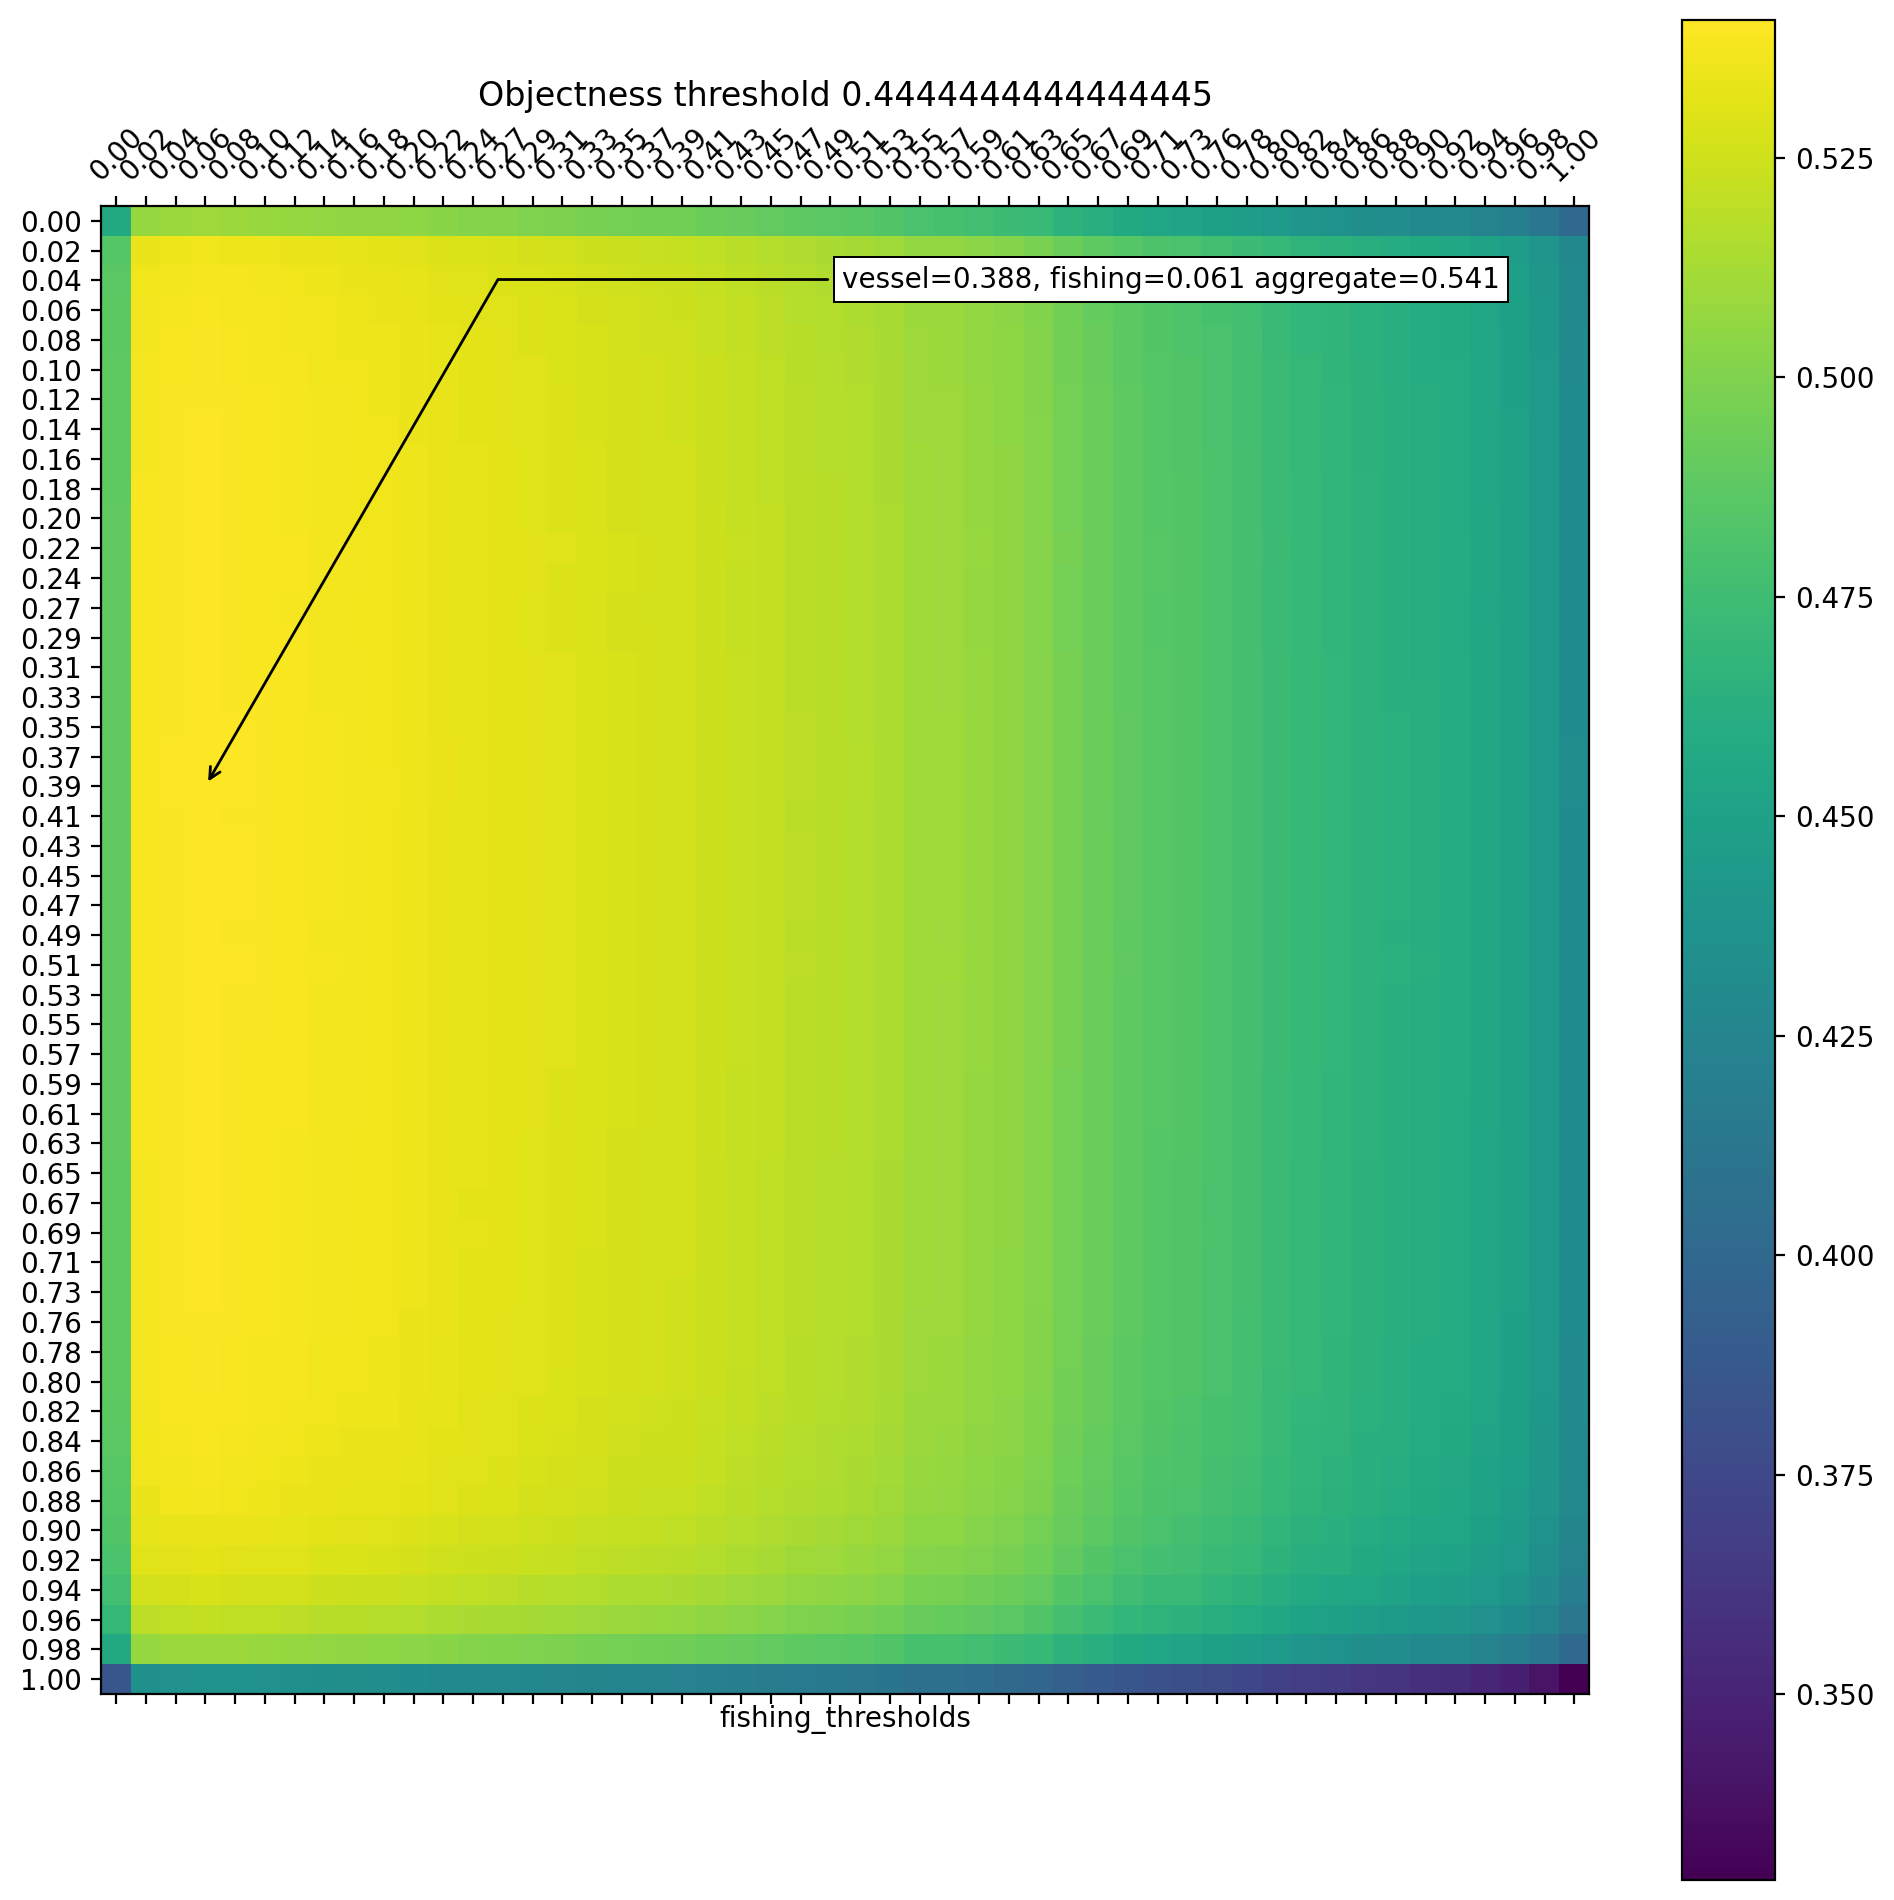

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

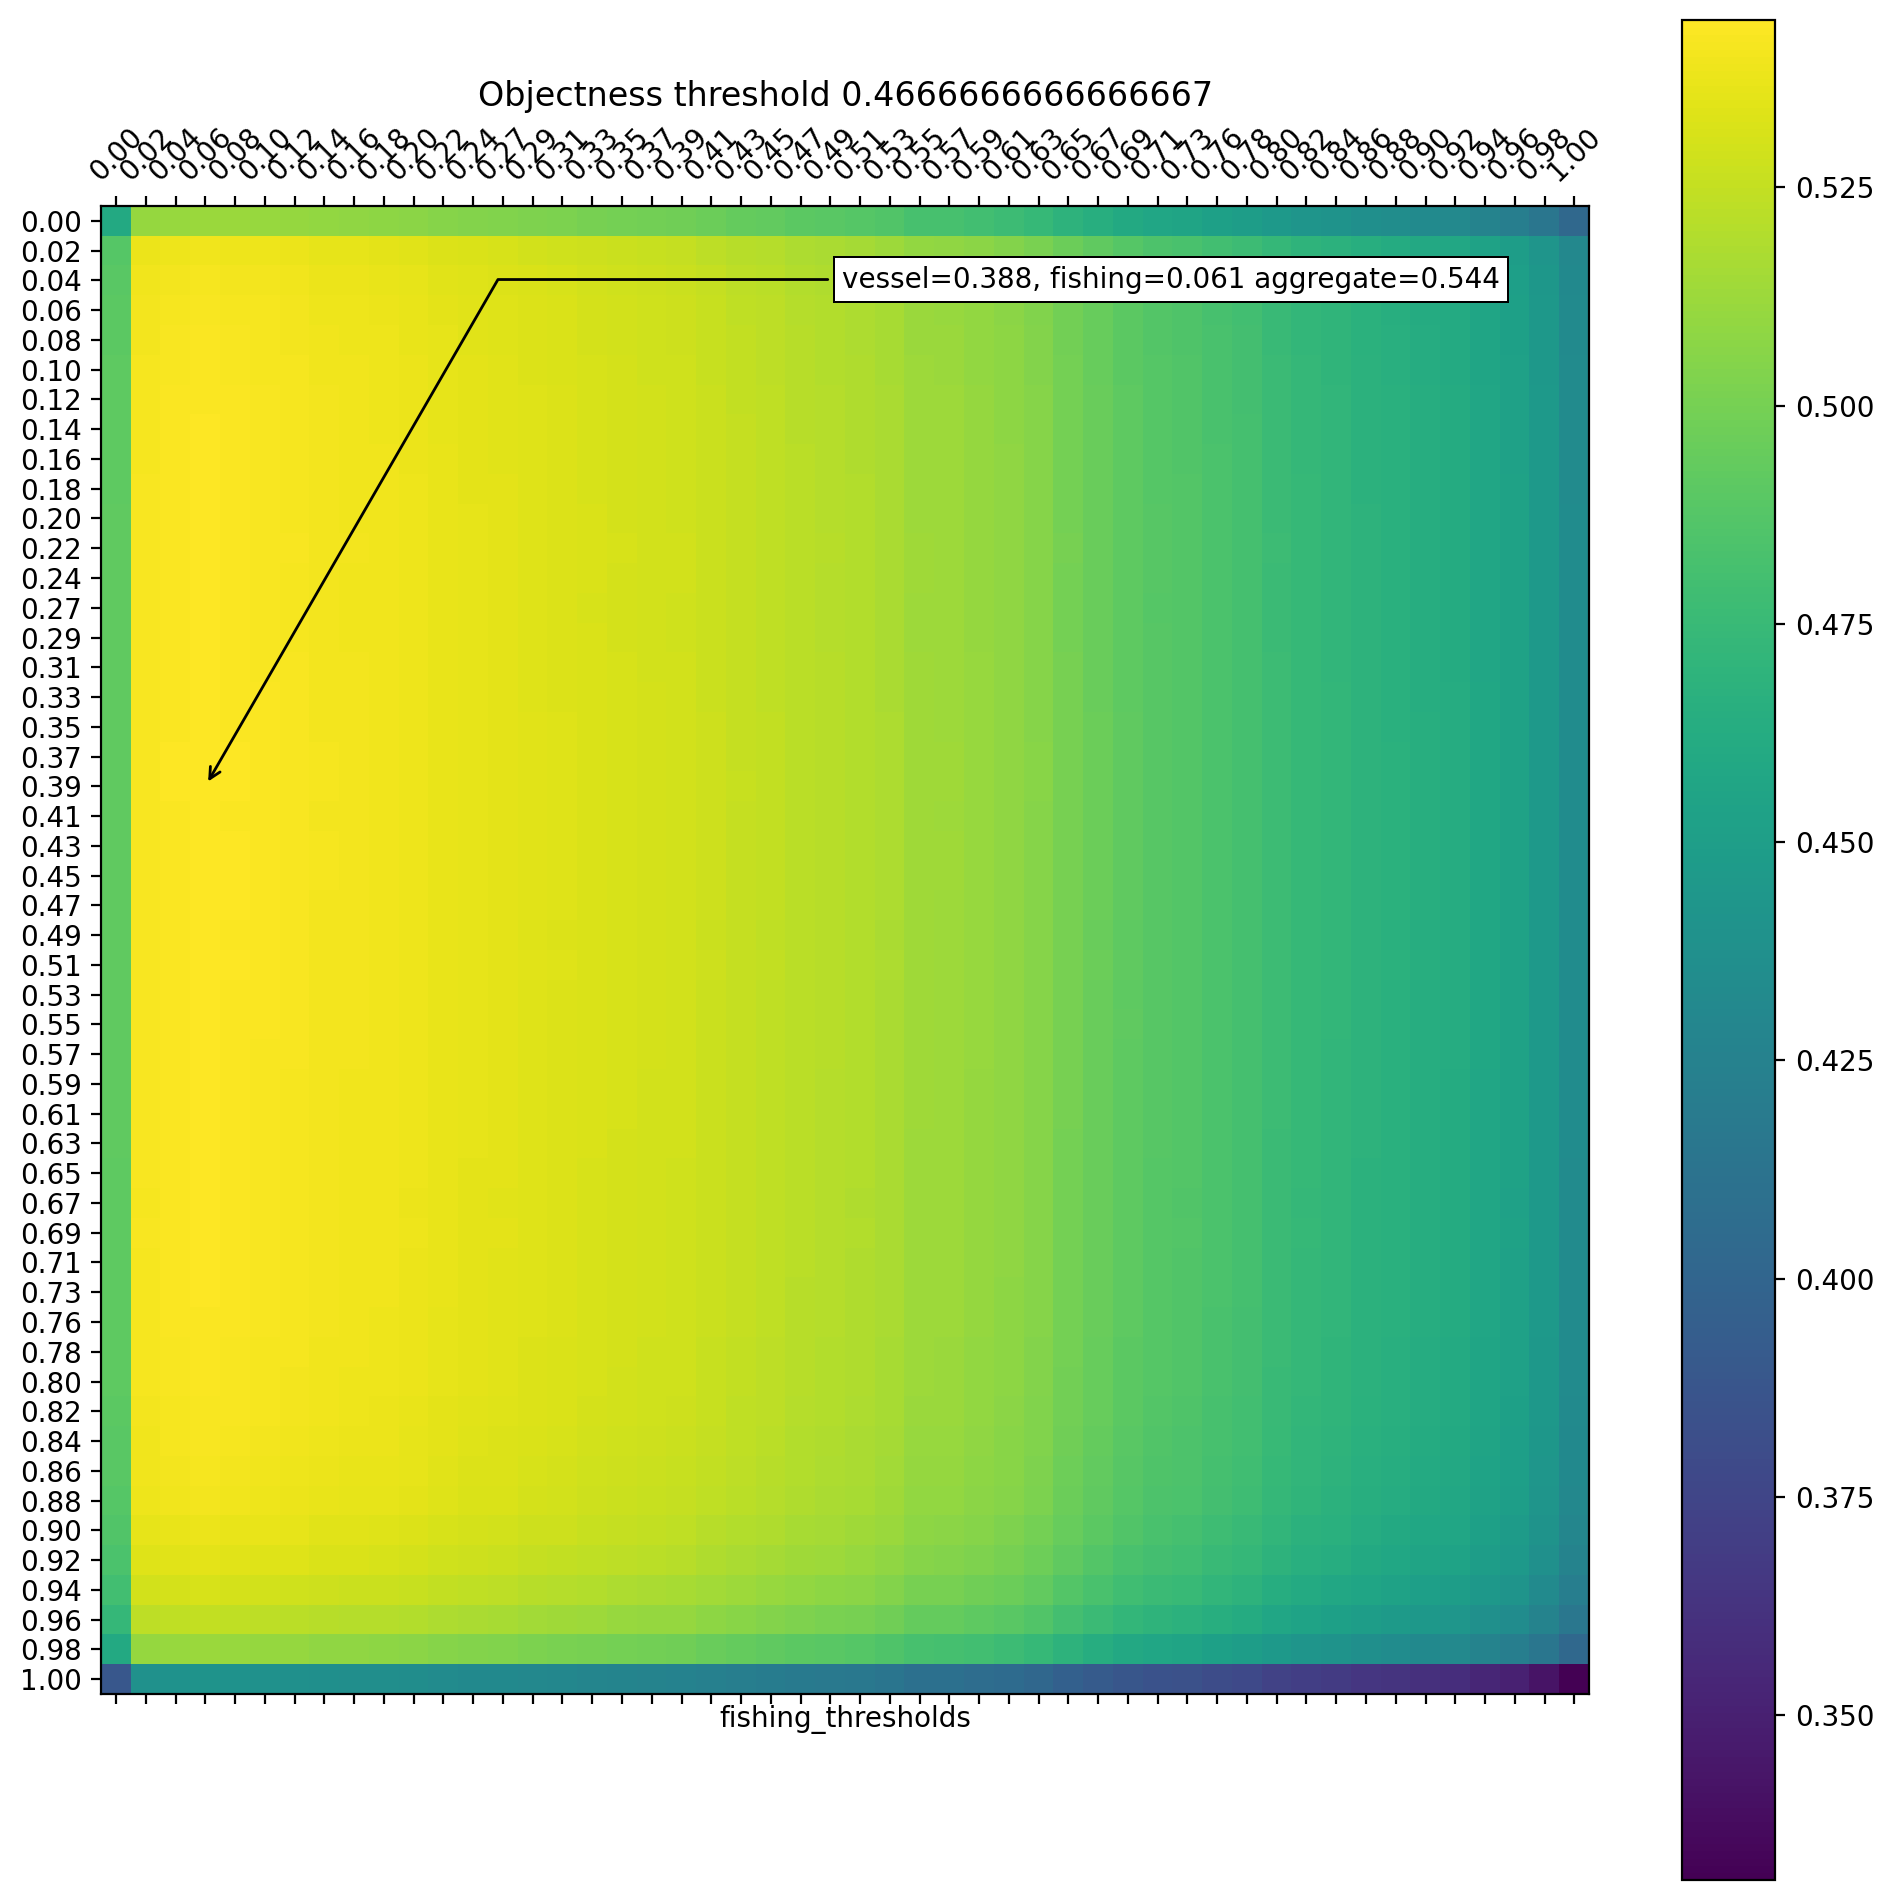

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

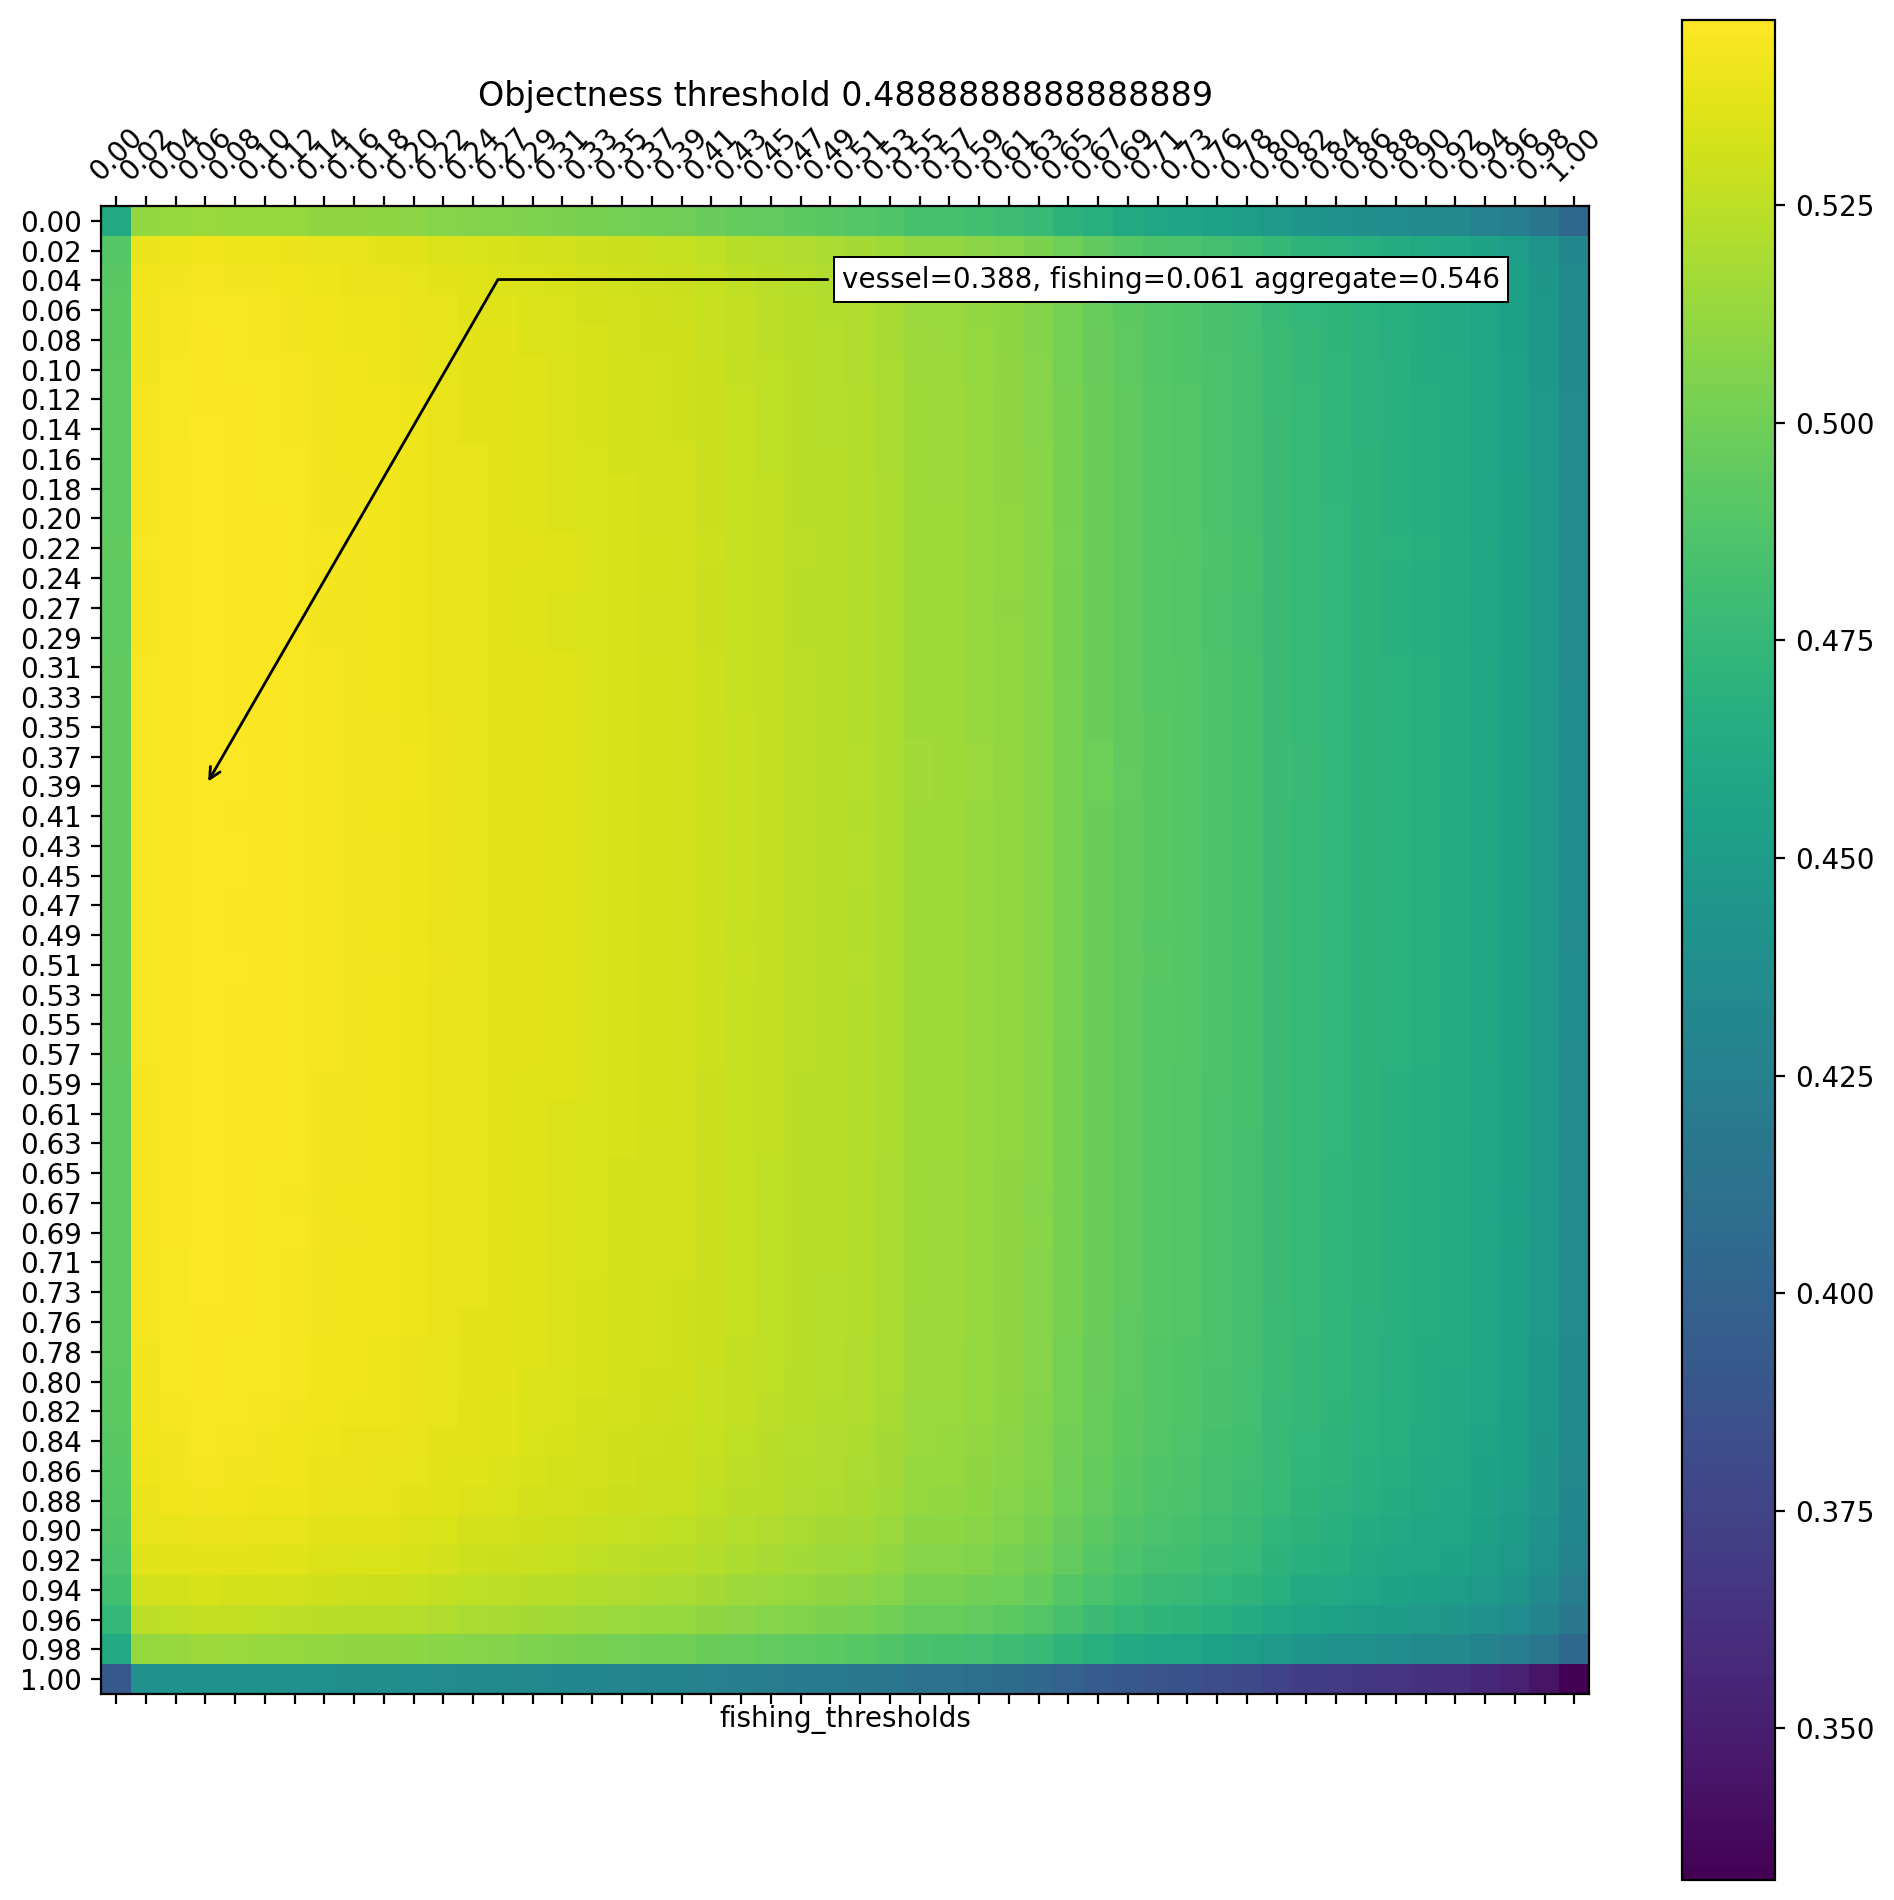

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

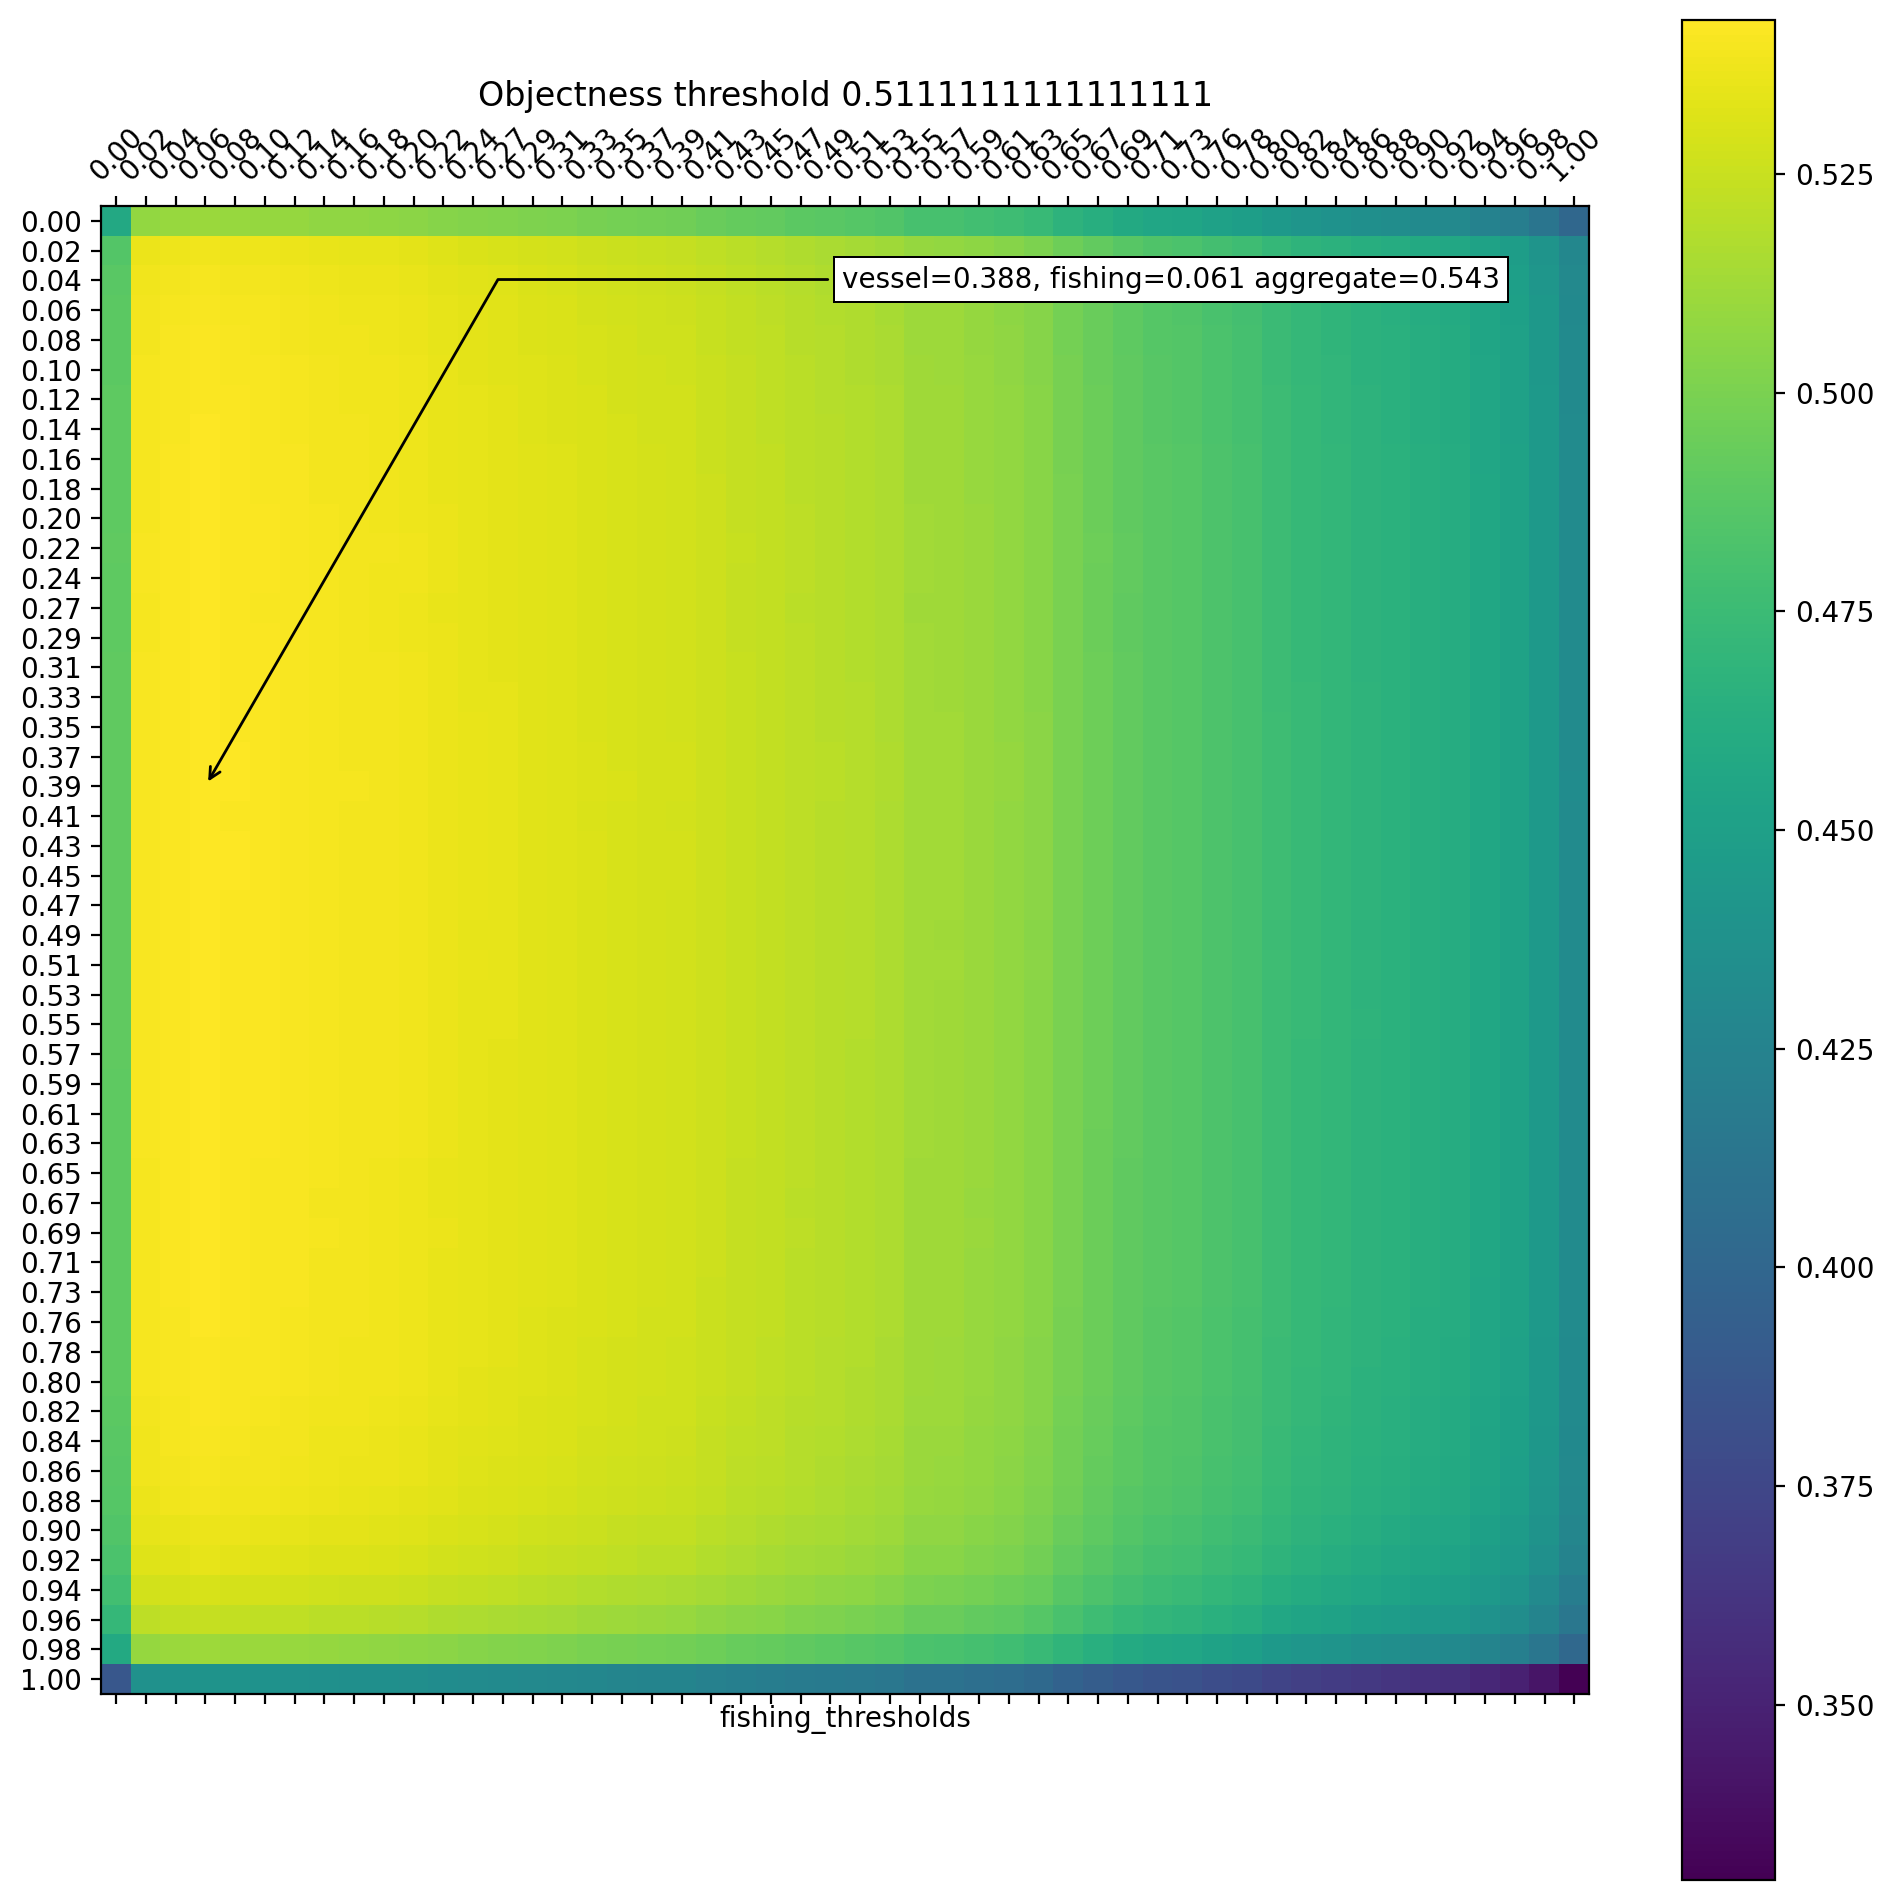

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

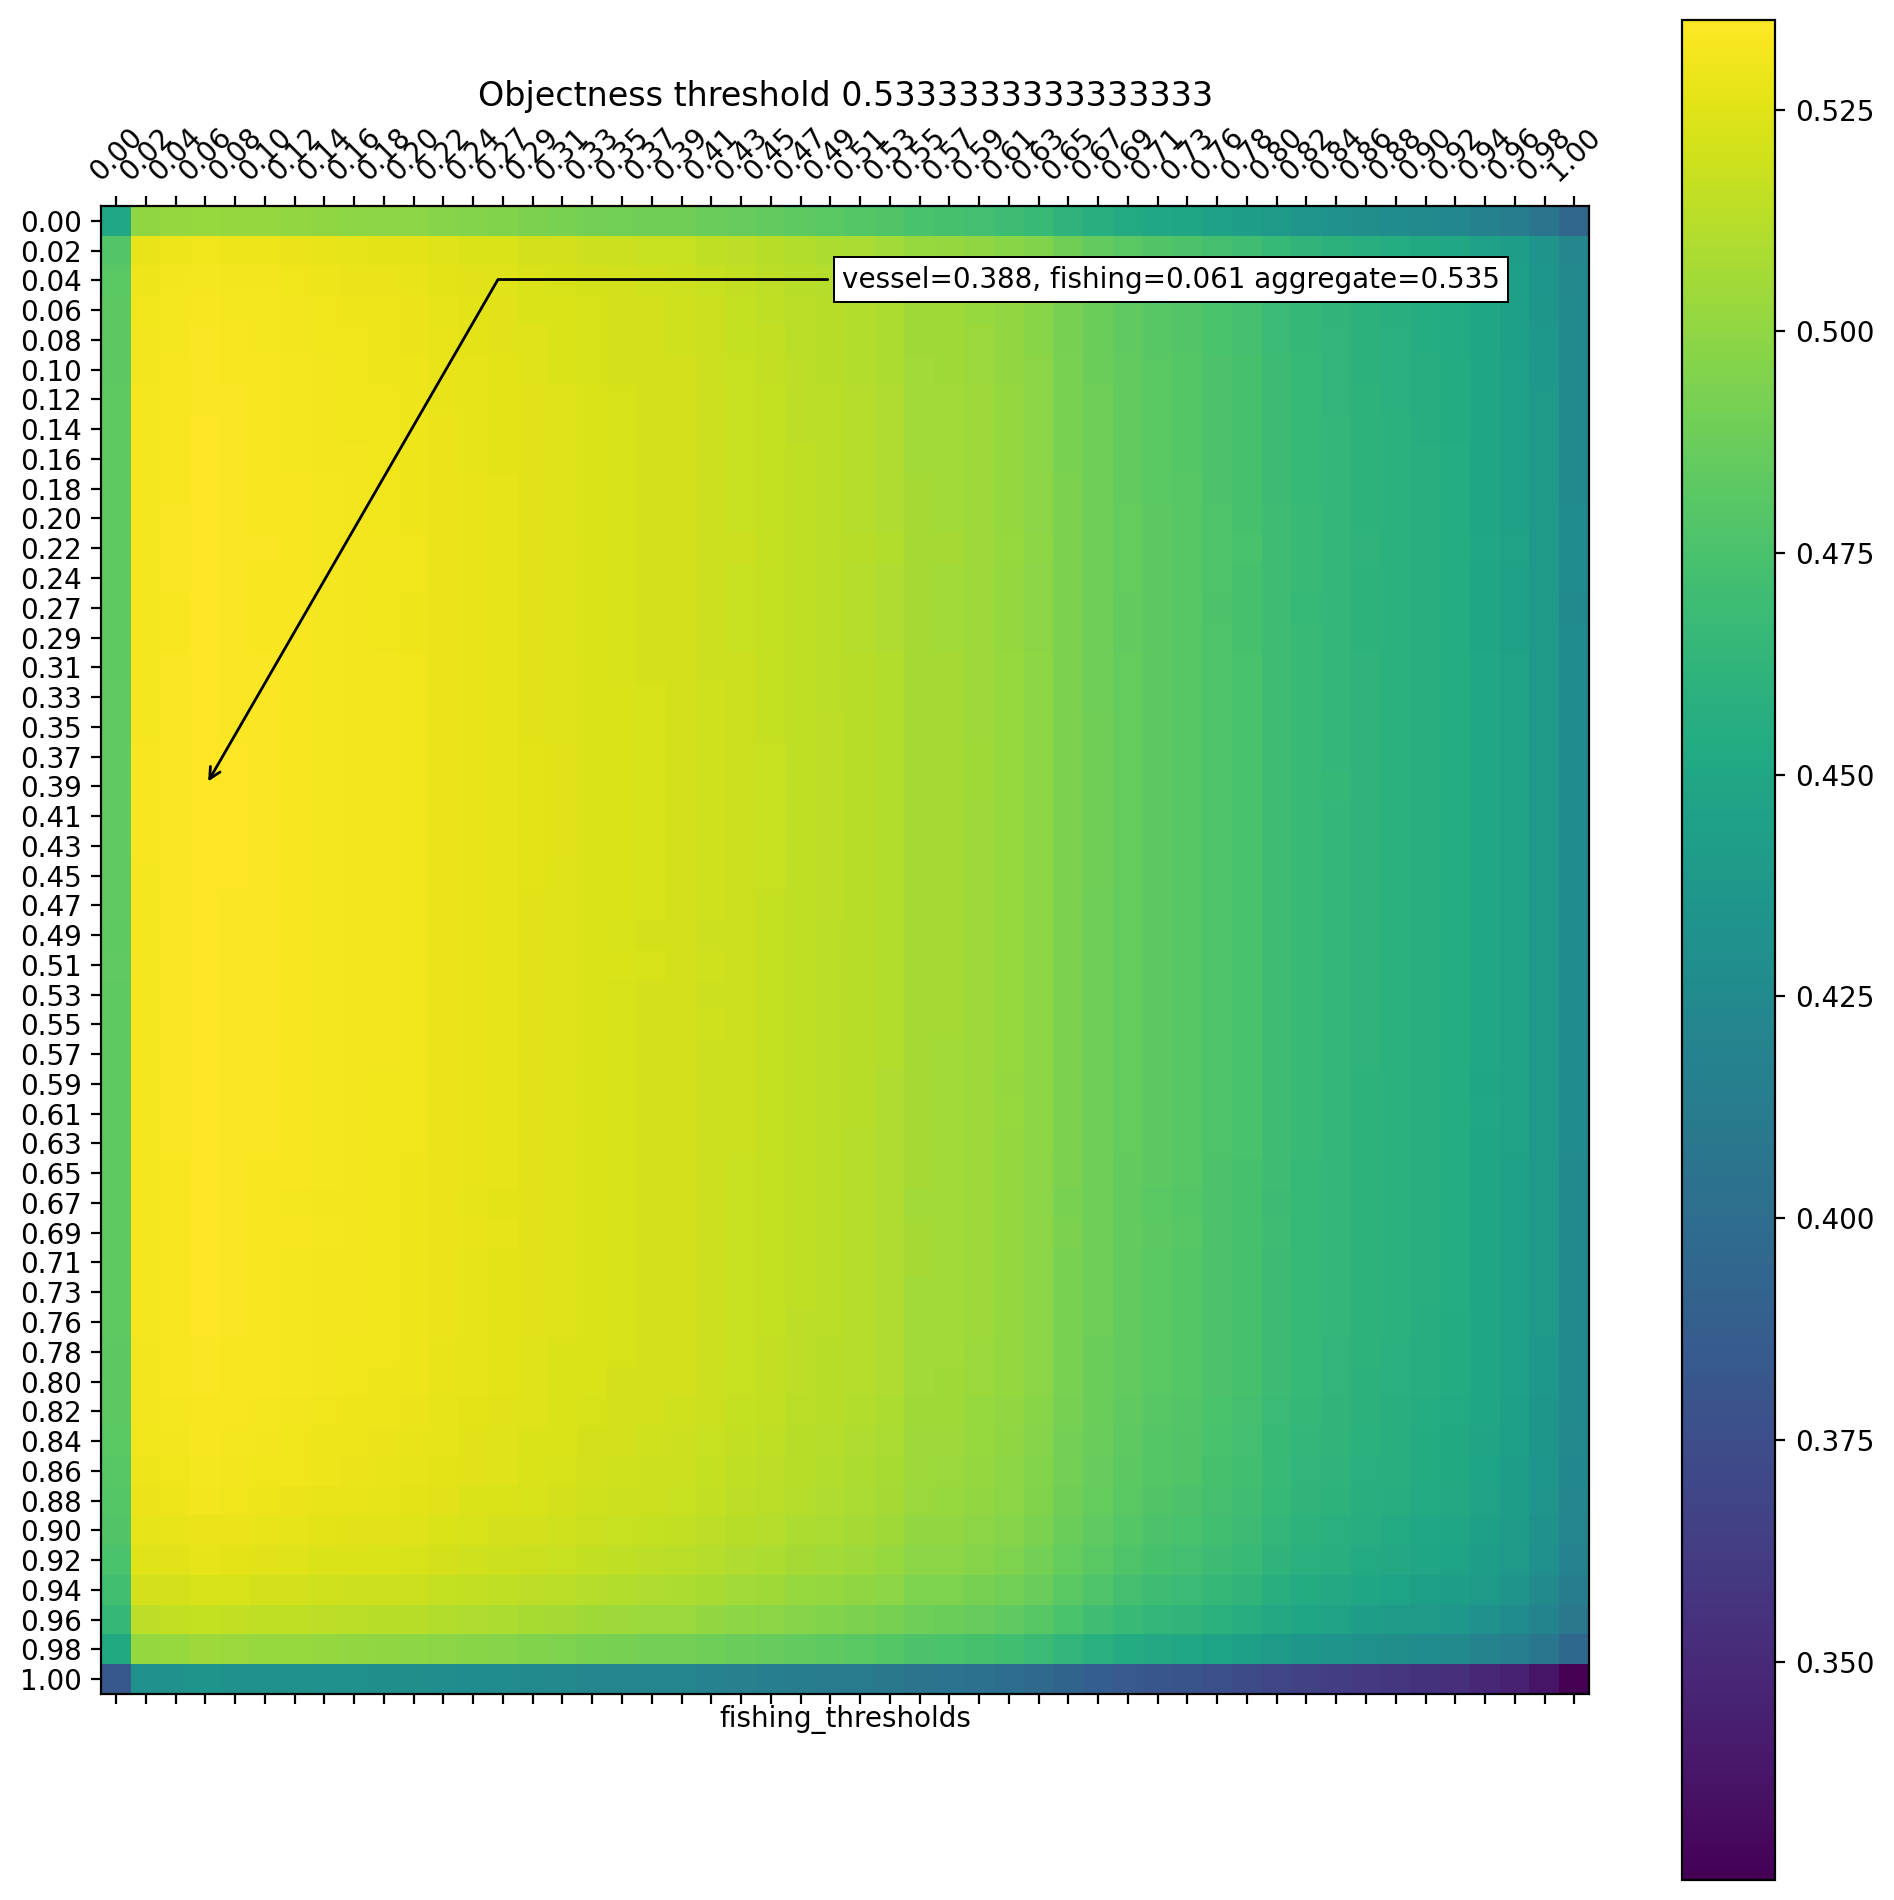

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

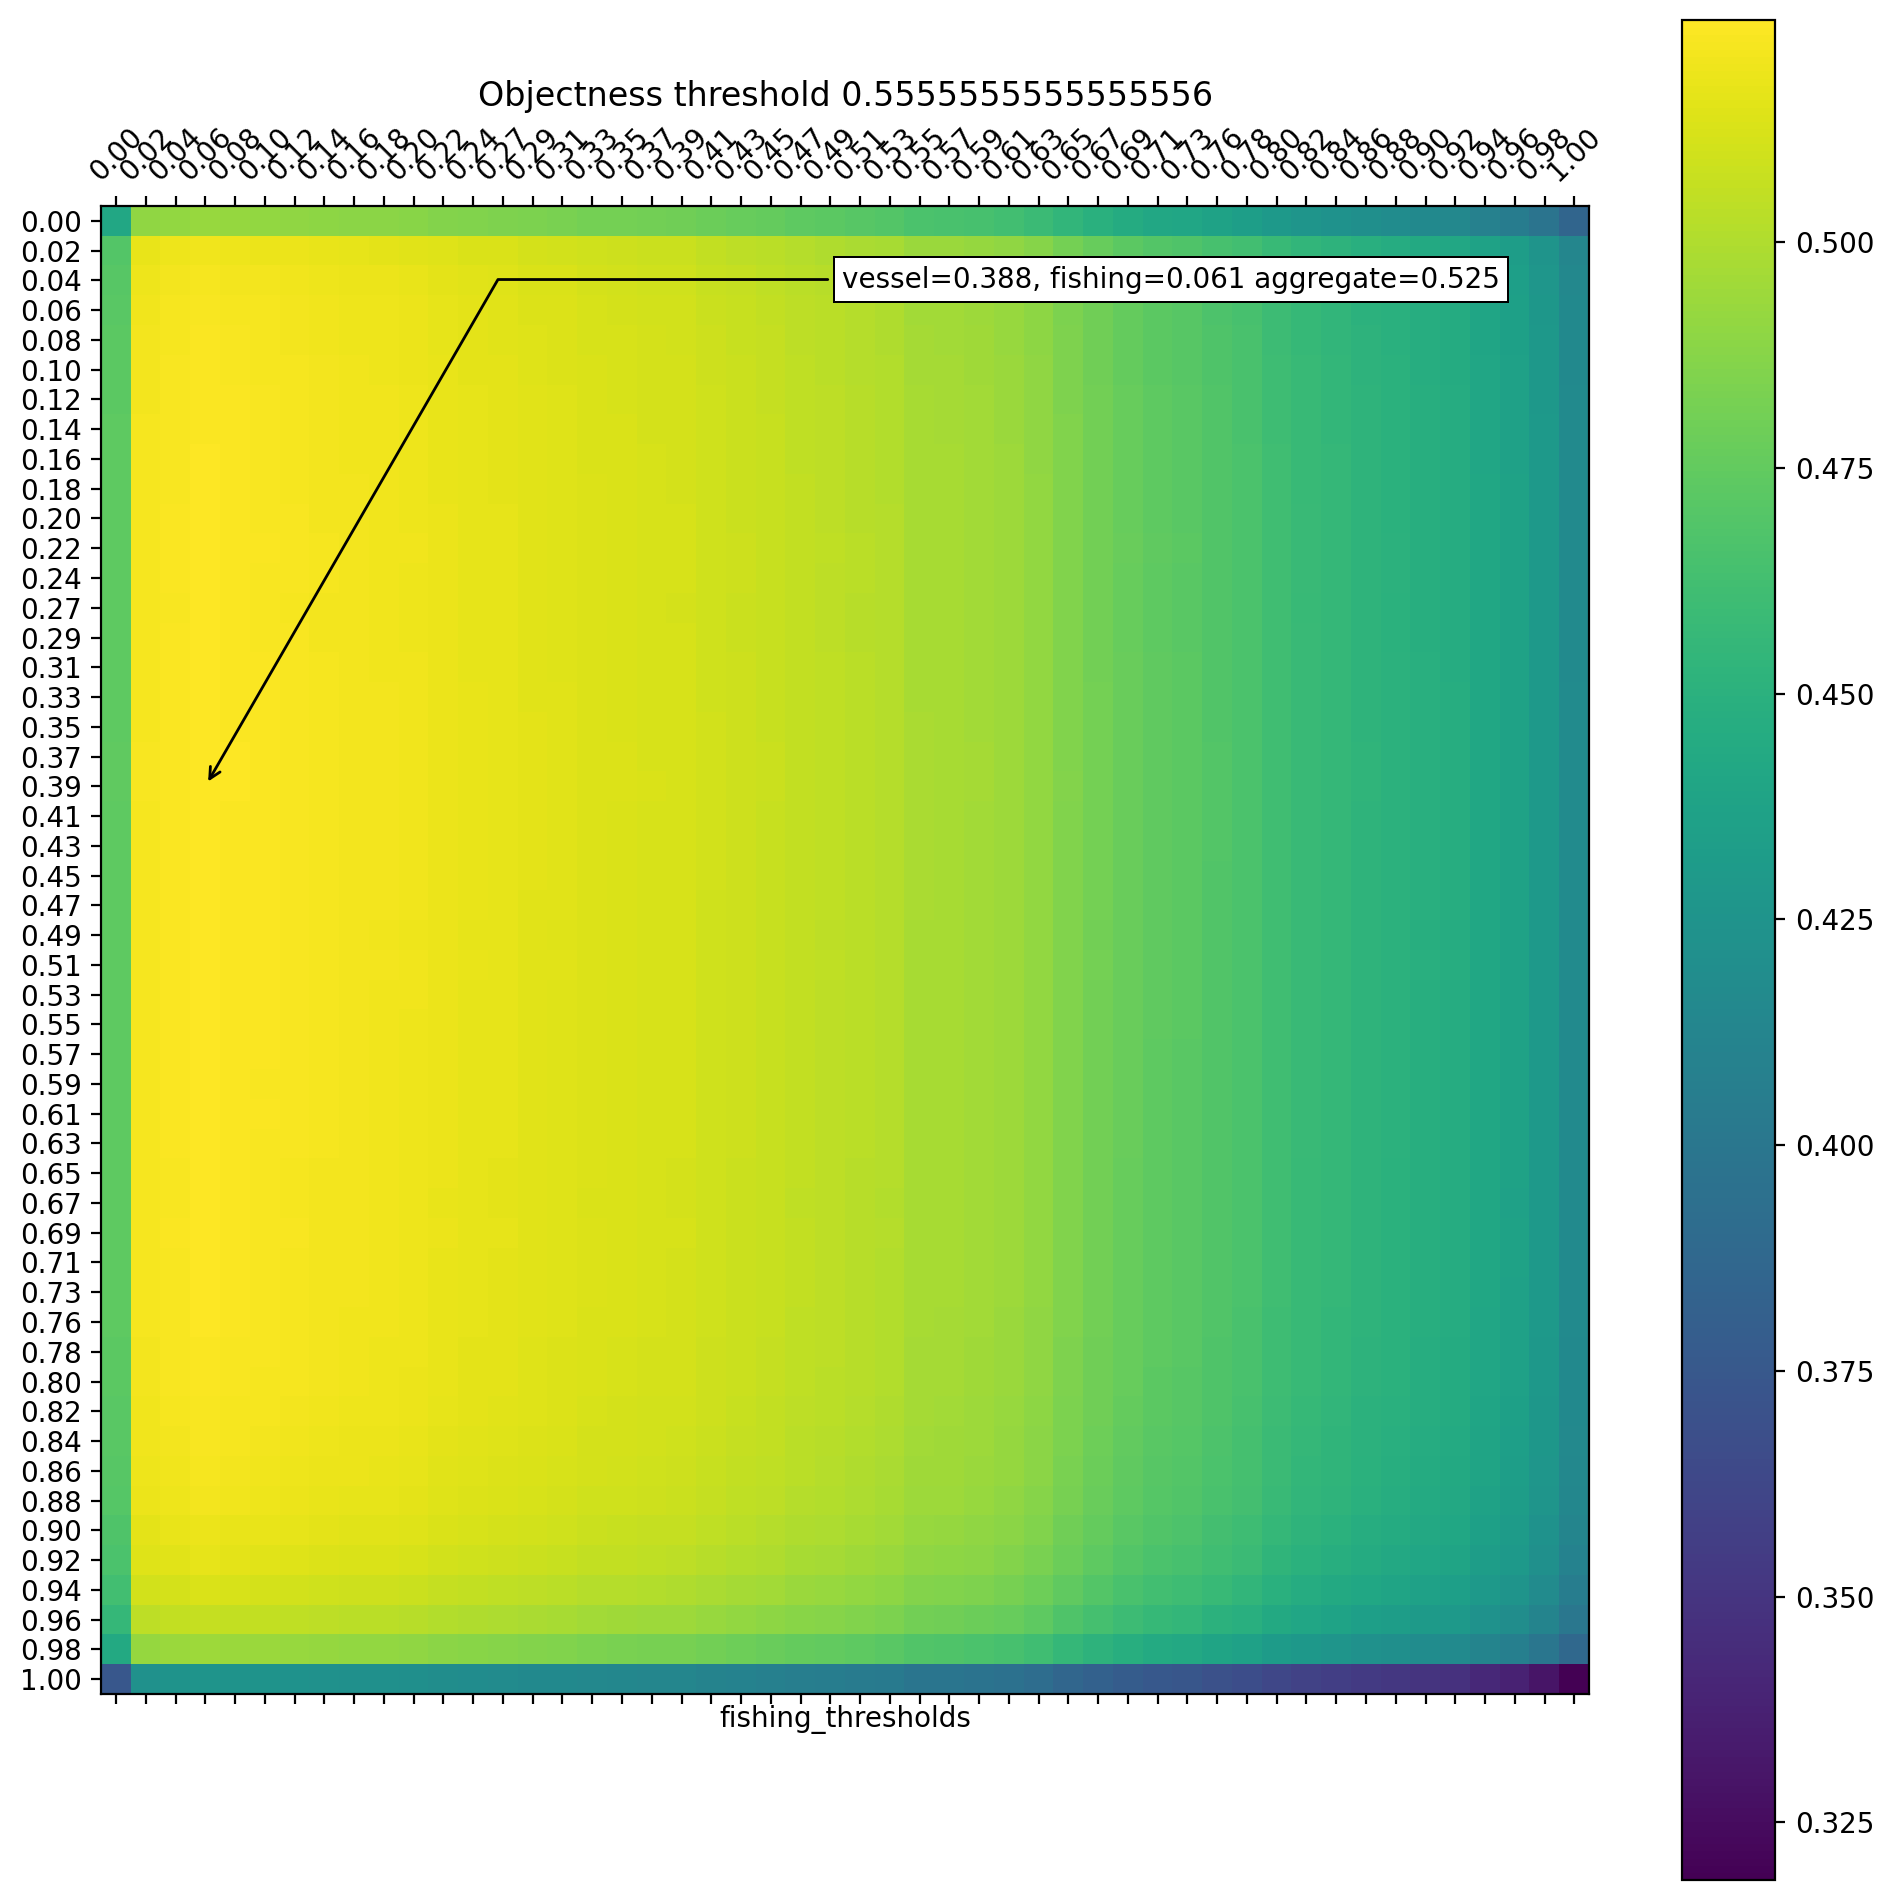

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

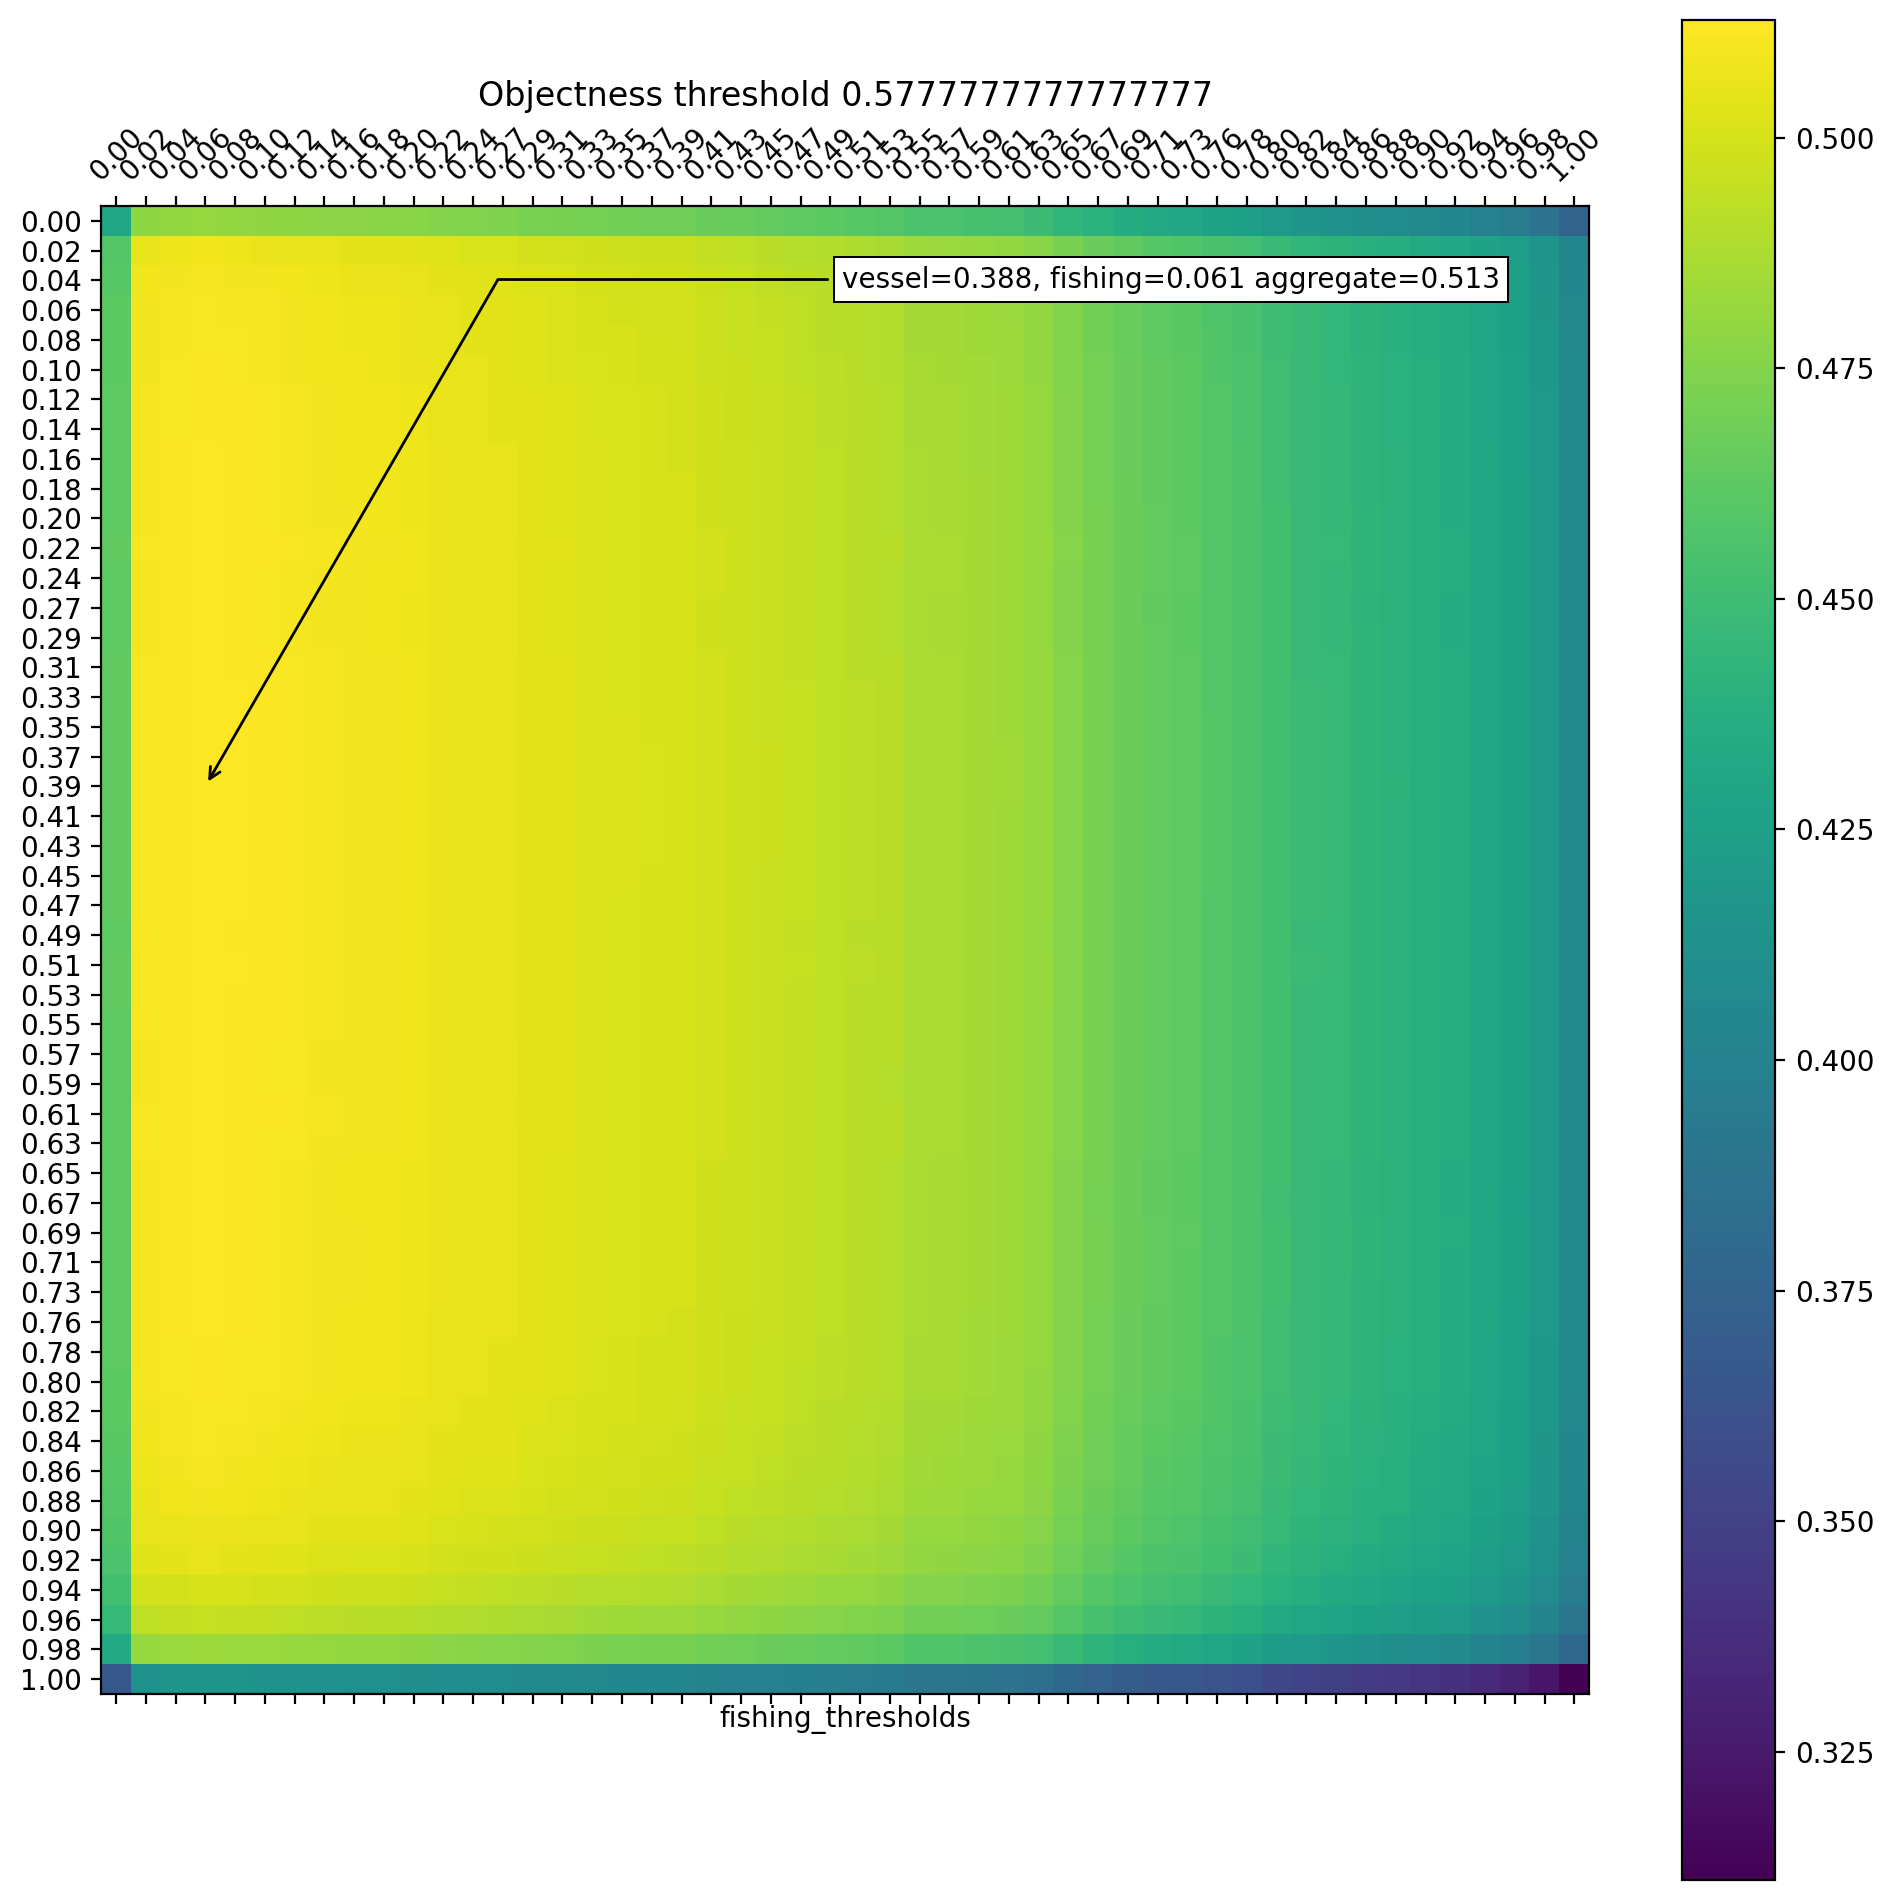

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

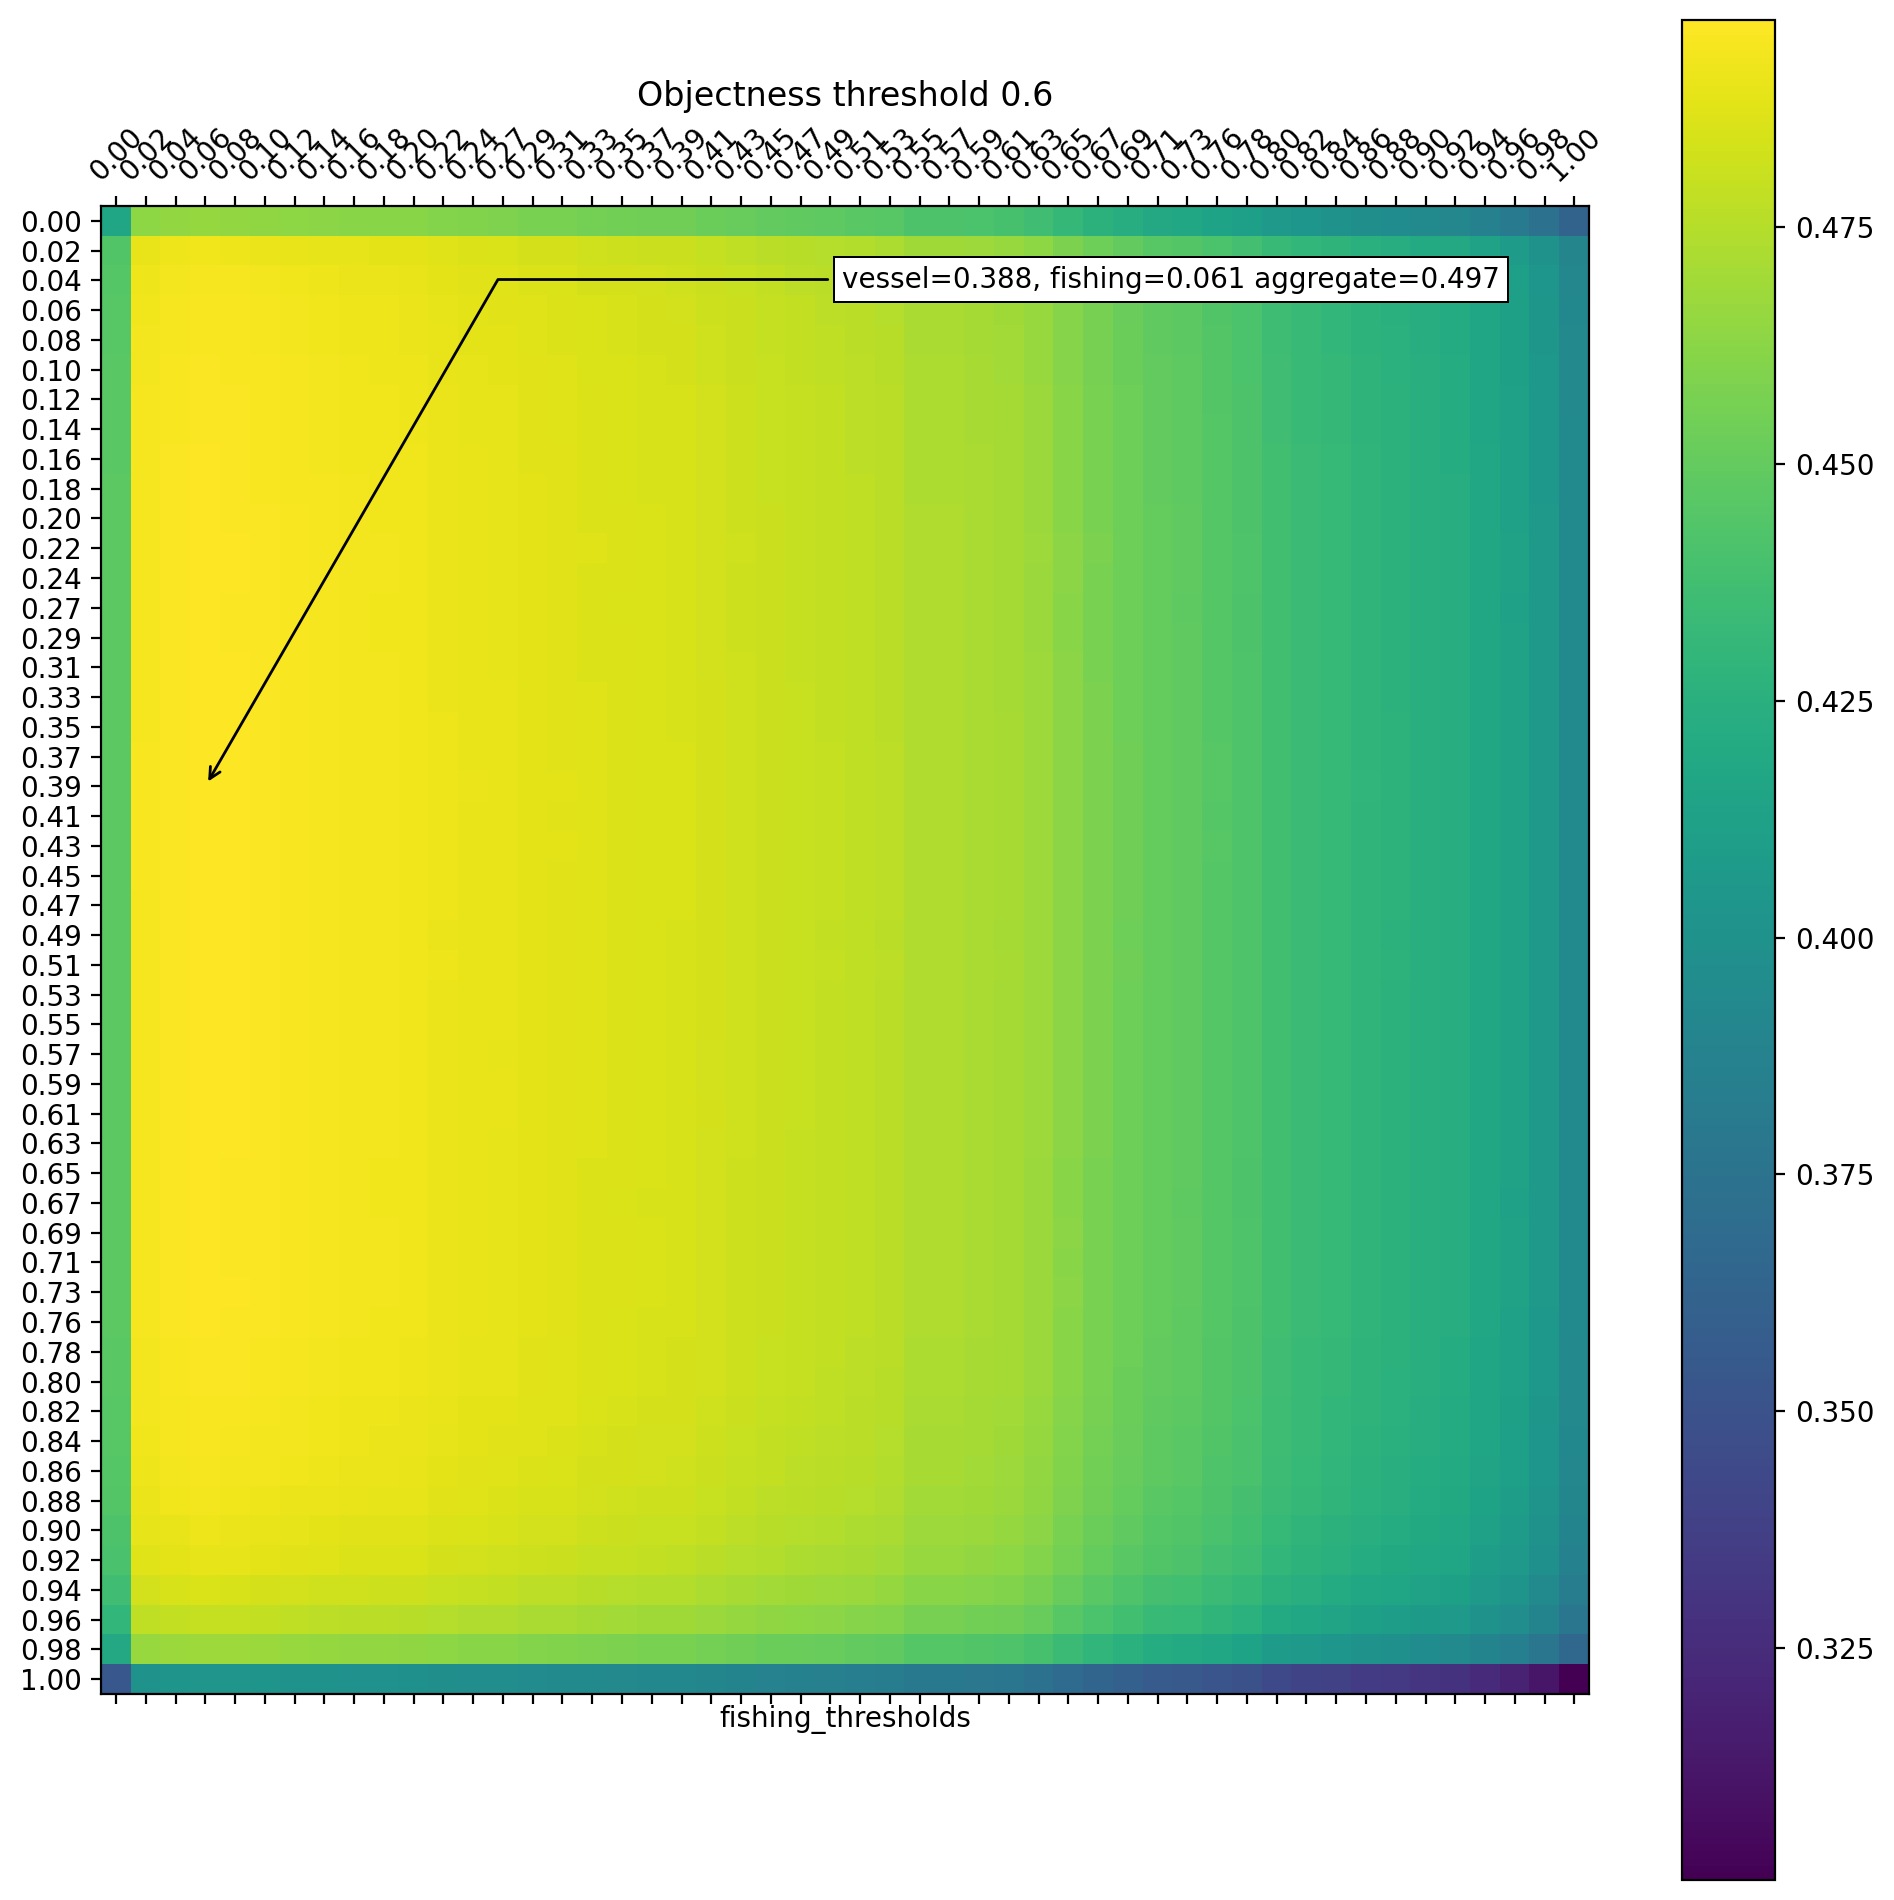

In [3]:
oof_scores = [
    "../runs/211114_11_57_r18_unet_s2_leaky_valid_4fold_rfl_bce_mse_regularized_flips_medium_fold0/checkpoints_metrics_aggregate/valid__step_1536_tta_None/valid_thresholds_summary_step_1536_tta_None.csv",
    "../runs/211113_01_21_r18_unet_s2_leaky_valid_4fold_rfl_bce_mse_regularized_flips_medium_fold1/checkpoints_metrics_aggregate/valid__step_1536_tta_None/valid_thresholds_summary_step_1536_tta_None.csv",
    "../runs/211113_10_48_r18_unet_s2_leaky_valid_4fold_rfl_bce_mse_regularized_flips_medium_fold2/checkpoints_metrics_aggregate/valid__step_1536_tta_None/valid_thresholds_summary_step_1536_tta_None.csv",
    "../runs/211114_00_47_r18_unet_s2_leaky_valid_4fold_rfl_bce_mse_regularized_flips_medium_fold3/checkpoints_metrics_aggregate/valid__step_1536_tta_None/valid_thresholds_summary_step_1536_tta_None.csv",
]

plot_visualizations([pd.read_csv(x) for x in oof_scores])


<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

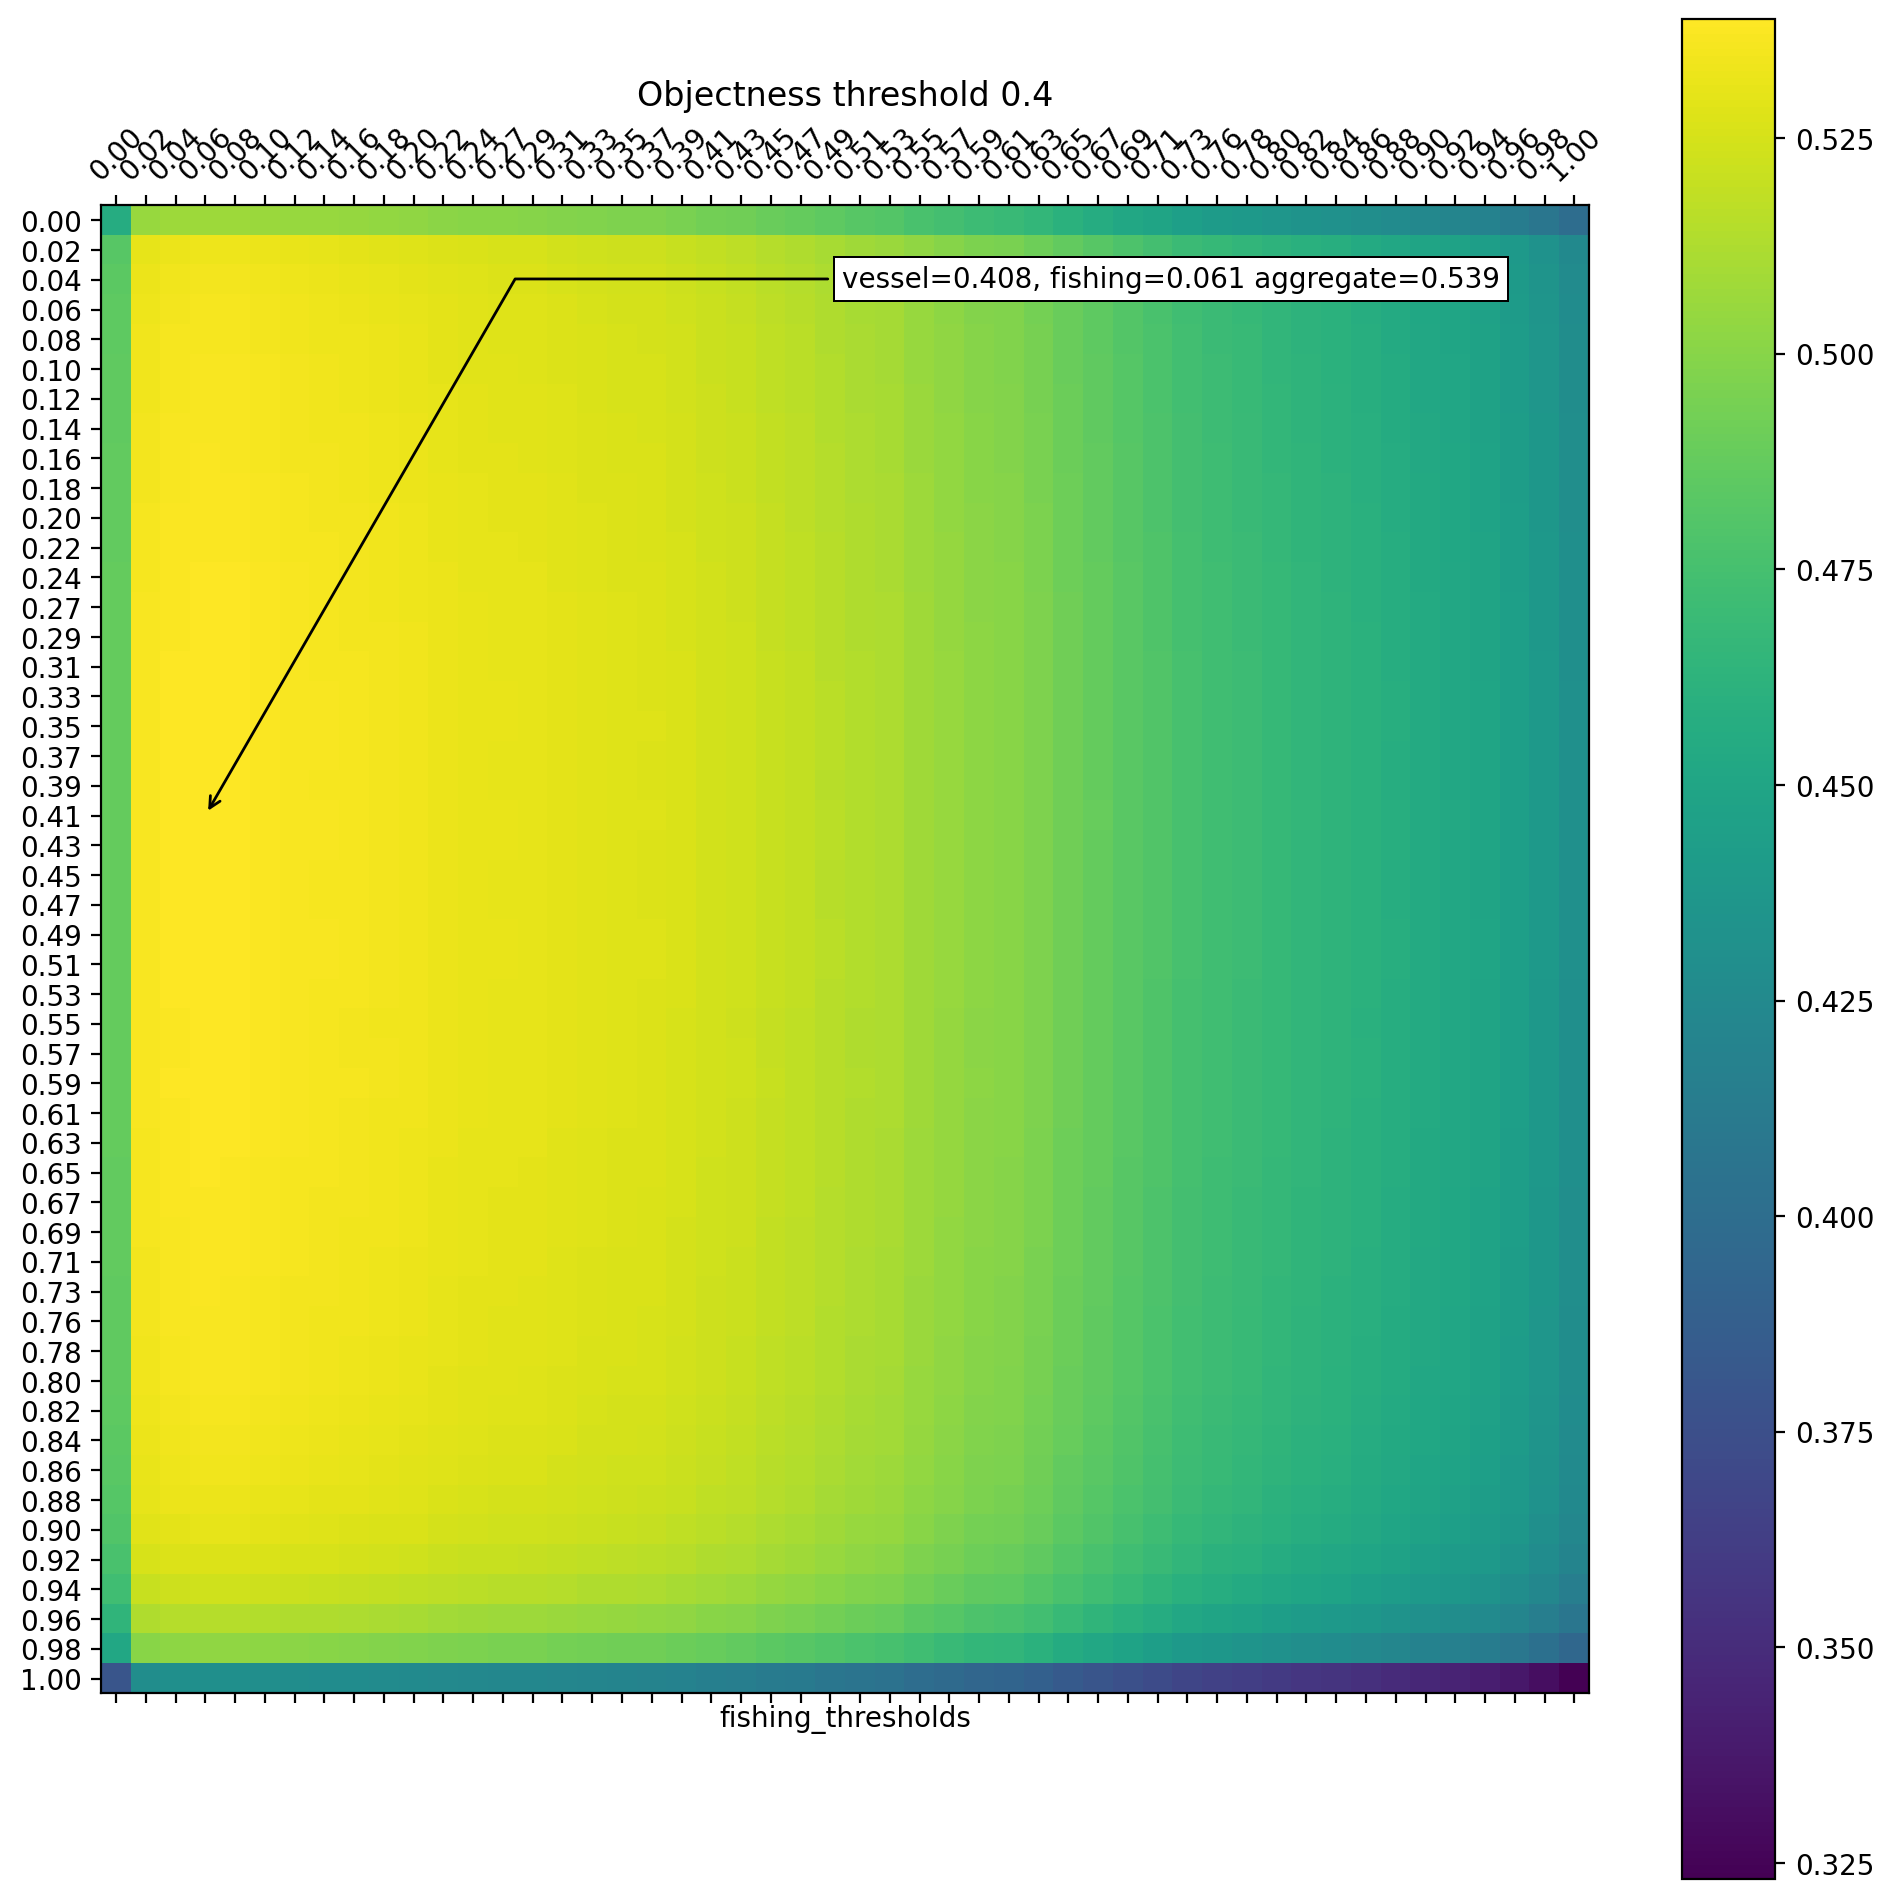

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

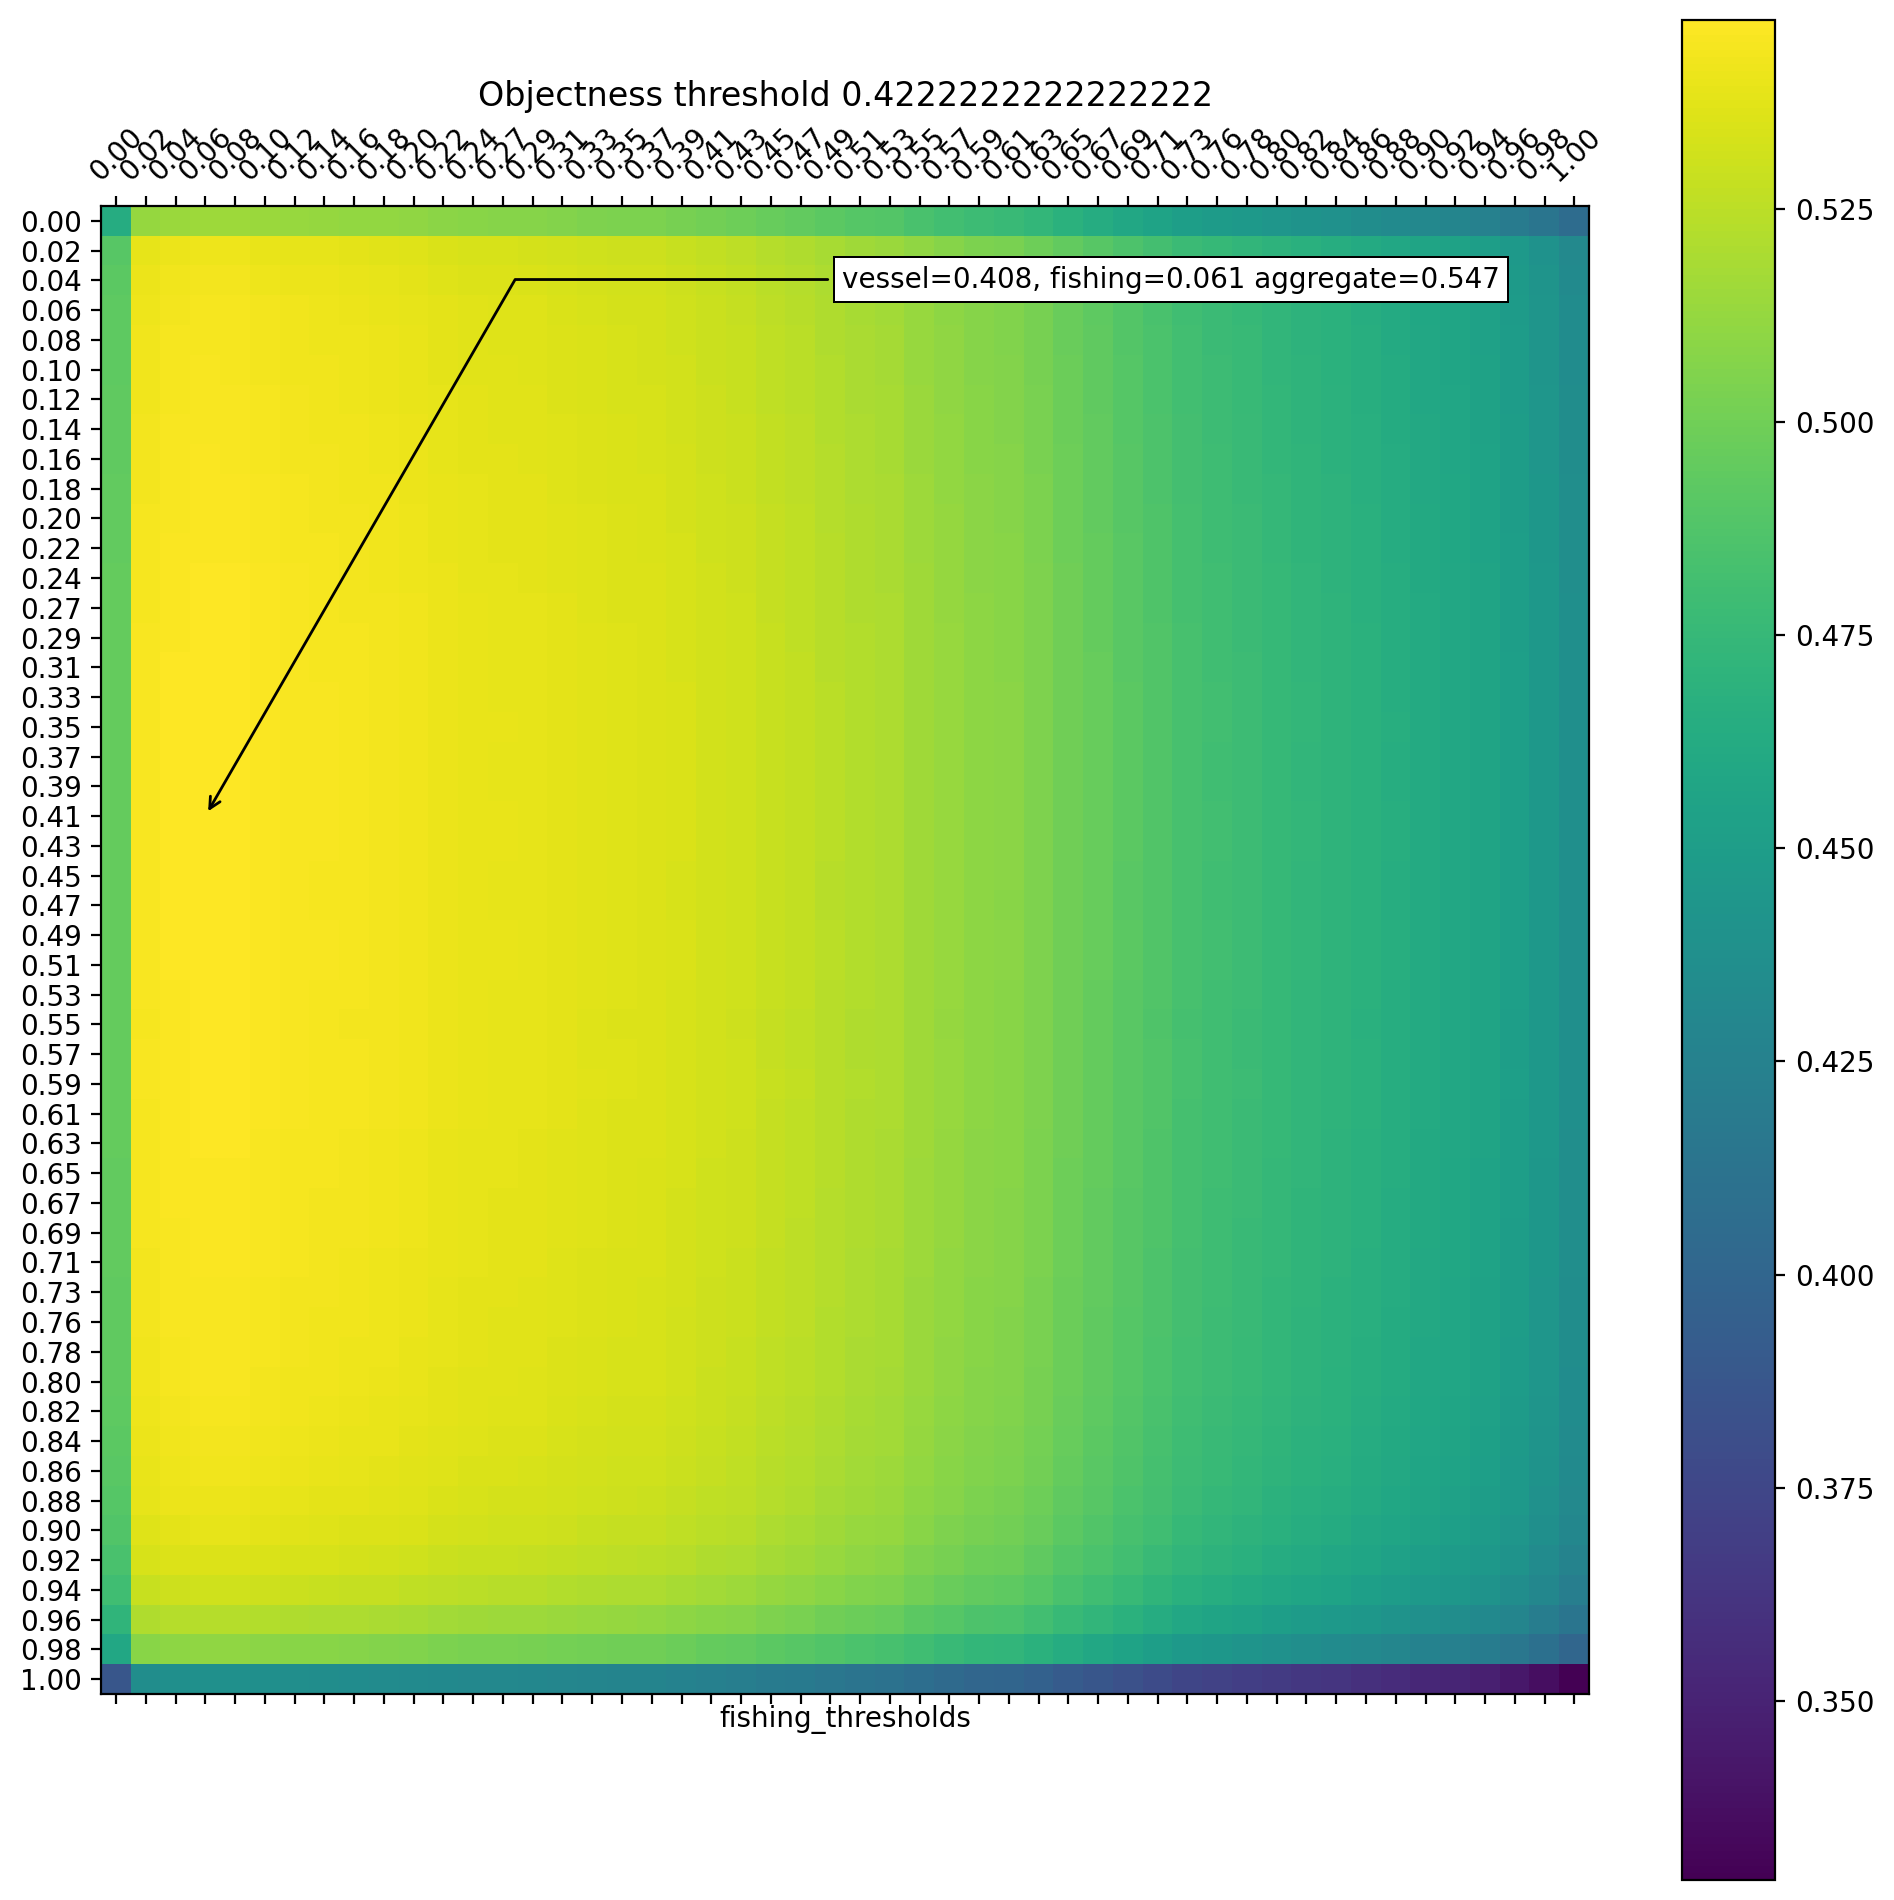

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

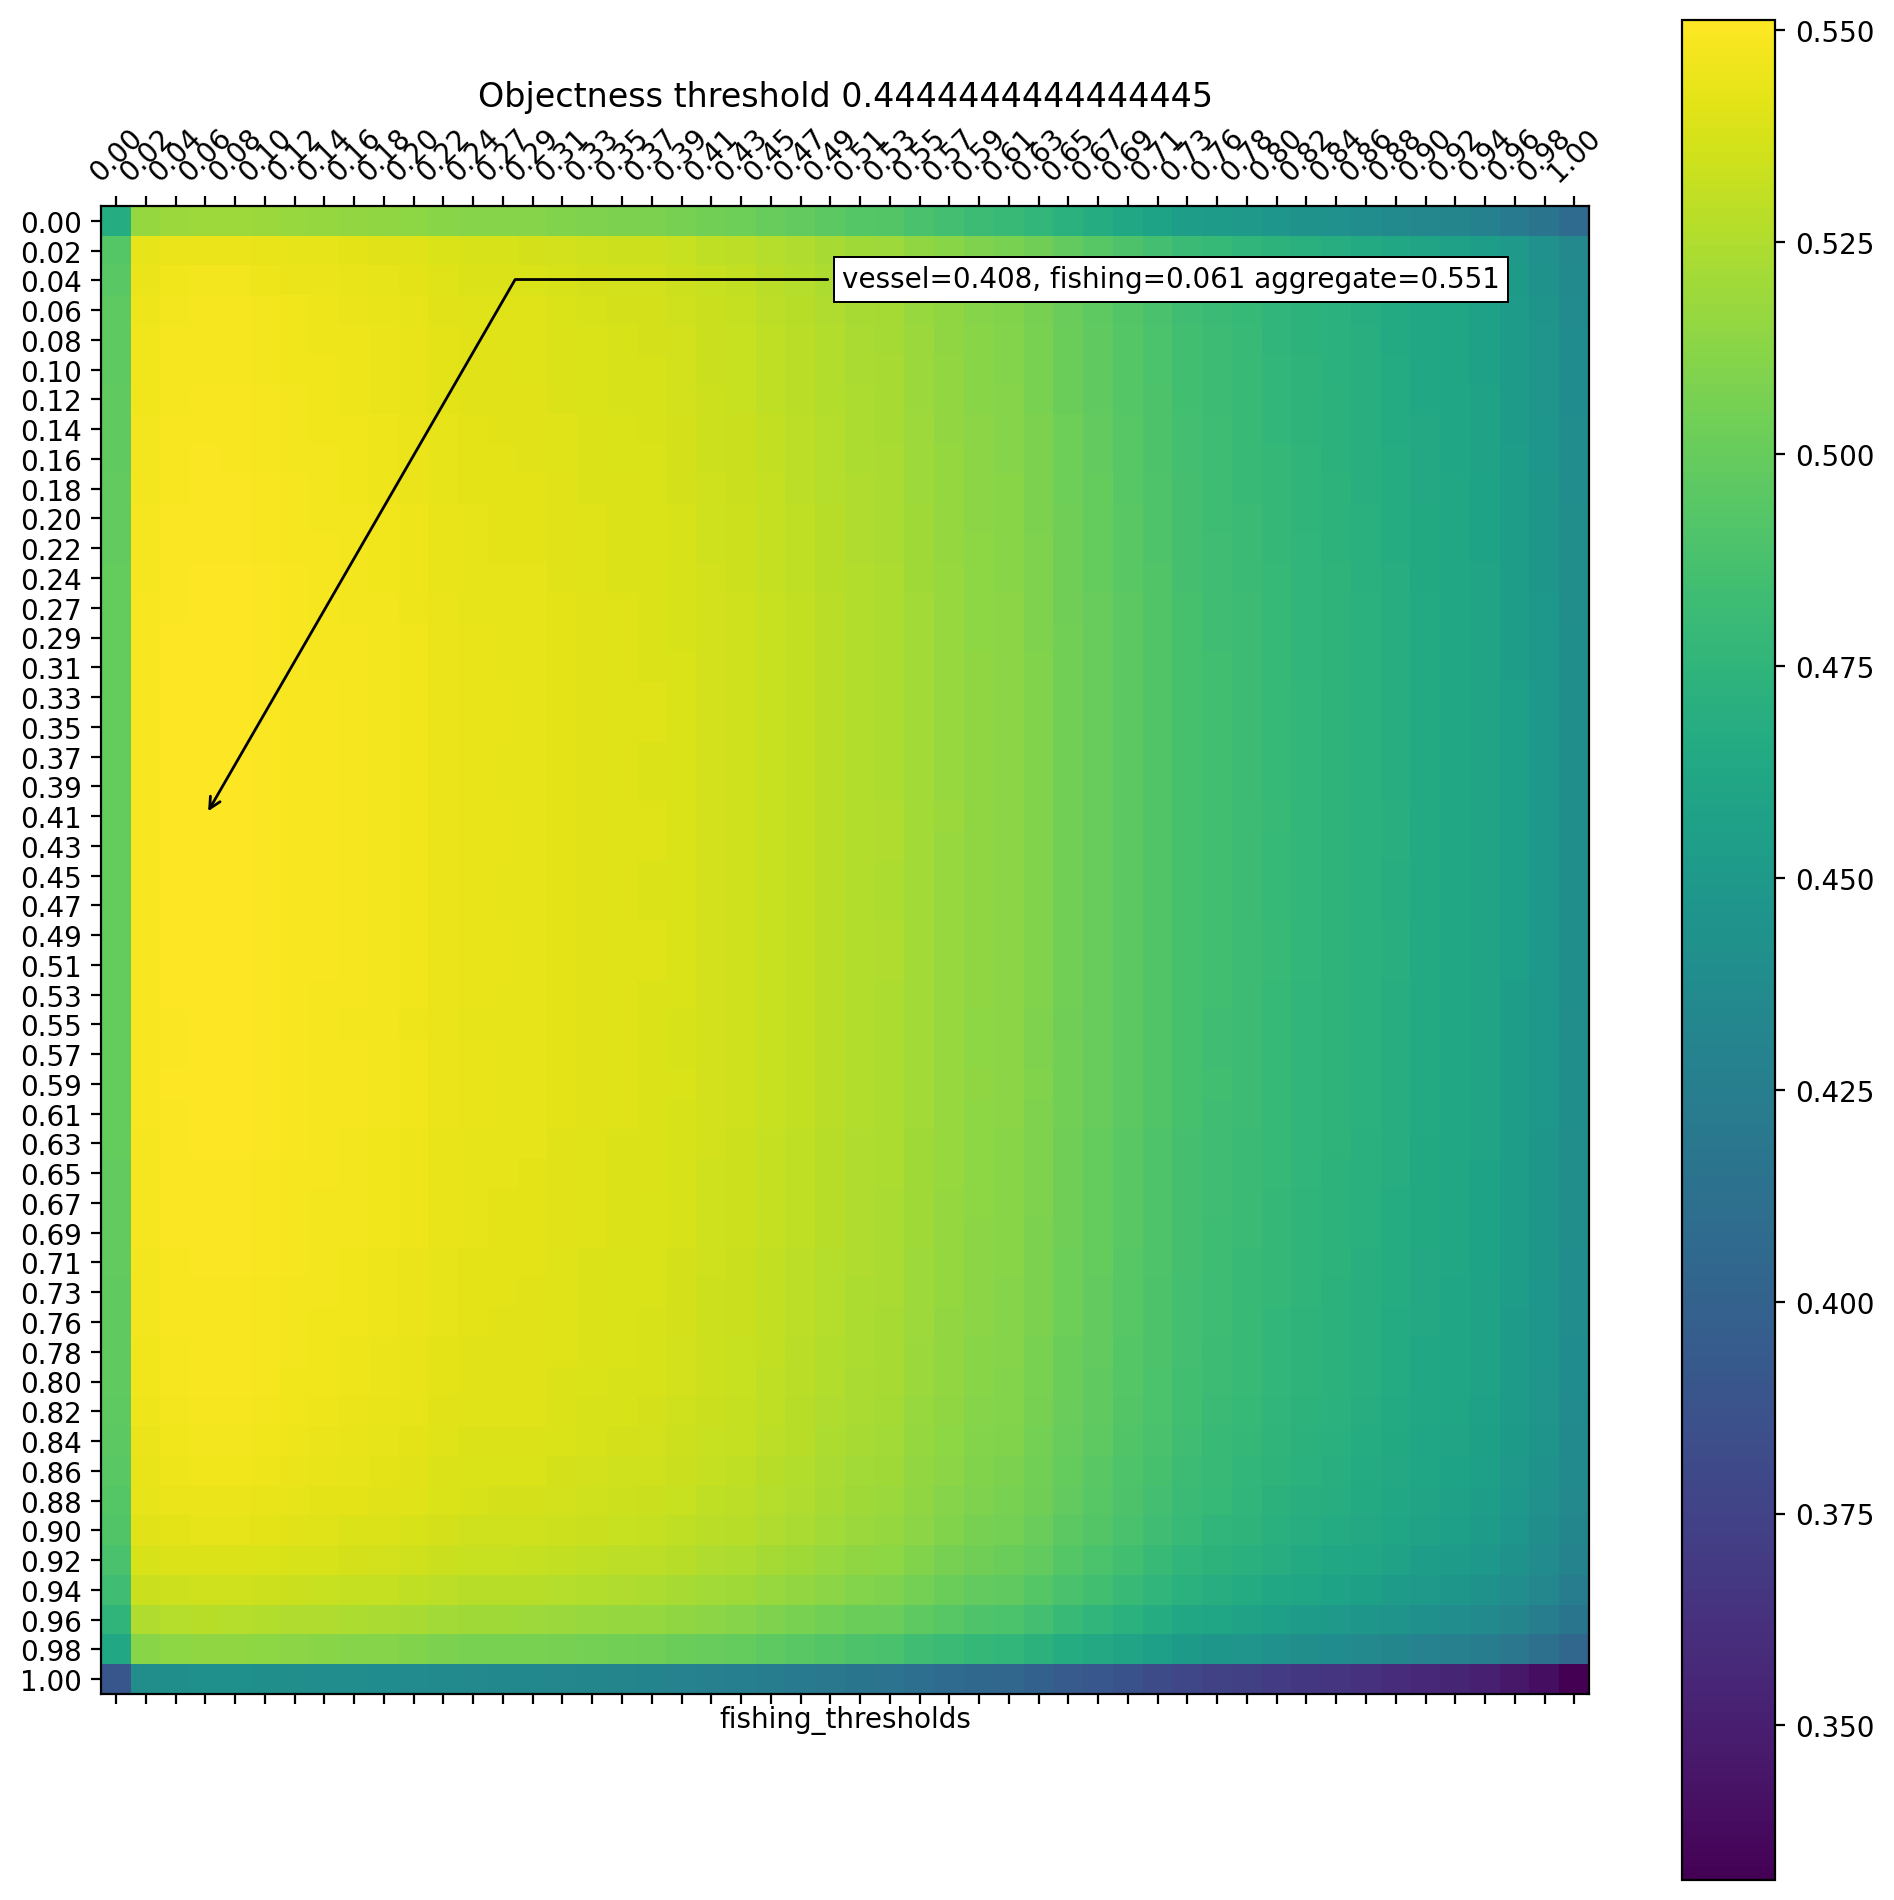

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

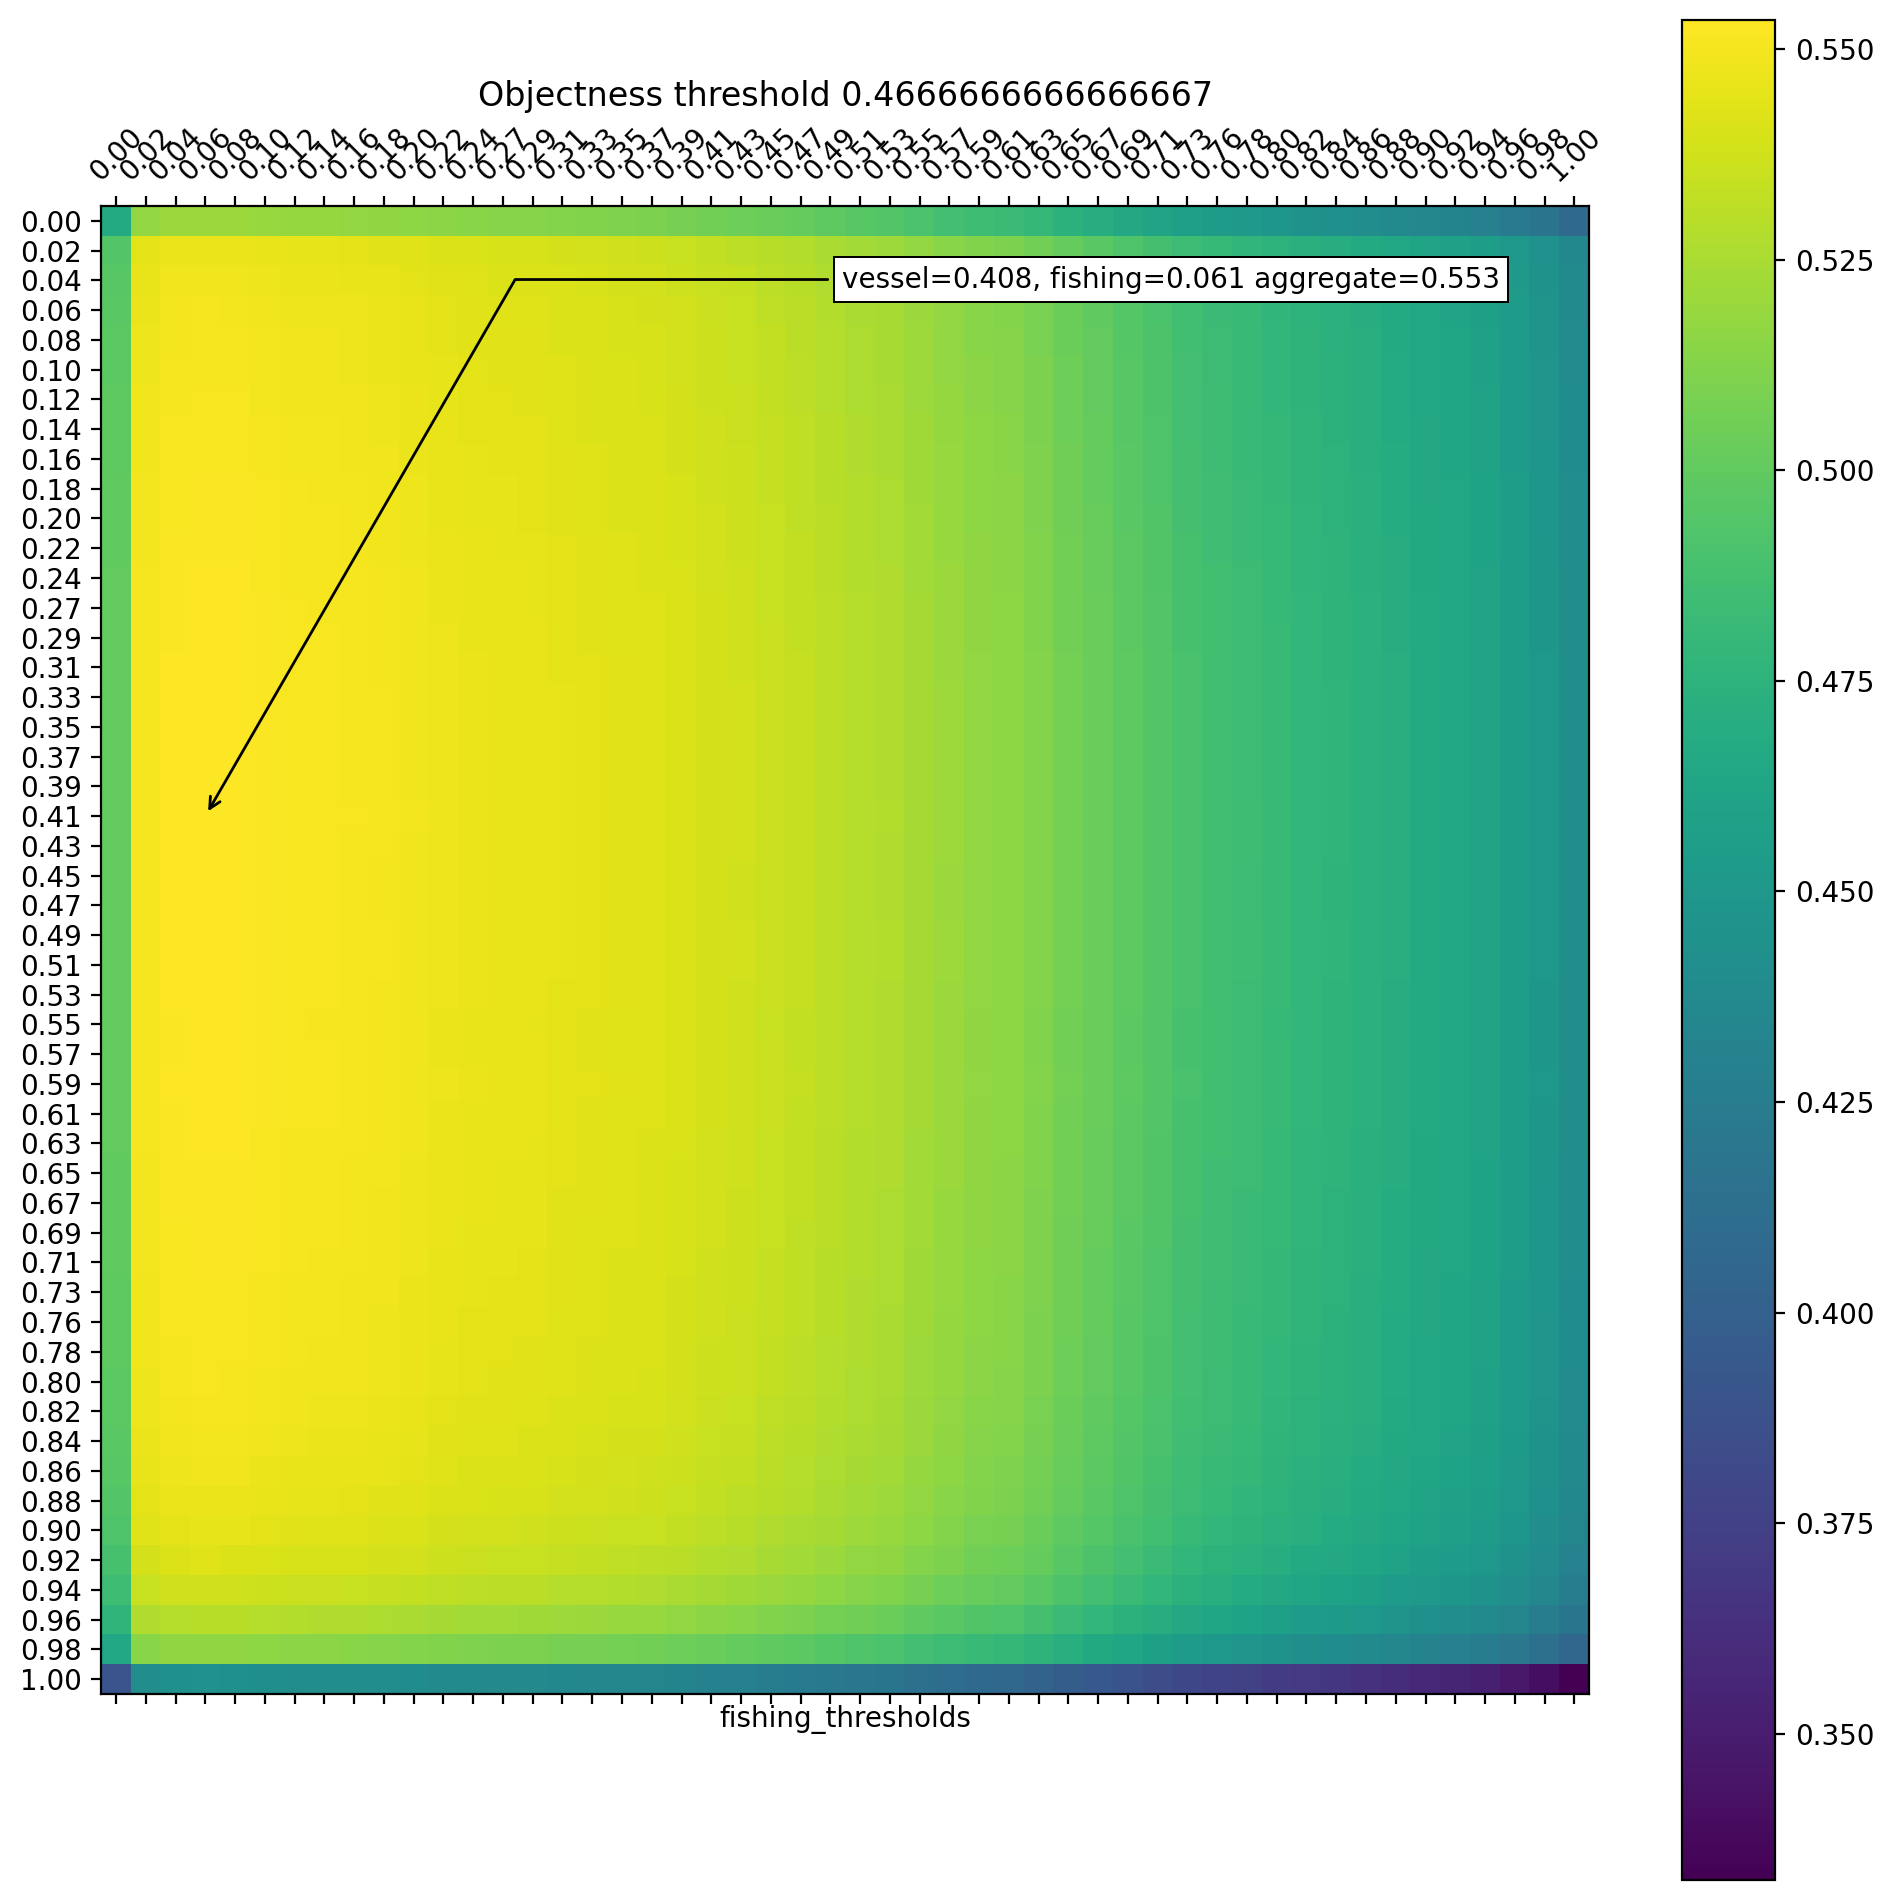

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

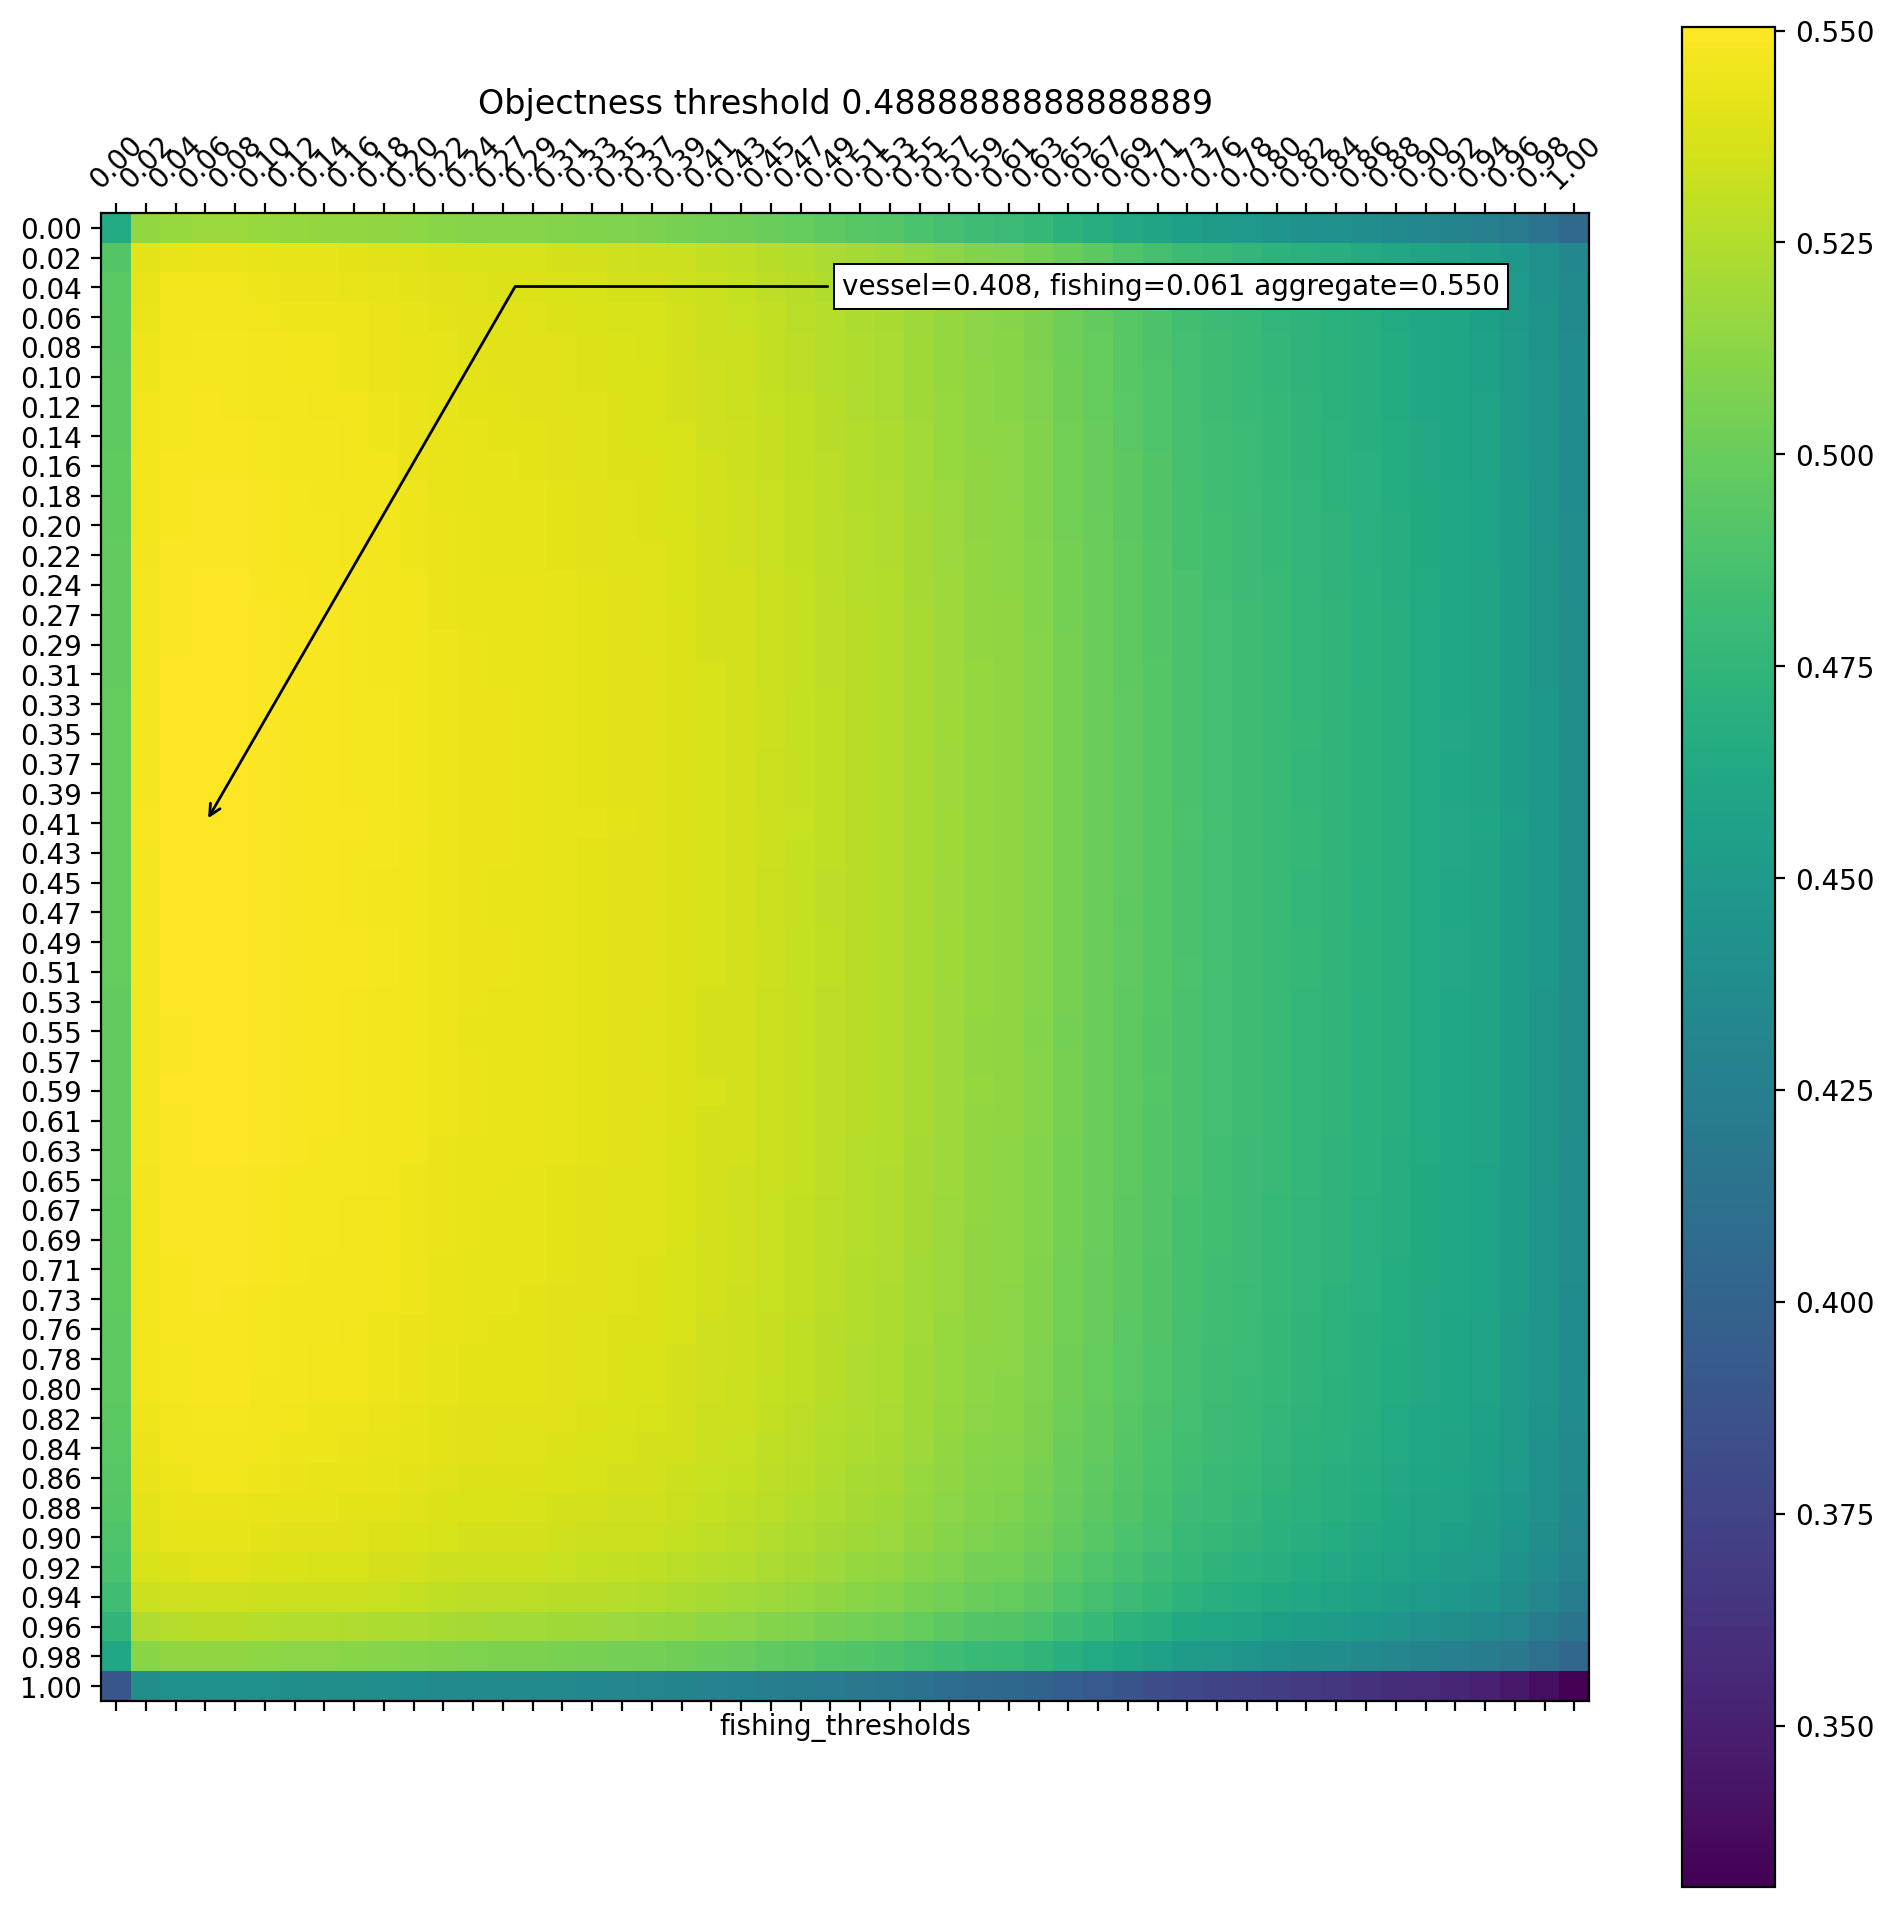

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

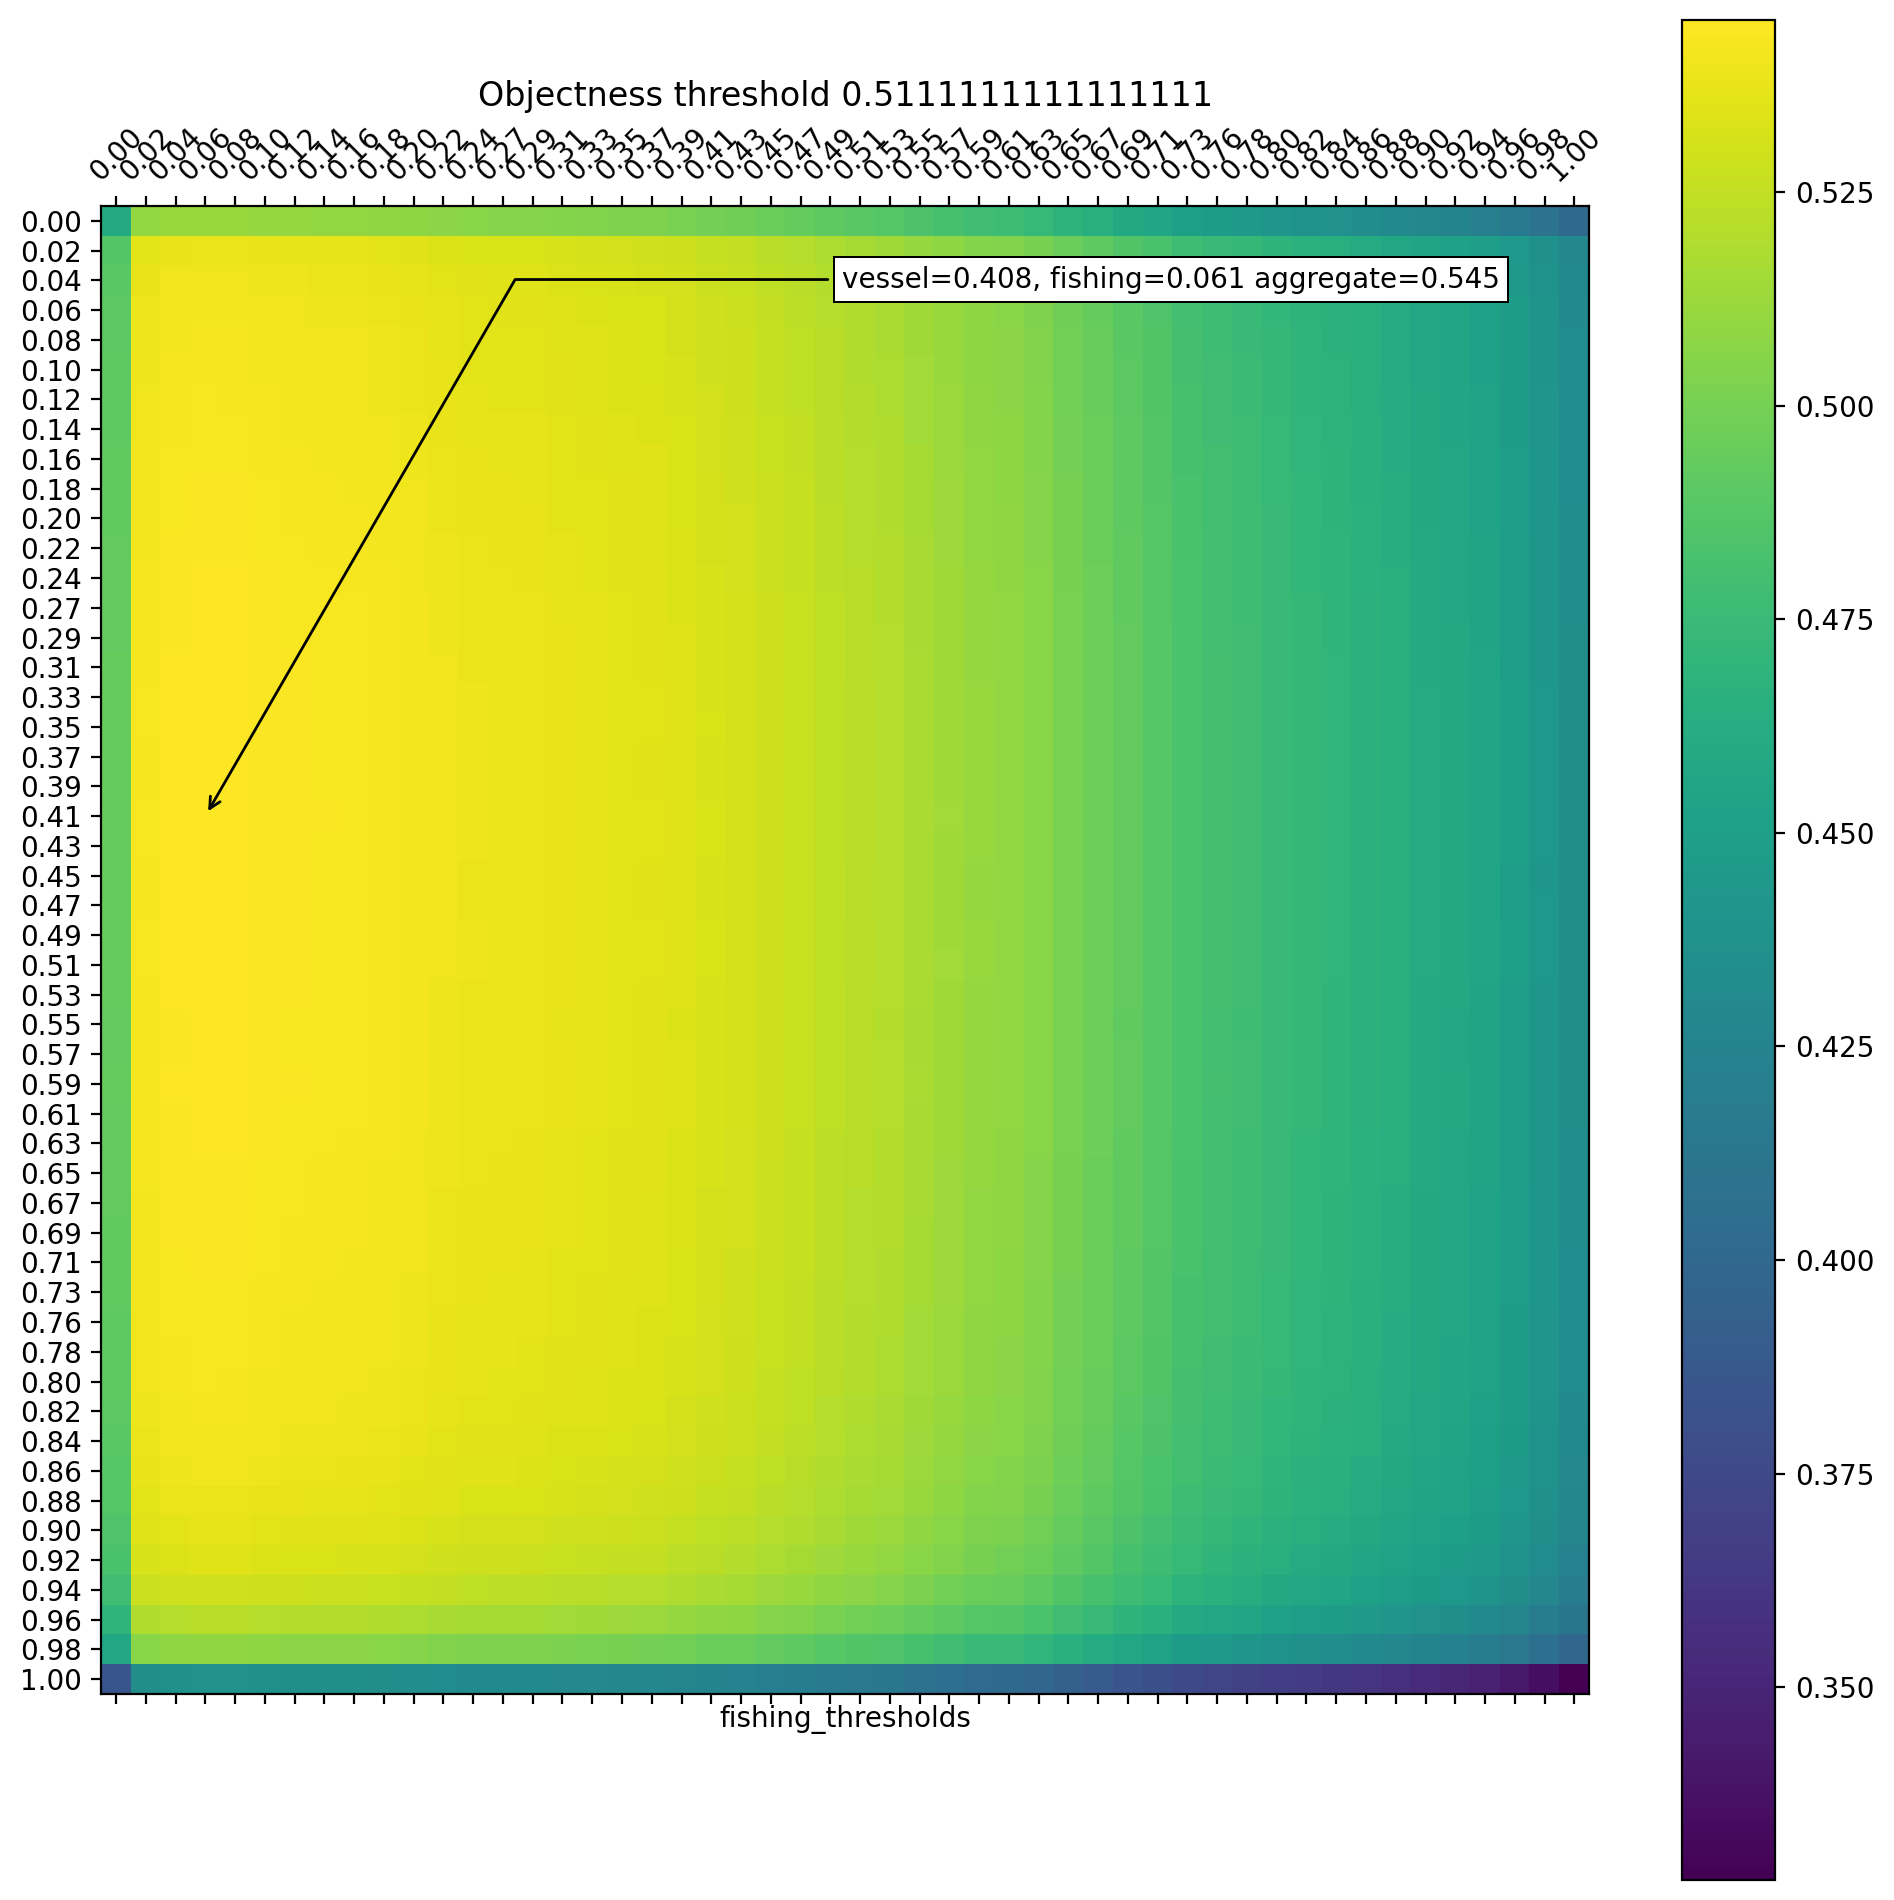

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

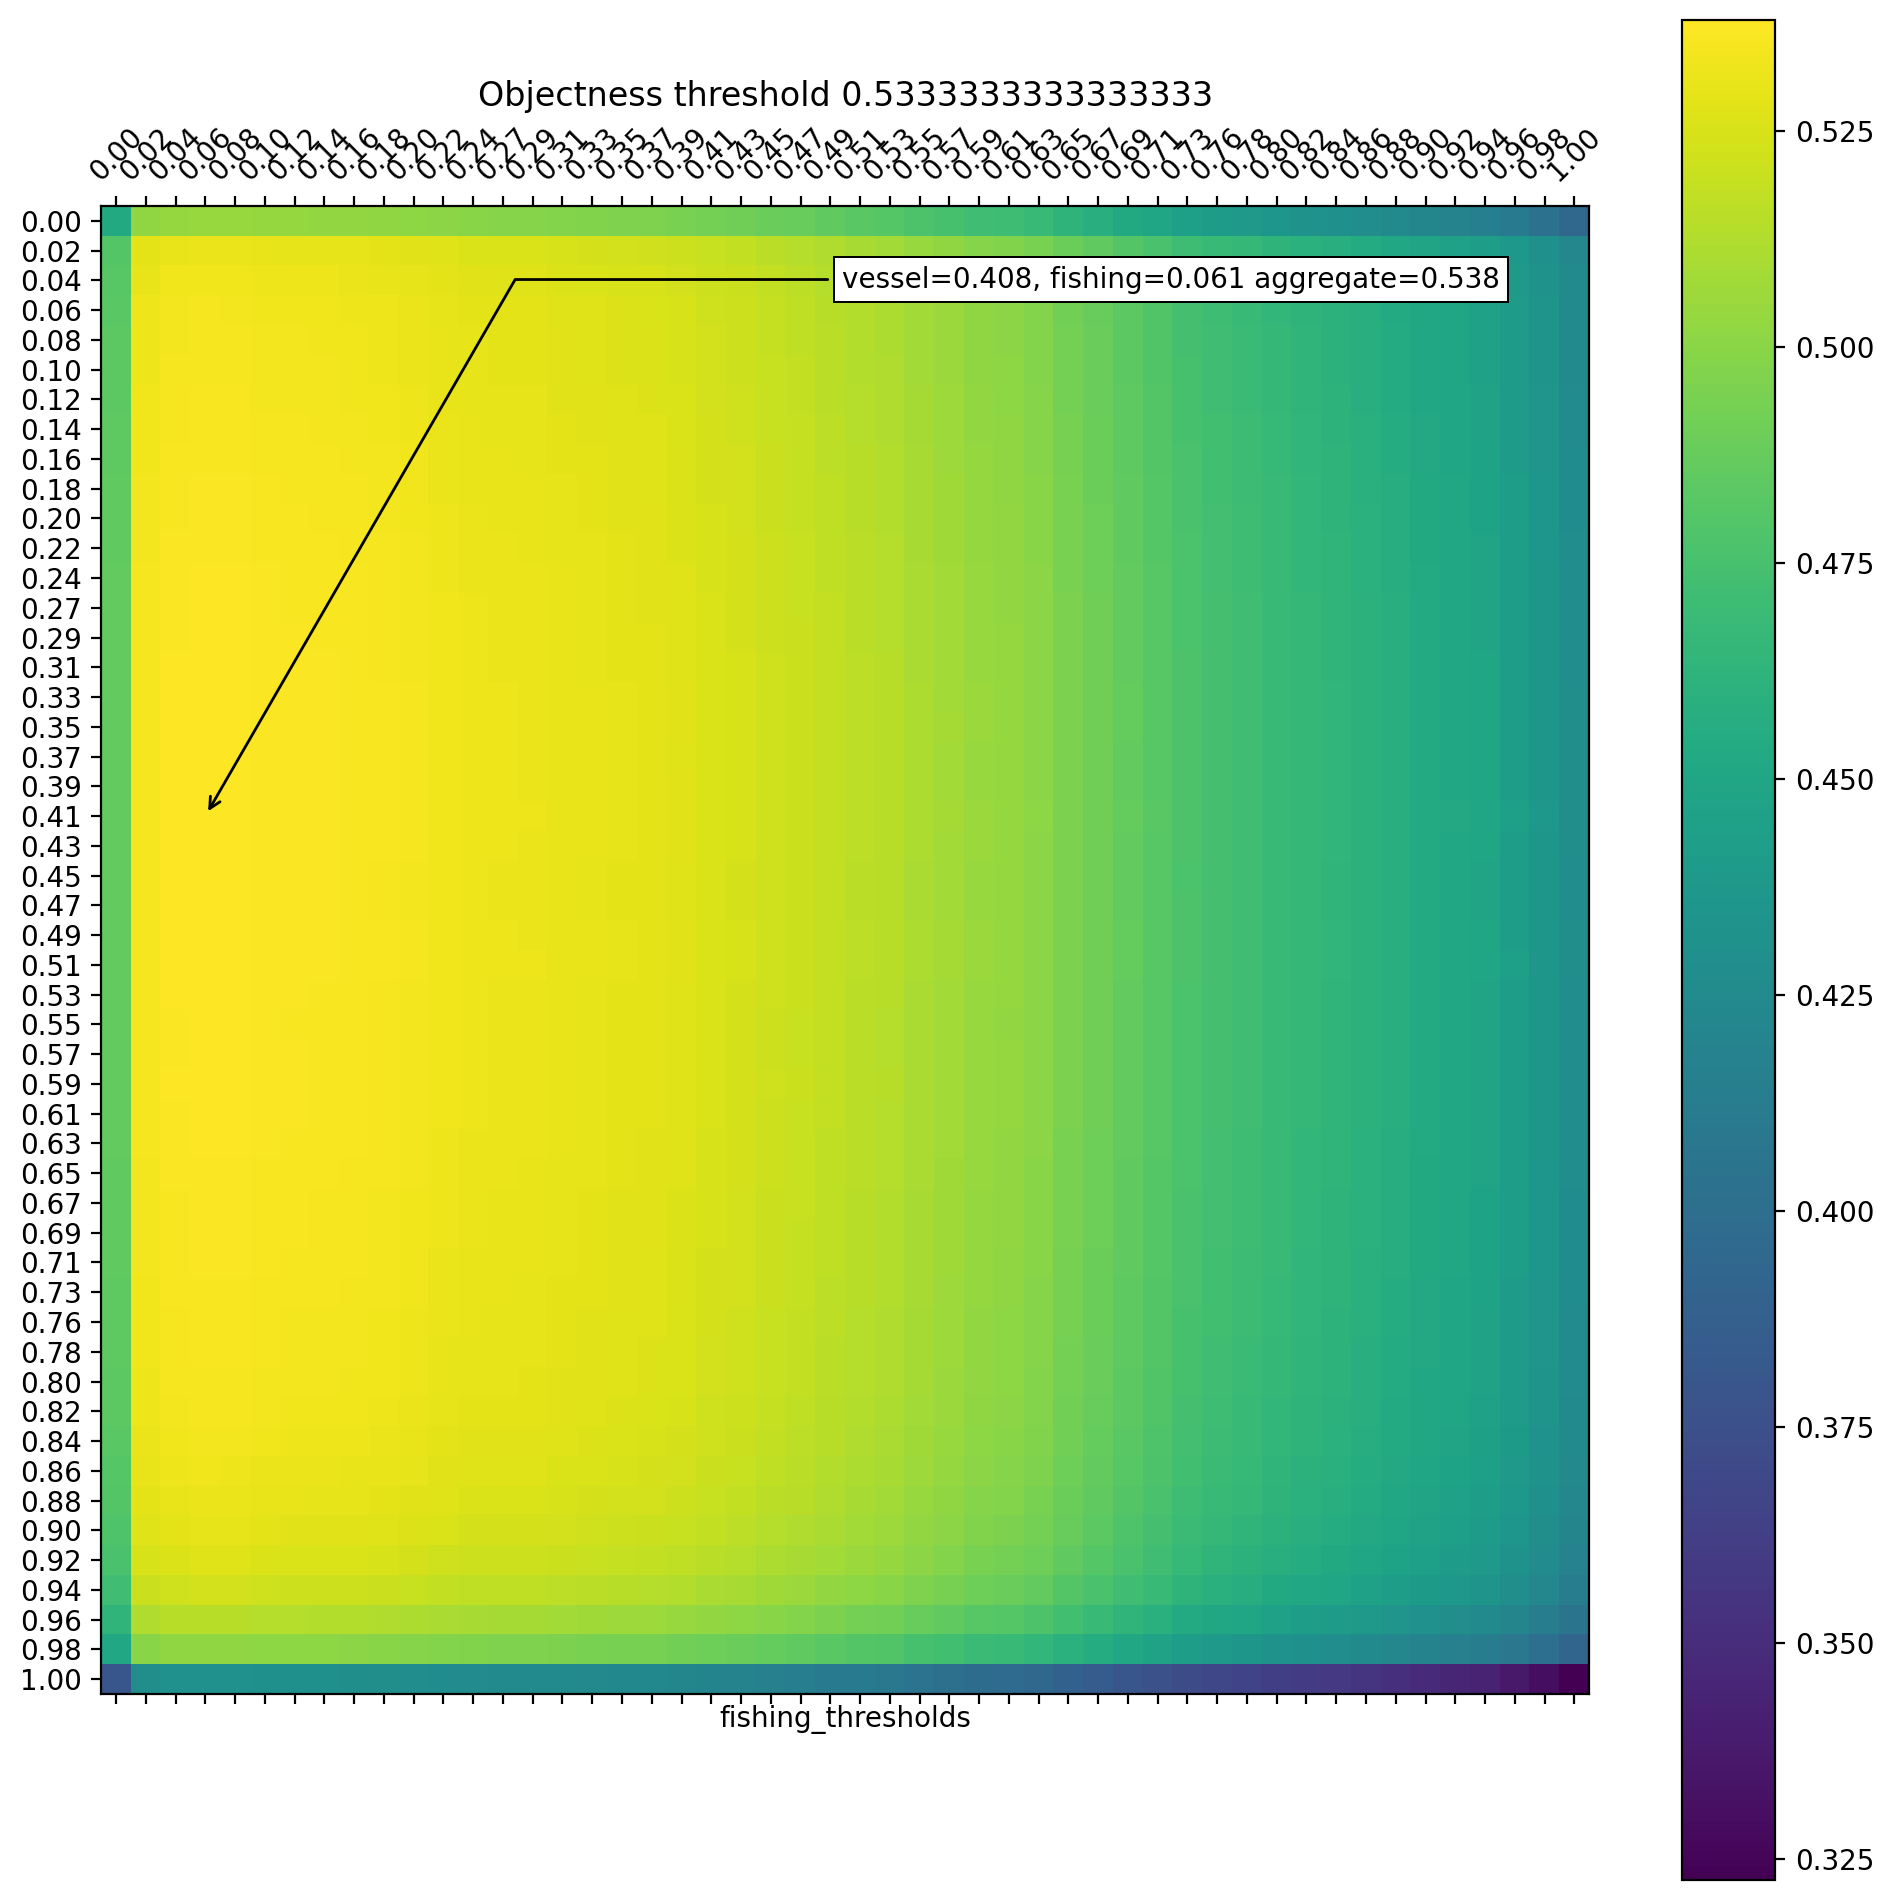

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

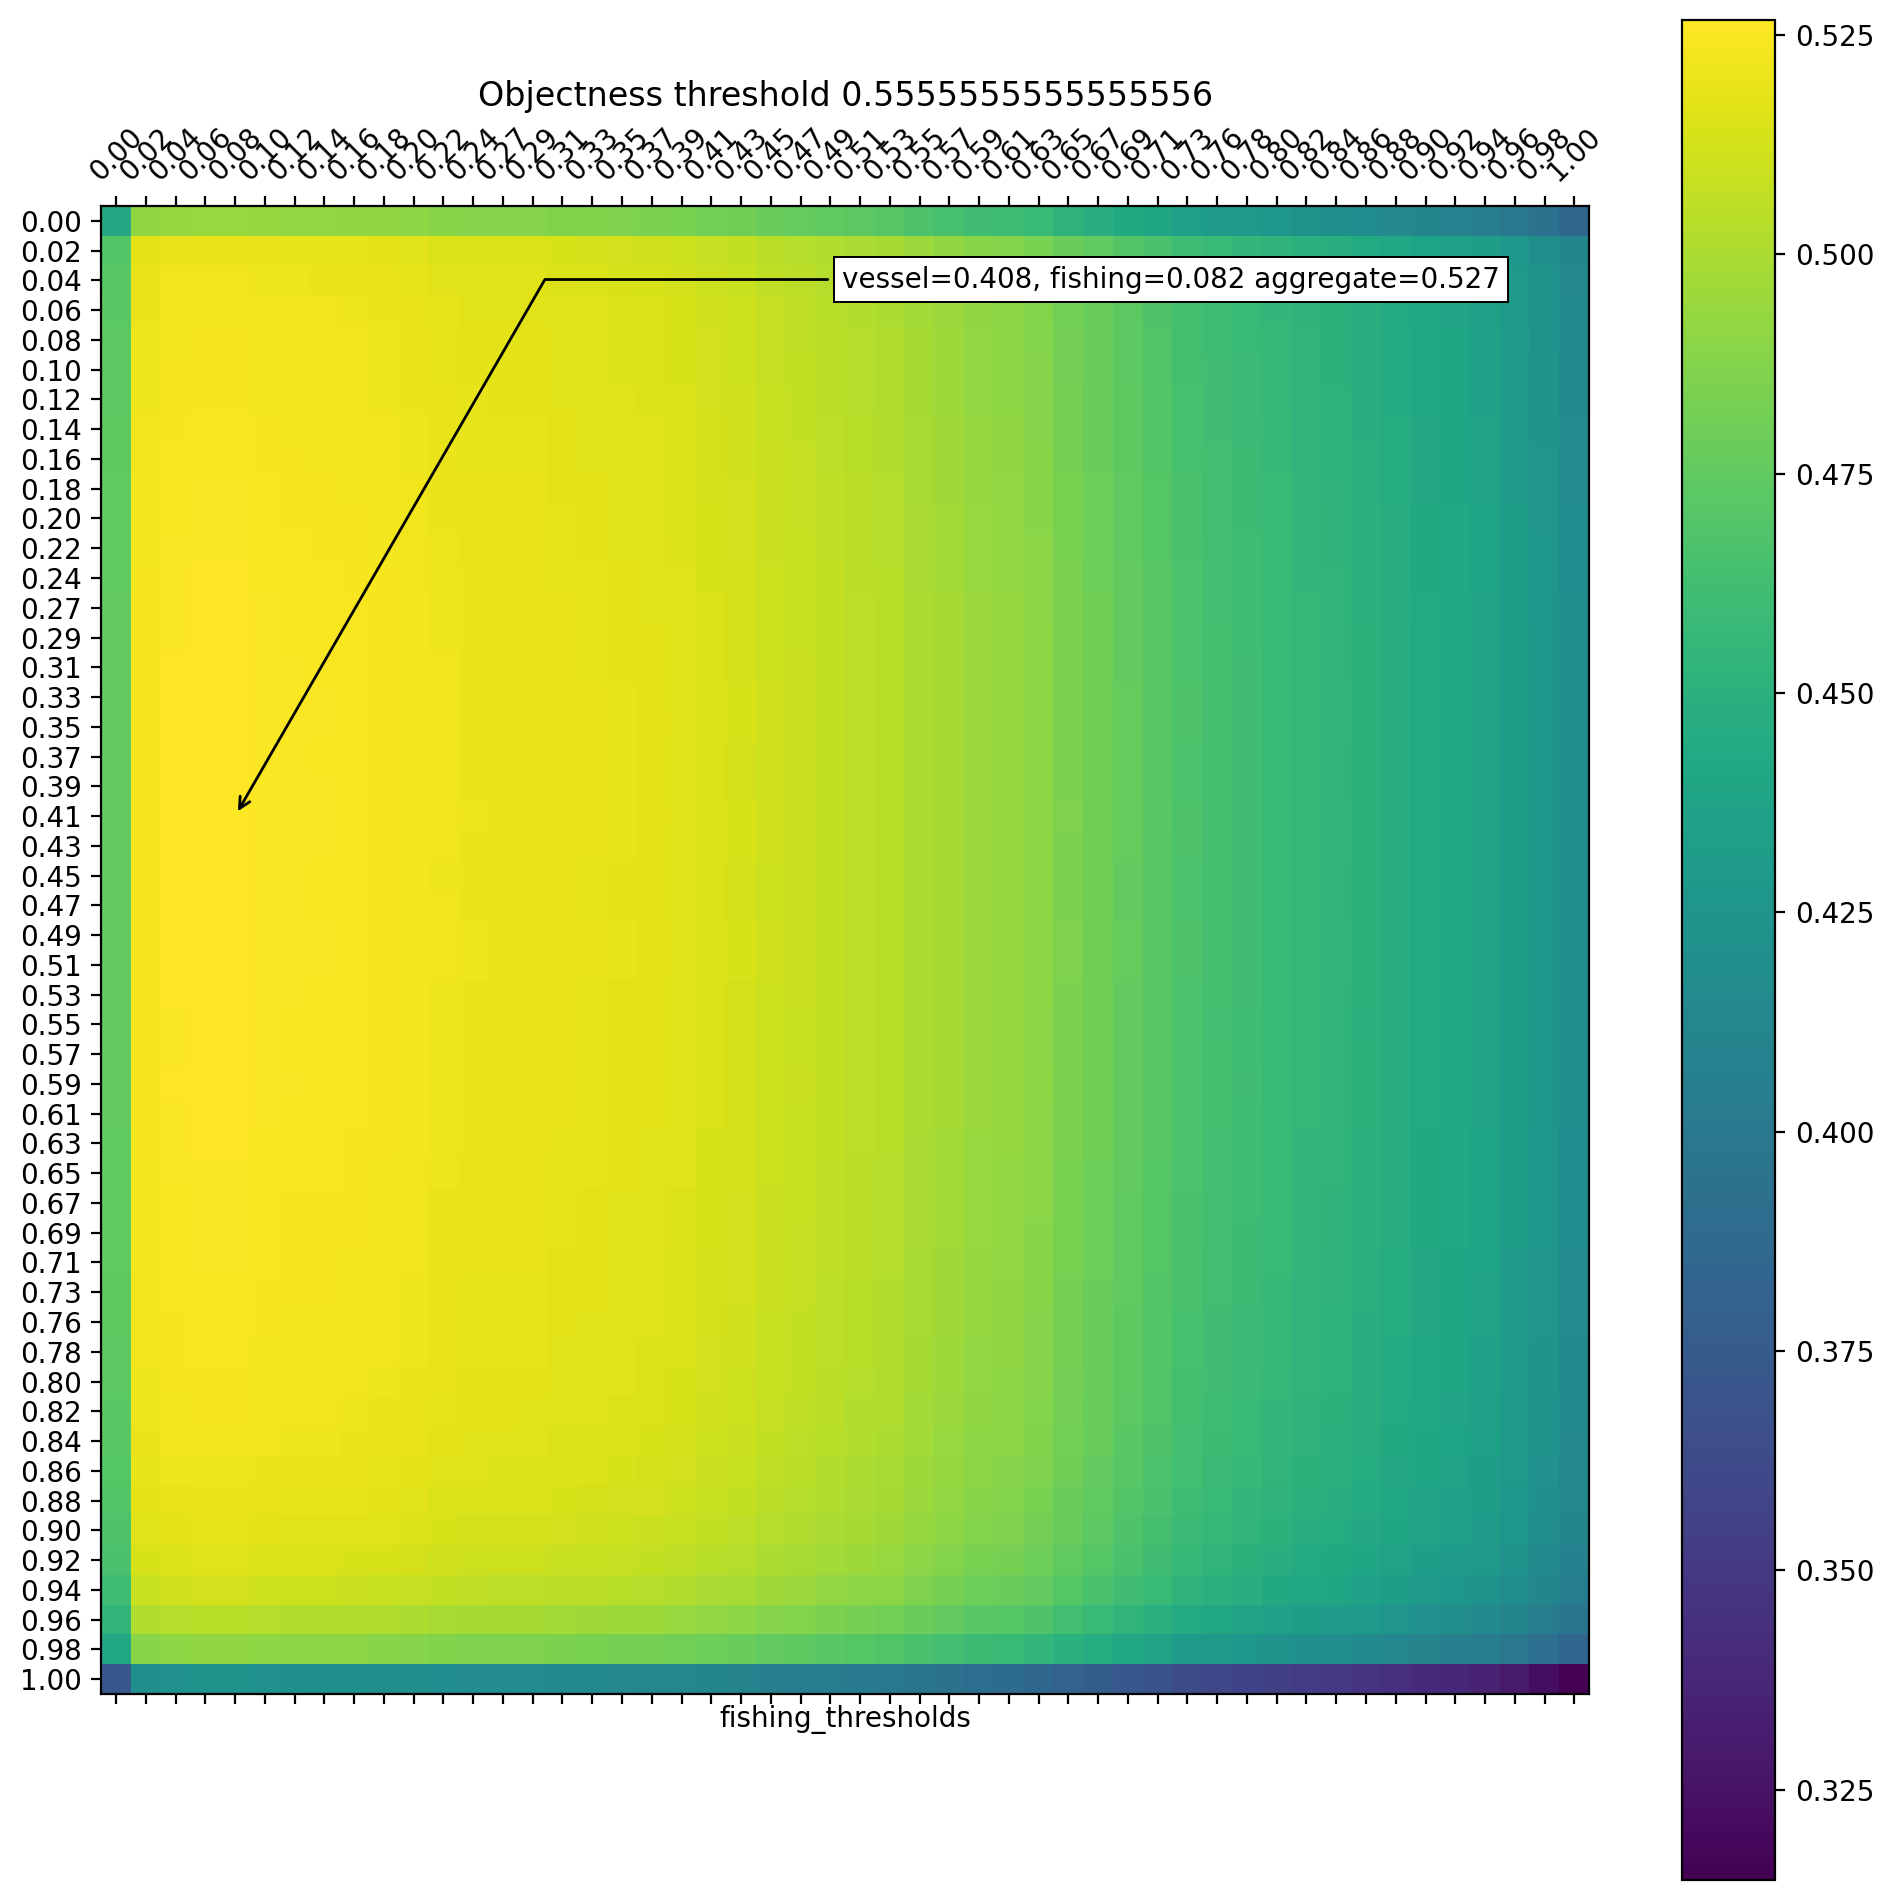

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

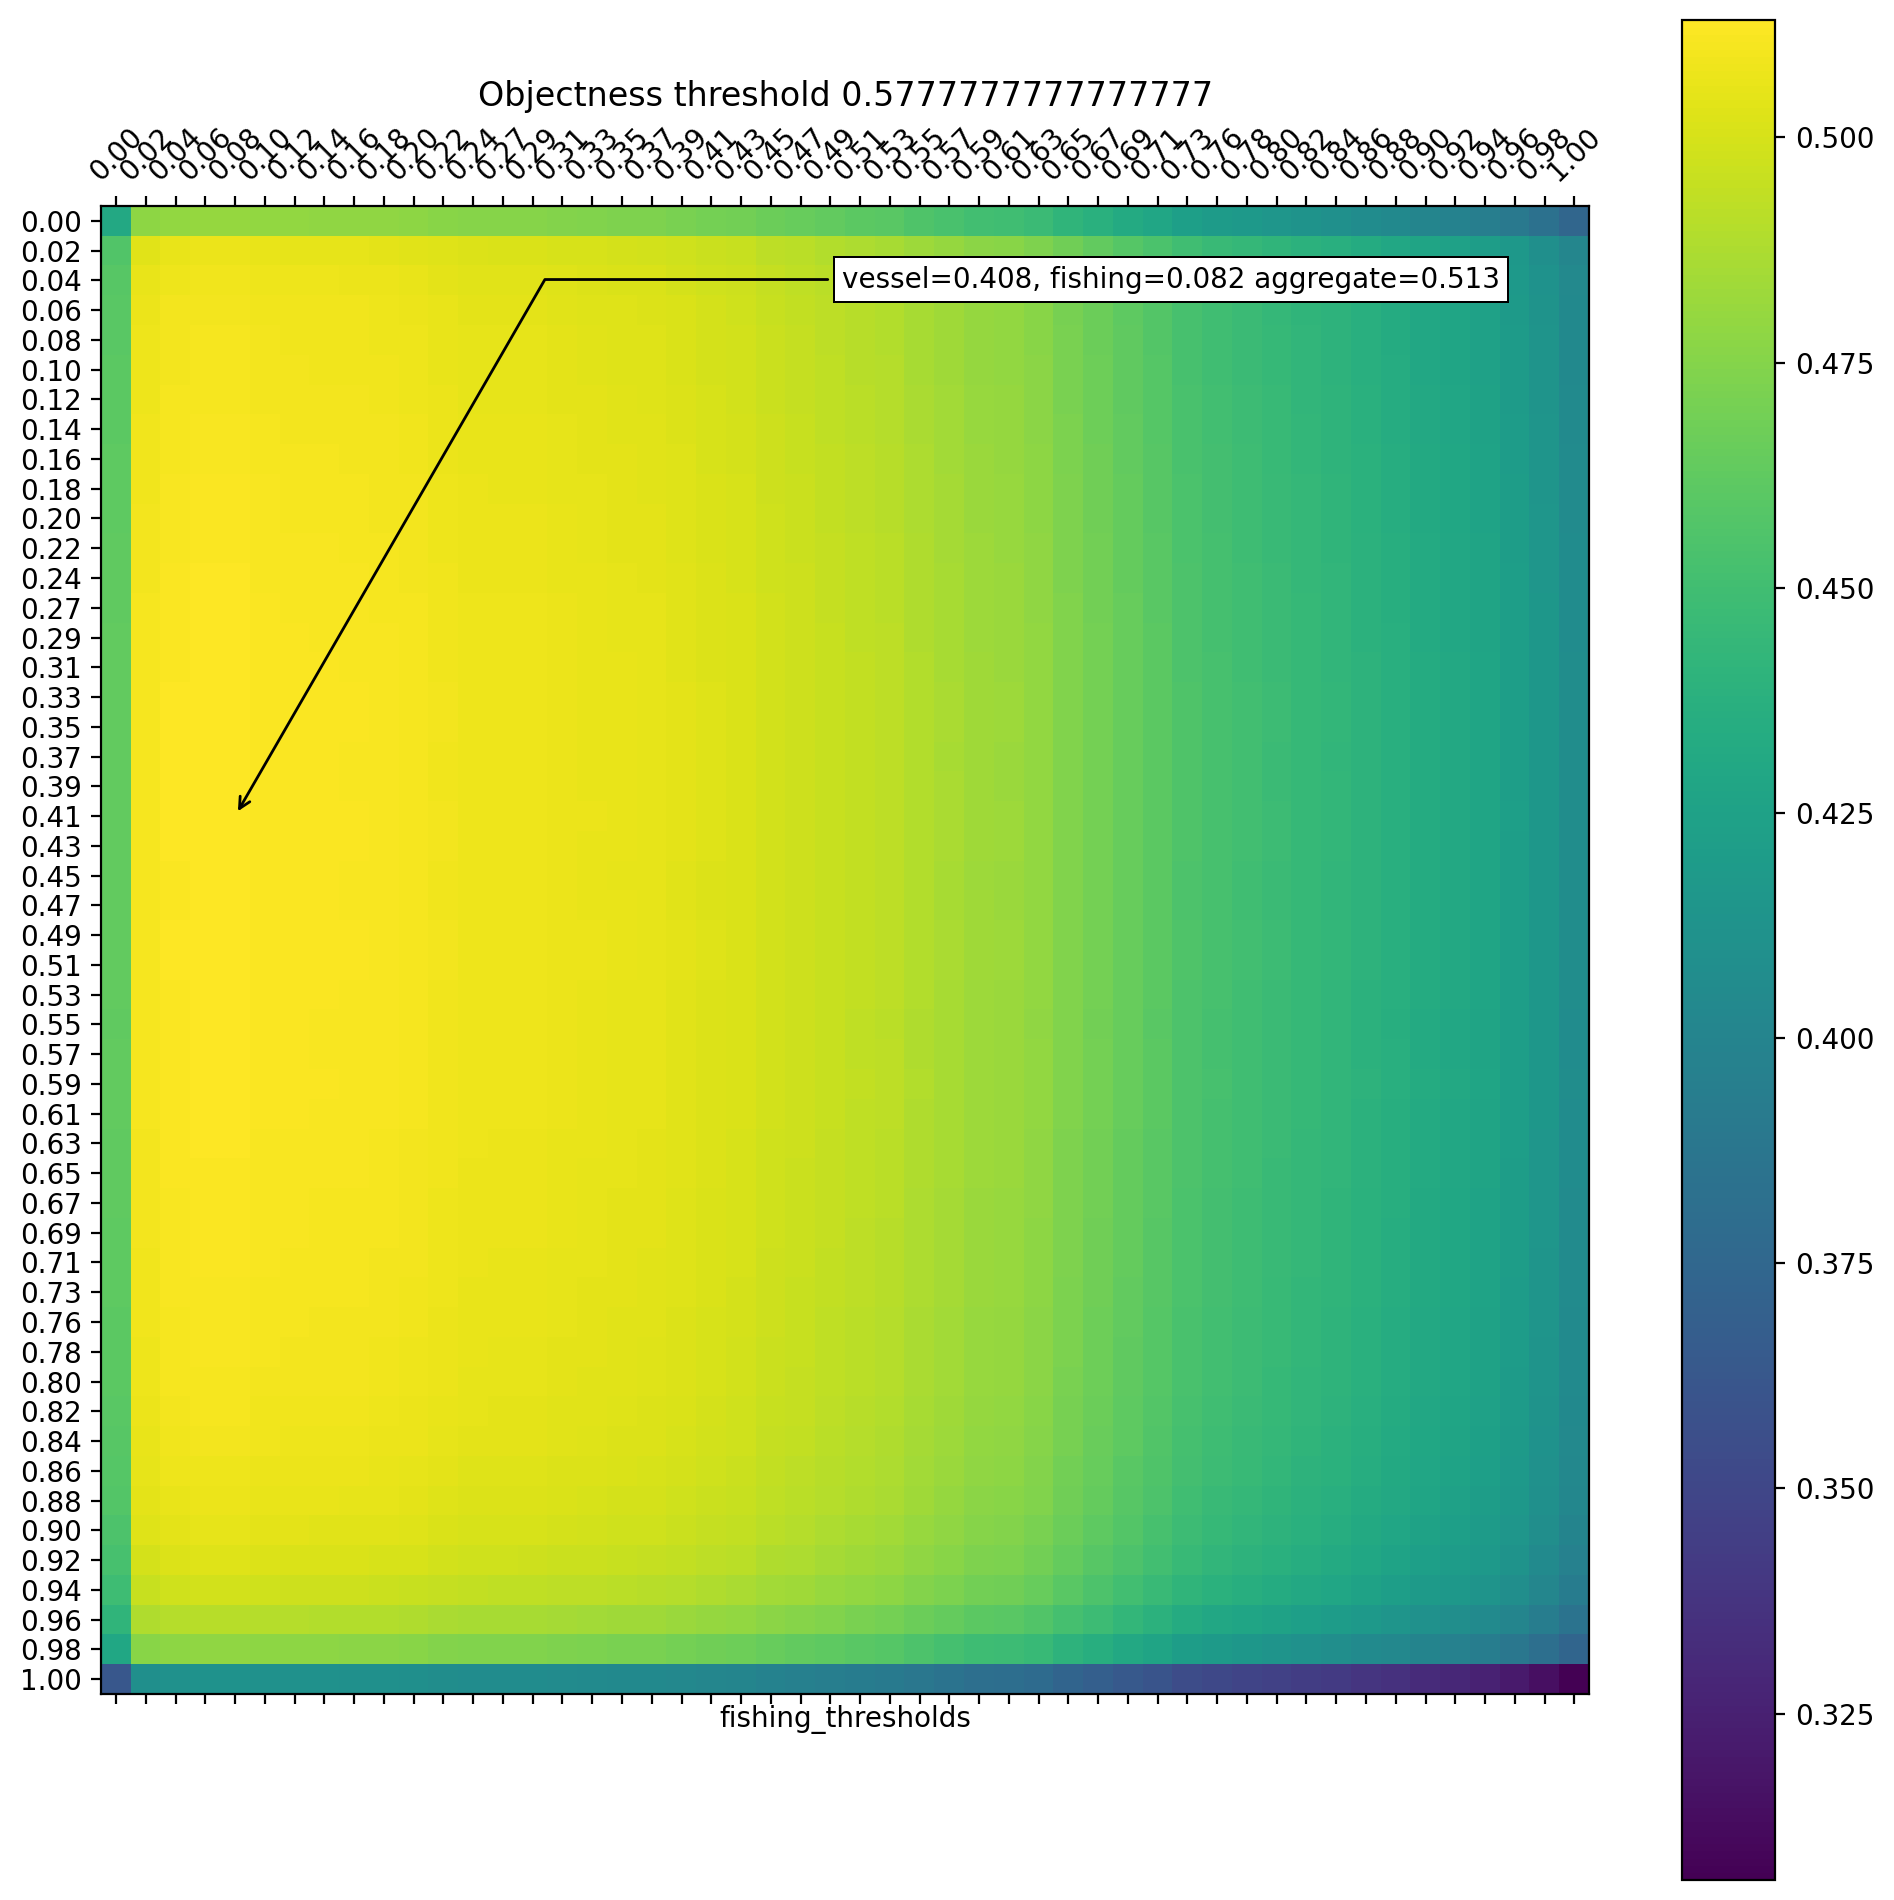

<ipython-input-2-d92ff6827397>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3600x3600 with 0 Axes>

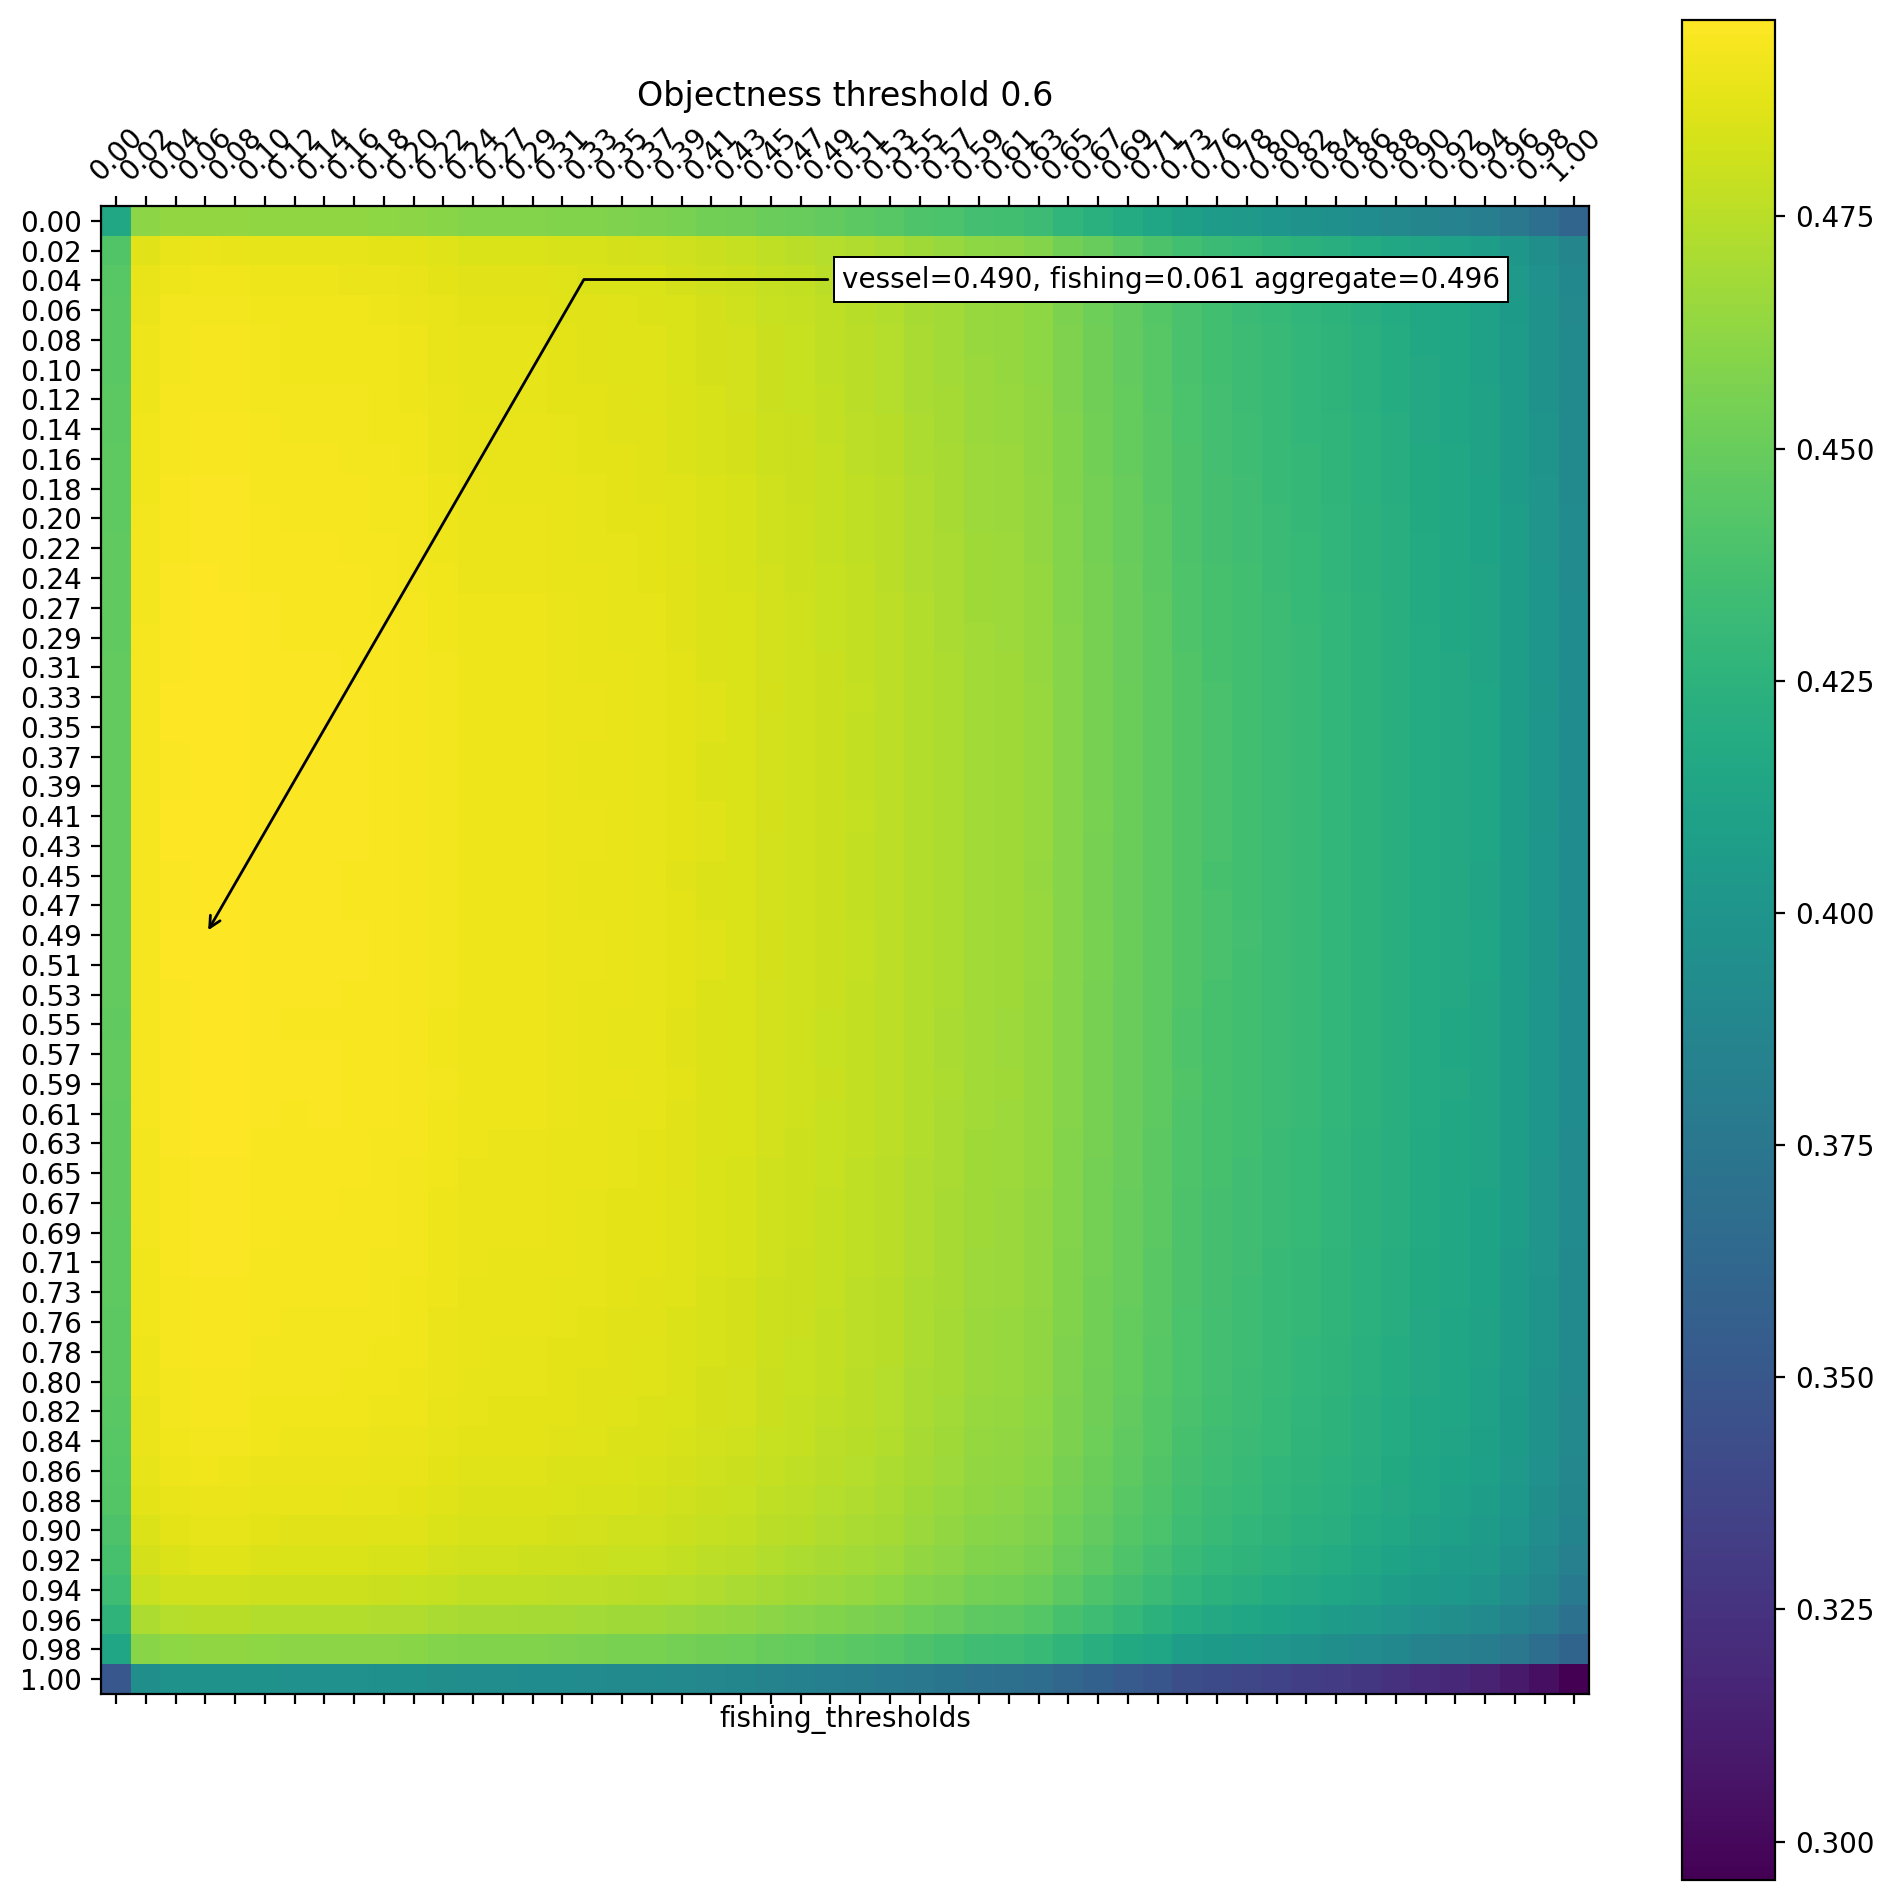

In [4]:
oof_scores_flips = [
    "../runs/211114_11_57_r18_unet_s2_leaky_valid_4fold_rfl_bce_mse_regularized_flips_medium_fold0/checkpoints_metrics_aggregate/valid__step_1536_tta_flips/valid_thresholds_summary_step_1536_tta_flips.csv",
    "../runs/211113_01_21_r18_unet_s2_leaky_valid_4fold_rfl_bce_mse_regularized_flips_medium_fold1/checkpoints_metrics_aggregate/valid__step_1536_tta_flips/valid_thresholds_summary_step_1536_tta_flips.csv",
    "../runs/211113_10_48_r18_unet_s2_leaky_valid_4fold_rfl_bce_mse_regularized_flips_medium_fold2/checkpoints_metrics_aggregate/valid__step_1536_tta_flips/valid_thresholds_summary_step_1536_tta_flips.csv",
    "../runs/211114_00_47_r18_unet_s2_leaky_valid_4fold_rfl_bce_mse_regularized_flips_medium_fold3/checkpoints_metrics_aggregate/valid__step_1536_tta_flips/valid_thresholds_summary_step_1536_tta_flips.csv",
]

plot_visualizations([pd.read_csv(x) for x in oof_scores_flips])